In [48]:
# import the necessary packages
from imutils import paths
import cv2
import os
import io
import re
import base64
from PIL import Image
import selenium
import requests
import time
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

In [2]:
# Download more than 500 images of any given parameter
def download_extended_urls(param):
    google_url = "https://www.google.com/imghp"
    driver = webdriver.Chrome()
    try:
        driver.get(google_url)
        #browser.visit(google_url)
        que=driver.find_element_by_xpath("//input[@name='q']")
        que.send_keys(param)
        que.send_keys(Keys.RETURN)       
        element = driver.find_element_by_tag_name("body")
        # Scroll down
        for i in range(60):
            element.send_keys(Keys.PAGE_DOWN)
            time.sleep(0.3)
        try:
            driver.find_element_by_xpath('//*[@id="islmp"]/div/div/div/div/div[5]/input').click()
            for i in range(100):
                element.send_keys(Keys.PAGE_DOWN)
                time.sleep(0.3)  # bot id protection
        except:
            for i in range(30):
                element.send_keys(Keys.PAGE_DOWN)
                time.sleep(0.3)  # bot id protection

        print("Reached end of Page.")
        time.sleep(0.5)

        source = driver.page_source #page source
        #close the browser
        driver.close()
    except Error as e:
        print(e)
        
    url_list = []
    soup = bs(source, "html.parser")
    img = soup.find_all("img", class_='rg_i Q4LuWd tx8vtf')
    for i in img:
        try:
            url_list.append(i['src'])
        except:
            pass
    with open(f'urls_for_training/{param}.txt', 'w') as filehandle:
        for listitem in url_list:
            filehandle.write('%s\n' % listitem)
    return url_list


In [3]:
def download_img_from_url(param):
    # grab the list of URLs then initialize the
    # total number of images downloaded thus far
    total = 0
    # loop the URLs
    for url in download_extended_urls(param):#[:70]:
        try:
            r = requests.get(url, timeout=60)
            result_file = 'result_file'

            with open(result_file, 'wb') as file_handler:
                file_handler.write(r.content)
            try:
                os.mkdir(f"image/{param}/")
            except:
                pass
            p = os.path.join("image", param, "{}.jpg".format(str(total).zfill(8)))
            Image.open(result_file).save(p)
            os.remove(result_file)

            # update the counter
            print("[INFO] downloaded: {}".format(p))
        except:
            try:       
                z = re.findall(f'.+base64,(.+)',url)[0]
                p = os.path.join("image", param, "{}.jpg".format(str(total).zfill(8)))
                im = Image.open(io.BytesIO(base64.b64decode(z))).save(p)
            # handle if any exceptions are thrown during the download process
            except:
                print("[INFO] error downloading {}...skipping".format(p))
        total += 1
    # loop over the image paths we just downloaded
    for imagePath in paths.list_images(os.path.join("image", param)):
    # initialize if the image should be deleted or not
        delete = False

        # try to load the image
        try:
            image = cv2.imread(imagePath)
            # if the image is `None` then we could not properly load it
            # from disk, so delete it
            if image is None:
                print("None")
                delete = True
        # if OpenCV cannot load the image then the image is likely
        # corrupt so we should delete it
        except:
            print("Except")
            delete = True

        # check to see if the image should be deleted
        if delete:
            print("[INFO] deleting {}".format(imagePath))
            os.remove(imagePath)
    return

In [4]:
kitchen = "Silverware, Flatware sets, Silverware organizer, Plates, Bowls, Serving platters,\
    Glass Cups, Coffee mugs, Wine glasses, Tongs, Spatulas, Ladles and Skimmer, Whisks,\
    Utensil holder, Knives, Cutting board, Pots and Pans, Baking sheets, Tupperware,\
    Bottle Opener & Corkscrew, Measuring Cups, spoons, Toaster oven, Microwave, Coffee Maker,\
    Coffee Grinder, Kettle, Blender, Colander, Salad spinner, Trash can & bags, Step stool,\
    Magnetic hooks, Sponges, Dish soap, Drying rack, Dish towels, Napkins, Paper Towels,\
    Aluminum foil, wax paper, plastic wrap, Parchment paper, Plastic bags, Ice cube trays,\
    Can opener, Oven mits, Cooling mat, Rags, Paper towels, Windex, Clorox wipes, Stove cleaner, Rubber Gloves"


In [5]:
for i in kitchen.split(","):
    try:
        download_img_from_url(i.strip())
    except:
        print(i.strip())
        pass

Reached end of Page.
[INFO] error downloading image/Glass Cups/00000000.jpg...skipping
[INFO] error downloading image/Glass Cups/00000001.jpg...skipping
[INFO] error downloading image/Glass Cups/00000002.jpg...skipping
[INFO] error downloading image/Glass Cups/00000003.jpg...skipping
[INFO] error downloading image/Glass Cups/00000004.jpg...skipping
[INFO] error downloading image/Glass Cups/00000005.jpg...skipping
[INFO] error downloading image/Glass Cups/00000006.jpg...skipping
[INFO] error downloading image/Glass Cups/00000007.jpg...skipping
[INFO] error downloading image/Glass Cups/00000008.jpg...skipping
[INFO] error downloading image/Glass Cups/00000009.jpg...skipping
[INFO] error downloading image/Glass Cups/00000010.jpg...skipping
[INFO] error downloading image/Glass Cups/00000011.jpg...skipping
[INFO] error downloading image/Glass Cups/00000012.jpg...skipping
[INFO] error downloading image/Glass Cups/00000013.jpg...skipping
[INFO] error downloading image/Glass Cups/00000014.jpg.

[INFO] downloaded: image/Glass Cups/00000160.jpg
[INFO] downloaded: image/Glass Cups/00000161.jpg
[INFO] downloaded: image/Glass Cups/00000162.jpg
[INFO] downloaded: image/Glass Cups/00000163.jpg
[INFO] downloaded: image/Glass Cups/00000164.jpg
[INFO] downloaded: image/Glass Cups/00000165.jpg
[INFO] downloaded: image/Glass Cups/00000166.jpg
[INFO] downloaded: image/Glass Cups/00000167.jpg
[INFO] downloaded: image/Glass Cups/00000168.jpg
[INFO] downloaded: image/Glass Cups/00000169.jpg
[INFO] downloaded: image/Glass Cups/00000170.jpg
[INFO] downloaded: image/Glass Cups/00000171.jpg
[INFO] downloaded: image/Glass Cups/00000172.jpg
[INFO] downloaded: image/Glass Cups/00000173.jpg
[INFO] downloaded: image/Glass Cups/00000174.jpg
[INFO] downloaded: image/Glass Cups/00000175.jpg
[INFO] downloaded: image/Glass Cups/00000176.jpg
[INFO] downloaded: image/Glass Cups/00000177.jpg
[INFO] downloaded: image/Glass Cups/00000178.jpg
[INFO] downloaded: image/Glass Cups/00000179.jpg
[INFO] downloaded: i

[INFO] downloaded: image/Glass Cups/00000329.jpg
[INFO] downloaded: image/Glass Cups/00000330.jpg
[INFO] downloaded: image/Glass Cups/00000331.jpg
[INFO] downloaded: image/Glass Cups/00000332.jpg
[INFO] downloaded: image/Glass Cups/00000333.jpg
[INFO] downloaded: image/Glass Cups/00000334.jpg
[INFO] downloaded: image/Glass Cups/00000335.jpg
[INFO] downloaded: image/Glass Cups/00000336.jpg
[INFO] downloaded: image/Glass Cups/00000337.jpg
[INFO] downloaded: image/Glass Cups/00000338.jpg
[INFO] downloaded: image/Glass Cups/00000339.jpg
[INFO] downloaded: image/Glass Cups/00000340.jpg
[INFO] downloaded: image/Glass Cups/00000341.jpg
[INFO] downloaded: image/Glass Cups/00000342.jpg
[INFO] downloaded: image/Glass Cups/00000343.jpg
[INFO] downloaded: image/Glass Cups/00000344.jpg
[INFO] downloaded: image/Glass Cups/00000345.jpg
[INFO] downloaded: image/Glass Cups/00000346.jpg
[INFO] downloaded: image/Glass Cups/00000347.jpg
[INFO] downloaded: image/Glass Cups/00000348.jpg
[INFO] downloaded: i

[INFO] downloaded: image/Glass Cups/00000496.jpg
[INFO] downloaded: image/Glass Cups/00000497.jpg
[INFO] downloaded: image/Glass Cups/00000498.jpg
[INFO] downloaded: image/Glass Cups/00000499.jpg
[INFO] downloaded: image/Glass Cups/00000500.jpg
[INFO] downloaded: image/Glass Cups/00000501.jpg
[INFO] downloaded: image/Glass Cups/00000502.jpg
[INFO] downloaded: image/Glass Cups/00000503.jpg
[INFO] downloaded: image/Glass Cups/00000504.jpg
[INFO] downloaded: image/Glass Cups/00000505.jpg
[INFO] downloaded: image/Glass Cups/00000506.jpg
[INFO] downloaded: image/Glass Cups/00000507.jpg
[INFO] downloaded: image/Glass Cups/00000508.jpg
[INFO] downloaded: image/Glass Cups/00000509.jpg
[INFO] downloaded: image/Glass Cups/00000510.jpg
[INFO] downloaded: image/Glass Cups/00000511.jpg
[INFO] downloaded: image/Glass Cups/00000512.jpg
[INFO] downloaded: image/Glass Cups/00000513.jpg
[INFO] downloaded: image/Glass Cups/00000514.jpg
[INFO] downloaded: image/Glass Cups/00000515.jpg
[INFO] downloaded: i

None
[INFO] deleting image/Glass Cups/00000456.jpg
None
[INFO] deleting image/Glass Cups/00000641.jpg
None
[INFO] deleting image/Glass Cups/00000622.jpg
Reached end of Page.
[INFO] error downloading image/Coffee mugs/00000000.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000001.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000002.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000003.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000004.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000005.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000006.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000007.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000008.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000009.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000010.jpg...skipping
[INFO] error downloading image/Coffee mugs/00000011.jpg...skipping
[INFO] error downloadi

[INFO] downloaded: image/Coffee mugs/00000154.jpg
[INFO] downloaded: image/Coffee mugs/00000155.jpg
[INFO] downloaded: image/Coffee mugs/00000156.jpg
[INFO] downloaded: image/Coffee mugs/00000157.jpg
[INFO] downloaded: image/Coffee mugs/00000158.jpg
[INFO] downloaded: image/Coffee mugs/00000159.jpg
[INFO] downloaded: image/Coffee mugs/00000160.jpg
[INFO] downloaded: image/Coffee mugs/00000161.jpg
[INFO] downloaded: image/Coffee mugs/00000162.jpg
[INFO] downloaded: image/Coffee mugs/00000163.jpg
[INFO] downloaded: image/Coffee mugs/00000164.jpg
[INFO] downloaded: image/Coffee mugs/00000165.jpg
[INFO] downloaded: image/Coffee mugs/00000166.jpg
[INFO] downloaded: image/Coffee mugs/00000167.jpg
[INFO] downloaded: image/Coffee mugs/00000168.jpg
[INFO] downloaded: image/Coffee mugs/00000169.jpg
[INFO] downloaded: image/Coffee mugs/00000170.jpg
[INFO] downloaded: image/Coffee mugs/00000171.jpg
[INFO] downloaded: image/Coffee mugs/00000172.jpg
[INFO] downloaded: image/Coffee mugs/00000173.jpg


[INFO] downloaded: image/Coffee mugs/00000320.jpg
[INFO] downloaded: image/Coffee mugs/00000321.jpg
[INFO] downloaded: image/Coffee mugs/00000322.jpg
[INFO] downloaded: image/Coffee mugs/00000323.jpg
[INFO] downloaded: image/Coffee mugs/00000324.jpg
[INFO] downloaded: image/Coffee mugs/00000325.jpg
[INFO] downloaded: image/Coffee mugs/00000326.jpg
[INFO] downloaded: image/Coffee mugs/00000327.jpg
[INFO] downloaded: image/Coffee mugs/00000328.jpg
[INFO] downloaded: image/Coffee mugs/00000329.jpg
[INFO] downloaded: image/Coffee mugs/00000330.jpg
[INFO] downloaded: image/Coffee mugs/00000331.jpg
[INFO] downloaded: image/Coffee mugs/00000332.jpg
[INFO] downloaded: image/Coffee mugs/00000333.jpg
[INFO] downloaded: image/Coffee mugs/00000334.jpg
[INFO] downloaded: image/Coffee mugs/00000335.jpg
[INFO] downloaded: image/Coffee mugs/00000336.jpg
[INFO] downloaded: image/Coffee mugs/00000337.jpg
[INFO] downloaded: image/Coffee mugs/00000338.jpg
[INFO] downloaded: image/Coffee mugs/00000339.jpg


[INFO] downloaded: image/Coffee mugs/00000485.jpg
[INFO] downloaded: image/Coffee mugs/00000486.jpg
[INFO] downloaded: image/Coffee mugs/00000487.jpg
[INFO] downloaded: image/Coffee mugs/00000488.jpg
[INFO] downloaded: image/Coffee mugs/00000489.jpg
[INFO] downloaded: image/Coffee mugs/00000490.jpg
[INFO] downloaded: image/Coffee mugs/00000491.jpg
[INFO] downloaded: image/Coffee mugs/00000492.jpg
[INFO] downloaded: image/Coffee mugs/00000493.jpg
[INFO] downloaded: image/Coffee mugs/00000494.jpg
[INFO] downloaded: image/Coffee mugs/00000495.jpg
[INFO] downloaded: image/Coffee mugs/00000496.jpg
[INFO] downloaded: image/Coffee mugs/00000497.jpg
[INFO] downloaded: image/Coffee mugs/00000498.jpg
[INFO] downloaded: image/Coffee mugs/00000499.jpg
[INFO] downloaded: image/Coffee mugs/00000500.jpg
[INFO] downloaded: image/Coffee mugs/00000501.jpg
[INFO] downloaded: image/Coffee mugs/00000502.jpg
[INFO] downloaded: image/Coffee mugs/00000503.jpg
[INFO] downloaded: image/Coffee mugs/00000504.jpg


[INFO] downloaded: image/Coffee mugs/00000649.jpg
[INFO] downloaded: image/Coffee mugs/00000650.jpg
[INFO] downloaded: image/Coffee mugs/00000651.jpg
[INFO] downloaded: image/Coffee mugs/00000652.jpg
[INFO] downloaded: image/Coffee mugs/00000653.jpg
[INFO] downloaded: image/Coffee mugs/00000654.jpg
[INFO] downloaded: image/Coffee mugs/00000655.jpg
[INFO] downloaded: image/Coffee mugs/00000656.jpg
[INFO] downloaded: image/Coffee mugs/00000657.jpg
[INFO] downloaded: image/Coffee mugs/00000658.jpg
[INFO] downloaded: image/Coffee mugs/00000659.jpg
[INFO] downloaded: image/Coffee mugs/00000660.jpg
[INFO] downloaded: image/Coffee mugs/00000661.jpg
[INFO] downloaded: image/Coffee mugs/00000662.jpg
[INFO] downloaded: image/Coffee mugs/00000663.jpg
[INFO] downloaded: image/Coffee mugs/00000664.jpg
[INFO] downloaded: image/Coffee mugs/00000665.jpg
[INFO] downloaded: image/Coffee mugs/00000666.jpg
[INFO] downloaded: image/Coffee mugs/00000667.jpg
[INFO] downloaded: image/Coffee mugs/00000668.jpg


[INFO] downloaded: image/Wine glasses/00000126.jpg
[INFO] downloaded: image/Wine glasses/00000127.jpg
[INFO] downloaded: image/Wine glasses/00000128.jpg
[INFO] downloaded: image/Wine glasses/00000129.jpg
[INFO] downloaded: image/Wine glasses/00000130.jpg
[INFO] downloaded: image/Wine glasses/00000131.jpg
[INFO] downloaded: image/Wine glasses/00000132.jpg
[INFO] downloaded: image/Wine glasses/00000133.jpg
[INFO] downloaded: image/Wine glasses/00000134.jpg
[INFO] downloaded: image/Wine glasses/00000135.jpg
[INFO] downloaded: image/Wine glasses/00000136.jpg
[INFO] downloaded: image/Wine glasses/00000137.jpg
[INFO] downloaded: image/Wine glasses/00000138.jpg
[INFO] downloaded: image/Wine glasses/00000139.jpg
[INFO] downloaded: image/Wine glasses/00000140.jpg
[INFO] downloaded: image/Wine glasses/00000141.jpg
[INFO] downloaded: image/Wine glasses/00000142.jpg
[INFO] downloaded: image/Wine glasses/00000143.jpg
[INFO] downloaded: image/Wine glasses/00000144.jpg
[INFO] downloaded: image/Wine g

[INFO] downloaded: image/Wine glasses/00000285.jpg
[INFO] downloaded: image/Wine glasses/00000286.jpg
[INFO] downloaded: image/Wine glasses/00000287.jpg
[INFO] downloaded: image/Wine glasses/00000288.jpg
[INFO] downloaded: image/Wine glasses/00000289.jpg
[INFO] downloaded: image/Wine glasses/00000290.jpg
[INFO] downloaded: image/Wine glasses/00000291.jpg
[INFO] downloaded: image/Wine glasses/00000292.jpg
[INFO] downloaded: image/Wine glasses/00000293.jpg
[INFO] downloaded: image/Wine glasses/00000294.jpg
[INFO] downloaded: image/Wine glasses/00000295.jpg
[INFO] downloaded: image/Wine glasses/00000296.jpg
[INFO] downloaded: image/Wine glasses/00000297.jpg
[INFO] downloaded: image/Wine glasses/00000298.jpg
[INFO] downloaded: image/Wine glasses/00000299.jpg
[INFO] downloaded: image/Wine glasses/00000300.jpg
[INFO] downloaded: image/Wine glasses/00000301.jpg
[INFO] downloaded: image/Wine glasses/00000302.jpg
[INFO] downloaded: image/Wine glasses/00000303.jpg
[INFO] downloaded: image/Wine g

[INFO] downloaded: image/Wine glasses/00000446.jpg
[INFO] downloaded: image/Wine glasses/00000447.jpg
[INFO] downloaded: image/Wine glasses/00000448.jpg
[INFO] downloaded: image/Wine glasses/00000449.jpg
[INFO] downloaded: image/Wine glasses/00000450.jpg
[INFO] downloaded: image/Wine glasses/00000451.jpg
[INFO] downloaded: image/Wine glasses/00000452.jpg
[INFO] downloaded: image/Wine glasses/00000453.jpg
[INFO] downloaded: image/Wine glasses/00000454.jpg
[INFO] downloaded: image/Wine glasses/00000455.jpg
[INFO] downloaded: image/Wine glasses/00000456.jpg
[INFO] downloaded: image/Wine glasses/00000457.jpg
[INFO] downloaded: image/Wine glasses/00000458.jpg
[INFO] downloaded: image/Wine glasses/00000459.jpg
[INFO] downloaded: image/Wine glasses/00000460.jpg
[INFO] downloaded: image/Wine glasses/00000461.jpg
[INFO] downloaded: image/Wine glasses/00000462.jpg
[INFO] downloaded: image/Wine glasses/00000463.jpg
[INFO] downloaded: image/Wine glasses/00000464.jpg
[INFO] downloaded: image/Wine g

[INFO] downloaded: image/Wine glasses/00000607.jpg
[INFO] downloaded: image/Wine glasses/00000608.jpg
[INFO] downloaded: image/Wine glasses/00000609.jpg
[INFO] downloaded: image/Wine glasses/00000610.jpg
[INFO] downloaded: image/Wine glasses/00000611.jpg
[INFO] downloaded: image/Wine glasses/00000612.jpg
[INFO] downloaded: image/Wine glasses/00000613.jpg
[INFO] error downloading image/Wine glasses/00000614.jpg...skipping
[INFO] downloaded: image/Wine glasses/00000615.jpg
[INFO] downloaded: image/Wine glasses/00000616.jpg
[INFO] downloaded: image/Wine glasses/00000617.jpg
[INFO] downloaded: image/Wine glasses/00000618.jpg
[INFO] downloaded: image/Wine glasses/00000619.jpg
[INFO] downloaded: image/Wine glasses/00000620.jpg
[INFO] downloaded: image/Wine glasses/00000621.jpg
[INFO] downloaded: image/Wine glasses/00000622.jpg
[INFO] downloaded: image/Wine glasses/00000623.jpg
[INFO] downloaded: image/Wine glasses/00000624.jpg
[INFO] downloaded: image/Wine glasses/00000625.jpg
[INFO] downloa

[INFO] downloaded: image/Tongs/00000035.jpg
[INFO] downloaded: image/Tongs/00000036.jpg
[INFO] downloaded: image/Tongs/00000037.jpg
[INFO] downloaded: image/Tongs/00000038.jpg
[INFO] downloaded: image/Tongs/00000039.jpg
[INFO] downloaded: image/Tongs/00000040.jpg
[INFO] downloaded: image/Tongs/00000041.jpg
[INFO] downloaded: image/Tongs/00000042.jpg
[INFO] downloaded: image/Tongs/00000043.jpg
[INFO] downloaded: image/Tongs/00000044.jpg
[INFO] downloaded: image/Tongs/00000045.jpg
[INFO] downloaded: image/Tongs/00000046.jpg
[INFO] downloaded: image/Tongs/00000047.jpg
[INFO] downloaded: image/Tongs/00000048.jpg
[INFO] downloaded: image/Tongs/00000049.jpg
[INFO] downloaded: image/Tongs/00000050.jpg
[INFO] downloaded: image/Tongs/00000051.jpg
[INFO] downloaded: image/Tongs/00000052.jpg
[INFO] downloaded: image/Tongs/00000053.jpg
[INFO] downloaded: image/Tongs/00000054.jpg
[INFO] downloaded: image/Tongs/00000055.jpg
[INFO] downloaded: image/Tongs/00000056.jpg
[INFO] downloaded: image/Tongs/0

[INFO] downloaded: image/Tongs/00000217.jpg
[INFO] downloaded: image/Tongs/00000218.jpg
[INFO] downloaded: image/Tongs/00000219.jpg
[INFO] downloaded: image/Tongs/00000220.jpg
[INFO] downloaded: image/Tongs/00000221.jpg
[INFO] downloaded: image/Tongs/00000222.jpg
[INFO] downloaded: image/Tongs/00000223.jpg
[INFO] downloaded: image/Tongs/00000224.jpg
[INFO] downloaded: image/Tongs/00000225.jpg
[INFO] downloaded: image/Tongs/00000226.jpg
[INFO] downloaded: image/Tongs/00000227.jpg
[INFO] downloaded: image/Tongs/00000228.jpg
[INFO] downloaded: image/Tongs/00000229.jpg
[INFO] downloaded: image/Tongs/00000230.jpg
[INFO] downloaded: image/Tongs/00000231.jpg
[INFO] downloaded: image/Tongs/00000232.jpg
[INFO] error downloading image/Tongs/00000233.jpg...skipping
[INFO] downloaded: image/Tongs/00000234.jpg
[INFO] downloaded: image/Tongs/00000235.jpg
[INFO] error downloading image/Tongs/00000236.jpg...skipping
[INFO] downloaded: image/Tongs/00000237.jpg
[INFO] downloaded: image/Tongs/00000238.jp

[INFO] downloaded: image/Tongs/00000400.jpg
[INFO] downloaded: image/Tongs/00000401.jpg
[INFO] error downloading image/Tongs/00000402.jpg...skipping
[INFO] downloaded: image/Tongs/00000403.jpg
[INFO] downloaded: image/Tongs/00000404.jpg
[INFO] downloaded: image/Tongs/00000405.jpg
[INFO] downloaded: image/Tongs/00000406.jpg
[INFO] downloaded: image/Tongs/00000407.jpg
[INFO] downloaded: image/Tongs/00000408.jpg
[INFO] downloaded: image/Tongs/00000409.jpg
[INFO] downloaded: image/Tongs/00000410.jpg
[INFO] downloaded: image/Tongs/00000411.jpg
[INFO] downloaded: image/Tongs/00000412.jpg
[INFO] downloaded: image/Tongs/00000413.jpg
[INFO] downloaded: image/Tongs/00000414.jpg
[INFO] downloaded: image/Tongs/00000415.jpg
[INFO] downloaded: image/Tongs/00000416.jpg
[INFO] downloaded: image/Tongs/00000417.jpg
[INFO] downloaded: image/Tongs/00000418.jpg
[INFO] downloaded: image/Tongs/00000419.jpg
[INFO] downloaded: image/Tongs/00000420.jpg
[INFO] downloaded: image/Tongs/00000421.jpg
[INFO] download

[INFO] downloaded: image/Tongs/00000581.jpg
[INFO] downloaded: image/Tongs/00000582.jpg
[INFO] downloaded: image/Tongs/00000583.jpg
[INFO] downloaded: image/Tongs/00000584.jpg
[INFO] downloaded: image/Tongs/00000585.jpg
[INFO] downloaded: image/Tongs/00000586.jpg
[INFO] downloaded: image/Tongs/00000587.jpg
[INFO] downloaded: image/Tongs/00000588.jpg
[INFO] downloaded: image/Tongs/00000589.jpg
[INFO] downloaded: image/Tongs/00000590.jpg
[INFO] error downloading image/Tongs/00000591.jpg...skipping
[INFO] downloaded: image/Tongs/00000592.jpg
[INFO] downloaded: image/Tongs/00000593.jpg
[INFO] downloaded: image/Tongs/00000594.jpg
[INFO] downloaded: image/Tongs/00000595.jpg
[INFO] downloaded: image/Tongs/00000596.jpg
[INFO] downloaded: image/Tongs/00000597.jpg
[INFO] downloaded: image/Tongs/00000598.jpg
None
[INFO] deleting image/Tongs/00000171.jpg
None
[INFO] deleting image/Tongs/00000402.jpg
None
[INFO] deleting image/Tongs/00000573.jpg
None
[INFO] deleting image/Tongs/00000567.jpg
None
[I

[INFO] downloaded: image/Spatulas/00000109.jpg
[INFO] downloaded: image/Spatulas/00000110.jpg
[INFO] downloaded: image/Spatulas/00000111.jpg
[INFO] downloaded: image/Spatulas/00000112.jpg
[INFO] downloaded: image/Spatulas/00000113.jpg
[INFO] error downloading image/Spatulas/00000114.jpg...skipping
[INFO] downloaded: image/Spatulas/00000115.jpg
[INFO] downloaded: image/Spatulas/00000116.jpg
[INFO] downloaded: image/Spatulas/00000117.jpg
[INFO] downloaded: image/Spatulas/00000118.jpg
[INFO] error downloading image/Spatulas/00000119.jpg...skipping
[INFO] downloaded: image/Spatulas/00000120.jpg
[INFO] downloaded: image/Spatulas/00000121.jpg
[INFO] downloaded: image/Spatulas/00000122.jpg
[INFO] downloaded: image/Spatulas/00000123.jpg
[INFO] downloaded: image/Spatulas/00000124.jpg
[INFO] downloaded: image/Spatulas/00000125.jpg
[INFO] error downloading image/Spatulas/00000126.jpg...skipping
[INFO] downloaded: image/Spatulas/00000127.jpg
[INFO] downloaded: image/Spatulas/00000128.jpg
[INFO] do

[INFO] downloaded: image/Spatulas/00000279.jpg
[INFO] downloaded: image/Spatulas/00000280.jpg
[INFO] downloaded: image/Spatulas/00000281.jpg
[INFO] downloaded: image/Spatulas/00000282.jpg
[INFO] downloaded: image/Spatulas/00000283.jpg
[INFO] downloaded: image/Spatulas/00000284.jpg
[INFO] downloaded: image/Spatulas/00000285.jpg
[INFO] downloaded: image/Spatulas/00000286.jpg
[INFO] downloaded: image/Spatulas/00000287.jpg
[INFO] downloaded: image/Spatulas/00000288.jpg
[INFO] downloaded: image/Spatulas/00000289.jpg
[INFO] downloaded: image/Spatulas/00000290.jpg
[INFO] downloaded: image/Spatulas/00000291.jpg
[INFO] downloaded: image/Spatulas/00000292.jpg
[INFO] downloaded: image/Spatulas/00000293.jpg
[INFO] downloaded: image/Spatulas/00000294.jpg
[INFO] downloaded: image/Spatulas/00000295.jpg
[INFO] downloaded: image/Spatulas/00000296.jpg
[INFO] downloaded: image/Spatulas/00000297.jpg
[INFO] downloaded: image/Spatulas/00000298.jpg
[INFO] downloaded: image/Spatulas/00000299.jpg
[INFO] downlo

[INFO] downloaded: image/Spatulas/00000452.jpg
[INFO] downloaded: image/Spatulas/00000453.jpg
[INFO] downloaded: image/Spatulas/00000454.jpg
[INFO] downloaded: image/Spatulas/00000455.jpg
[INFO] downloaded: image/Spatulas/00000456.jpg
[INFO] downloaded: image/Spatulas/00000457.jpg
[INFO] downloaded: image/Spatulas/00000458.jpg
[INFO] downloaded: image/Spatulas/00000459.jpg
[INFO] downloaded: image/Spatulas/00000460.jpg
[INFO] downloaded: image/Spatulas/00000461.jpg
[INFO] downloaded: image/Spatulas/00000462.jpg
[INFO] downloaded: image/Spatulas/00000463.jpg
[INFO] downloaded: image/Spatulas/00000464.jpg
[INFO] downloaded: image/Spatulas/00000465.jpg
[INFO] downloaded: image/Spatulas/00000466.jpg
[INFO] error downloading image/Spatulas/00000467.jpg...skipping
[INFO] downloaded: image/Spatulas/00000468.jpg
[INFO] downloaded: image/Spatulas/00000469.jpg
[INFO] downloaded: image/Spatulas/00000470.jpg
[INFO] downloaded: image/Spatulas/00000471.jpg
[INFO] downloaded: image/Spatulas/00000472.

None
[INFO] deleting image/Spatulas/00000552.jpg
None
[INFO] deleting image/Spatulas/00000237.jpg
Reached end of Page.
[INFO] error downloading image/Ladles and Skimmer/00000000.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000001.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000002.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000003.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000004.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000005.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000006.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000007.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000008.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000009.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000010.jpg...skipping
[INFO] error downloading image/Ladles and Skimmer/00000011.jpg...sk

[INFO] downloaded: image/Ladles and Skimmer/00000135.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000136.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000137.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000138.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000139.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000140.jpg
[INFO] error downloading image/Ladles and Skimmer/00000141.jpg...skipping
[INFO] downloaded: image/Ladles and Skimmer/00000142.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000143.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000144.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000145.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000146.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000147.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000148.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000149.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000150.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000151.jpg
[INFO] downloa

[INFO] downloaded: image/Ladles and Skimmer/00000278.jpg
[INFO] error downloading image/Ladles and Skimmer/00000279.jpg...skipping
[INFO] downloaded: image/Ladles and Skimmer/00000280.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000281.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000282.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000283.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000284.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000285.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000286.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000287.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000288.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000289.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000290.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000291.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000292.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000293.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000294.jpg
[INFO] downloa

[INFO] downloaded: image/Ladles and Skimmer/00000422.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000423.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000424.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000425.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000426.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000427.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000428.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000429.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000430.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000431.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000432.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000433.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000434.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000435.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000436.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000437.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000438.jpg
[INFO] downloaded: image/Ladles

[INFO] downloaded: image/Ladles and Skimmer/00000566.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000567.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000568.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000569.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000570.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000571.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000572.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000573.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000574.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000575.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000576.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000577.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000578.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000579.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000580.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000581.jpg
[INFO] downloaded: image/Ladles and Skimmer/00000582.jpg
[INFO] downloaded: image/Ladles

[INFO] downloaded: image/Whisks/00000086.jpg
[INFO] downloaded: image/Whisks/00000087.jpg
[INFO] downloaded: image/Whisks/00000088.jpg
[INFO] downloaded: image/Whisks/00000089.jpg
[INFO] downloaded: image/Whisks/00000090.jpg
[INFO] downloaded: image/Whisks/00000091.jpg
[INFO] downloaded: image/Whisks/00000092.jpg
[INFO] downloaded: image/Whisks/00000093.jpg
[INFO] downloaded: image/Whisks/00000094.jpg
[INFO] downloaded: image/Whisks/00000095.jpg
[INFO] downloaded: image/Whisks/00000096.jpg
[INFO] downloaded: image/Whisks/00000097.jpg
[INFO] downloaded: image/Whisks/00000098.jpg
[INFO] downloaded: image/Whisks/00000099.jpg
[INFO] downloaded: image/Whisks/00000100.jpg
[INFO] error downloading image/Whisks/00000101.jpg...skipping
[INFO] downloaded: image/Whisks/00000102.jpg
[INFO] downloaded: image/Whisks/00000103.jpg
[INFO] downloaded: image/Whisks/00000104.jpg
[INFO] downloaded: image/Whisks/00000105.jpg
[INFO] downloaded: image/Whisks/00000106.jpg
[INFO] downloaded: image/Whisks/000001

[INFO] downloaded: image/Whisks/00000268.jpg
[INFO] downloaded: image/Whisks/00000269.jpg
[INFO] downloaded: image/Whisks/00000270.jpg
[INFO] downloaded: image/Whisks/00000271.jpg
[INFO] downloaded: image/Whisks/00000272.jpg
[INFO] downloaded: image/Whisks/00000273.jpg
[INFO] downloaded: image/Whisks/00000274.jpg
[INFO] downloaded: image/Whisks/00000275.jpg
[INFO] downloaded: image/Whisks/00000276.jpg
[INFO] downloaded: image/Whisks/00000277.jpg
[INFO] downloaded: image/Whisks/00000278.jpg
[INFO] downloaded: image/Whisks/00000279.jpg
[INFO] downloaded: image/Whisks/00000280.jpg
[INFO] downloaded: image/Whisks/00000281.jpg
[INFO] error downloading image/Whisks/00000282.jpg...skipping
[INFO] downloaded: image/Whisks/00000283.jpg
[INFO] downloaded: image/Whisks/00000284.jpg
[INFO] downloaded: image/Whisks/00000285.jpg
[INFO] downloaded: image/Whisks/00000286.jpg
[INFO] downloaded: image/Whisks/00000287.jpg
[INFO] downloaded: image/Whisks/00000288.jpg
[INFO] downloaded: image/Whisks/000002

[INFO] error downloading image/Whisks/00000448.jpg...skipping
[INFO] downloaded: image/Whisks/00000449.jpg
[INFO] downloaded: image/Whisks/00000450.jpg
[INFO] downloaded: image/Whisks/00000451.jpg
[INFO] downloaded: image/Whisks/00000452.jpg
[INFO] downloaded: image/Whisks/00000453.jpg
[INFO] downloaded: image/Whisks/00000454.jpg
[INFO] downloaded: image/Whisks/00000455.jpg
[INFO] downloaded: image/Whisks/00000456.jpg
[INFO] downloaded: image/Whisks/00000457.jpg
[INFO] downloaded: image/Whisks/00000458.jpg
[INFO] downloaded: image/Whisks/00000459.jpg
[INFO] downloaded: image/Whisks/00000460.jpg
[INFO] downloaded: image/Whisks/00000461.jpg
[INFO] downloaded: image/Whisks/00000462.jpg
[INFO] error downloading image/Whisks/00000463.jpg...skipping
[INFO] downloaded: image/Whisks/00000464.jpg
[INFO] downloaded: image/Whisks/00000465.jpg
[INFO] downloaded: image/Whisks/00000466.jpg
[INFO] downloaded: image/Whisks/00000467.jpg
[INFO] downloaded: image/Whisks/00000468.jpg
[INFO] downloaded: im

[INFO] downloaded: image/Utensil holder/00000021.jpg
[INFO] downloaded: image/Utensil holder/00000022.jpg
[INFO] downloaded: image/Utensil holder/00000023.jpg
[INFO] downloaded: image/Utensil holder/00000024.jpg
[INFO] downloaded: image/Utensil holder/00000025.jpg
[INFO] downloaded: image/Utensil holder/00000026.jpg
[INFO] downloaded: image/Utensil holder/00000027.jpg
[INFO] downloaded: image/Utensil holder/00000028.jpg
[INFO] downloaded: image/Utensil holder/00000029.jpg
[INFO] downloaded: image/Utensil holder/00000030.jpg
[INFO] downloaded: image/Utensil holder/00000031.jpg
[INFO] downloaded: image/Utensil holder/00000032.jpg
[INFO] downloaded: image/Utensil holder/00000033.jpg
[INFO] downloaded: image/Utensil holder/00000034.jpg
[INFO] downloaded: image/Utensil holder/00000035.jpg
[INFO] downloaded: image/Utensil holder/00000036.jpg
[INFO] downloaded: image/Utensil holder/00000037.jpg
[INFO] downloaded: image/Utensil holder/00000038.jpg
[INFO] downloaded: image/Utensil holder/000000

[INFO] downloaded: image/Utensil holder/00000177.jpg
[INFO] downloaded: image/Utensil holder/00000178.jpg
[INFO] downloaded: image/Utensil holder/00000179.jpg
[INFO] downloaded: image/Utensil holder/00000180.jpg
[INFO] downloaded: image/Utensil holder/00000181.jpg
[INFO] downloaded: image/Utensil holder/00000182.jpg
[INFO] downloaded: image/Utensil holder/00000183.jpg
[INFO] downloaded: image/Utensil holder/00000184.jpg
[INFO] downloaded: image/Utensil holder/00000185.jpg
[INFO] downloaded: image/Utensil holder/00000186.jpg
[INFO] downloaded: image/Utensil holder/00000187.jpg
[INFO] downloaded: image/Utensil holder/00000188.jpg
[INFO] downloaded: image/Utensil holder/00000189.jpg
[INFO] downloaded: image/Utensil holder/00000190.jpg
[INFO] downloaded: image/Utensil holder/00000191.jpg
[INFO] downloaded: image/Utensil holder/00000192.jpg
[INFO] downloaded: image/Utensil holder/00000193.jpg
[INFO] downloaded: image/Utensil holder/00000194.jpg
[INFO] downloaded: image/Utensil holder/000001

[INFO] downloaded: image/Utensil holder/00000332.jpg
[INFO] downloaded: image/Utensil holder/00000333.jpg
[INFO] downloaded: image/Utensil holder/00000334.jpg
[INFO] downloaded: image/Utensil holder/00000335.jpg
[INFO] downloaded: image/Utensil holder/00000336.jpg
[INFO] downloaded: image/Utensil holder/00000337.jpg
[INFO] downloaded: image/Utensil holder/00000338.jpg
[INFO] downloaded: image/Utensil holder/00000339.jpg
[INFO] downloaded: image/Utensil holder/00000340.jpg
[INFO] downloaded: image/Utensil holder/00000341.jpg
[INFO] downloaded: image/Utensil holder/00000342.jpg
[INFO] downloaded: image/Utensil holder/00000343.jpg
[INFO] downloaded: image/Utensil holder/00000344.jpg
[INFO] downloaded: image/Utensil holder/00000345.jpg
[INFO] downloaded: image/Utensil holder/00000346.jpg
[INFO] downloaded: image/Utensil holder/00000347.jpg
[INFO] downloaded: image/Utensil holder/00000348.jpg
[INFO] downloaded: image/Utensil holder/00000349.jpg
[INFO] downloaded: image/Utensil holder/000003

[INFO] downloaded: image/Utensil holder/00000488.jpg
[INFO] downloaded: image/Utensil holder/00000489.jpg
[INFO] downloaded: image/Utensil holder/00000490.jpg
[INFO] downloaded: image/Utensil holder/00000491.jpg
[INFO] downloaded: image/Utensil holder/00000492.jpg
[INFO] downloaded: image/Utensil holder/00000493.jpg
[INFO] downloaded: image/Utensil holder/00000494.jpg
[INFO] downloaded: image/Utensil holder/00000495.jpg
[INFO] downloaded: image/Utensil holder/00000496.jpg
[INFO] downloaded: image/Utensil holder/00000497.jpg
[INFO] downloaded: image/Utensil holder/00000498.jpg
[INFO] downloaded: image/Utensil holder/00000499.jpg
[INFO] downloaded: image/Utensil holder/00000500.jpg
[INFO] downloaded: image/Utensil holder/00000501.jpg
[INFO] downloaded: image/Utensil holder/00000502.jpg
[INFO] downloaded: image/Utensil holder/00000503.jpg
[INFO] downloaded: image/Utensil holder/00000504.jpg
[INFO] downloaded: image/Utensil holder/00000505.jpg
[INFO] downloaded: image/Utensil holder/000005

[INFO] downloaded: image/Knives/00000065.jpg
[INFO] downloaded: image/Knives/00000066.jpg
[INFO] downloaded: image/Knives/00000067.jpg
[INFO] downloaded: image/Knives/00000068.jpg
[INFO] downloaded: image/Knives/00000069.jpg
[INFO] downloaded: image/Knives/00000070.jpg
[INFO] downloaded: image/Knives/00000071.jpg
[INFO] downloaded: image/Knives/00000072.jpg
[INFO] downloaded: image/Knives/00000073.jpg
[INFO] downloaded: image/Knives/00000074.jpg
[INFO] downloaded: image/Knives/00000075.jpg
[INFO] downloaded: image/Knives/00000076.jpg
[INFO] downloaded: image/Knives/00000077.jpg
[INFO] downloaded: image/Knives/00000078.jpg
[INFO] downloaded: image/Knives/00000079.jpg
[INFO] downloaded: image/Knives/00000080.jpg
[INFO] downloaded: image/Knives/00000081.jpg
[INFO] downloaded: image/Knives/00000082.jpg
[INFO] downloaded: image/Knives/00000083.jpg
[INFO] downloaded: image/Knives/00000084.jpg
[INFO] downloaded: image/Knives/00000085.jpg
[INFO] downloaded: image/Knives/00000086.jpg
[INFO] dow

[INFO] downloaded: image/Knives/00000247.jpg
[INFO] downloaded: image/Knives/00000248.jpg
[INFO] downloaded: image/Knives/00000249.jpg
[INFO] downloaded: image/Knives/00000250.jpg
[INFO] downloaded: image/Knives/00000251.jpg
[INFO] downloaded: image/Knives/00000252.jpg
[INFO] downloaded: image/Knives/00000253.jpg
[INFO] downloaded: image/Knives/00000254.jpg
[INFO] downloaded: image/Knives/00000255.jpg
[INFO] downloaded: image/Knives/00000256.jpg
[INFO] downloaded: image/Knives/00000257.jpg
[INFO] downloaded: image/Knives/00000258.jpg
[INFO] downloaded: image/Knives/00000259.jpg
[INFO] downloaded: image/Knives/00000260.jpg
[INFO] downloaded: image/Knives/00000261.jpg
[INFO] downloaded: image/Knives/00000262.jpg
[INFO] downloaded: image/Knives/00000263.jpg
[INFO] downloaded: image/Knives/00000264.jpg
[INFO] downloaded: image/Knives/00000265.jpg
[INFO] downloaded: image/Knives/00000266.jpg
[INFO] downloaded: image/Knives/00000267.jpg
[INFO] downloaded: image/Knives/00000268.jpg
[INFO] dow

[INFO] downloaded: image/Knives/00000429.jpg
[INFO] downloaded: image/Knives/00000430.jpg
[INFO] downloaded: image/Knives/00000431.jpg
[INFO] downloaded: image/Knives/00000432.jpg
[INFO] downloaded: image/Knives/00000433.jpg
[INFO] downloaded: image/Knives/00000434.jpg
[INFO] downloaded: image/Knives/00000435.jpg
[INFO] downloaded: image/Knives/00000436.jpg
[INFO] downloaded: image/Knives/00000437.jpg
[INFO] downloaded: image/Knives/00000438.jpg
[INFO] downloaded: image/Knives/00000439.jpg
[INFO] downloaded: image/Knives/00000440.jpg
[INFO] downloaded: image/Knives/00000441.jpg
[INFO] downloaded: image/Knives/00000442.jpg
[INFO] downloaded: image/Knives/00000443.jpg
[INFO] downloaded: image/Knives/00000444.jpg
[INFO] downloaded: image/Knives/00000445.jpg
[INFO] downloaded: image/Knives/00000446.jpg
[INFO] downloaded: image/Knives/00000447.jpg
[INFO] downloaded: image/Knives/00000448.jpg
[INFO] downloaded: image/Knives/00000449.jpg
[INFO] downloaded: image/Knives/00000450.jpg
[INFO] dow

[INFO] downloaded: image/Knives/00000610.jpg
[INFO] downloaded: image/Knives/00000611.jpg
[INFO] downloaded: image/Knives/00000612.jpg
[INFO] downloaded: image/Knives/00000613.jpg
[INFO] error downloading image/Knives/00000614.jpg...skipping
[INFO] downloaded: image/Knives/00000615.jpg
[INFO] downloaded: image/Knives/00000616.jpg
[INFO] downloaded: image/Knives/00000617.jpg
[INFO] downloaded: image/Knives/00000618.jpg
[INFO] downloaded: image/Knives/00000619.jpg
[INFO] downloaded: image/Knives/00000620.jpg
[INFO] downloaded: image/Knives/00000621.jpg
[INFO] downloaded: image/Knives/00000622.jpg
[INFO] downloaded: image/Knives/00000623.jpg
[INFO] downloaded: image/Knives/00000624.jpg
[INFO] downloaded: image/Knives/00000625.jpg
[INFO] downloaded: image/Knives/00000626.jpg
[INFO] downloaded: image/Knives/00000627.jpg
[INFO] downloaded: image/Knives/00000628.jpg
[INFO] downloaded: image/Knives/00000629.jpg
[INFO] downloaded: image/Knives/00000630.jpg
[INFO] downloaded: image/Knives/000006

[INFO] downloaded: image/Cutting board/00000103.jpg
[INFO] downloaded: image/Cutting board/00000104.jpg
[INFO] downloaded: image/Cutting board/00000105.jpg
[INFO] downloaded: image/Cutting board/00000106.jpg
[INFO] downloaded: image/Cutting board/00000107.jpg
[INFO] downloaded: image/Cutting board/00000108.jpg
[INFO] downloaded: image/Cutting board/00000109.jpg
[INFO] downloaded: image/Cutting board/00000110.jpg
[INFO] downloaded: image/Cutting board/00000111.jpg
[INFO] downloaded: image/Cutting board/00000112.jpg
[INFO] downloaded: image/Cutting board/00000113.jpg
[INFO] downloaded: image/Cutting board/00000114.jpg
[INFO] downloaded: image/Cutting board/00000115.jpg
[INFO] downloaded: image/Cutting board/00000116.jpg
[INFO] downloaded: image/Cutting board/00000117.jpg
[INFO] downloaded: image/Cutting board/00000118.jpg
[INFO] downloaded: image/Cutting board/00000119.jpg
[INFO] downloaded: image/Cutting board/00000120.jpg
[INFO] downloaded: image/Cutting board/00000121.jpg
[INFO] downl

[INFO] downloaded: image/Cutting board/00000261.jpg
[INFO] downloaded: image/Cutting board/00000262.jpg
[INFO] downloaded: image/Cutting board/00000263.jpg
[INFO] downloaded: image/Cutting board/00000264.jpg
[INFO] downloaded: image/Cutting board/00000265.jpg
[INFO] downloaded: image/Cutting board/00000266.jpg
[INFO] downloaded: image/Cutting board/00000267.jpg
[INFO] downloaded: image/Cutting board/00000268.jpg
[INFO] downloaded: image/Cutting board/00000269.jpg
[INFO] downloaded: image/Cutting board/00000270.jpg
[INFO] downloaded: image/Cutting board/00000271.jpg
[INFO] downloaded: image/Cutting board/00000272.jpg
[INFO] downloaded: image/Cutting board/00000273.jpg
[INFO] downloaded: image/Cutting board/00000274.jpg
[INFO] downloaded: image/Cutting board/00000275.jpg
[INFO] downloaded: image/Cutting board/00000276.jpg
[INFO] downloaded: image/Cutting board/00000277.jpg
[INFO] downloaded: image/Cutting board/00000278.jpg
[INFO] downloaded: image/Cutting board/00000279.jpg
[INFO] downl

[INFO] downloaded: image/Cutting board/00000419.jpg
[INFO] downloaded: image/Cutting board/00000420.jpg
[INFO] downloaded: image/Cutting board/00000421.jpg
[INFO] downloaded: image/Cutting board/00000422.jpg
[INFO] downloaded: image/Cutting board/00000423.jpg
[INFO] downloaded: image/Cutting board/00000424.jpg
[INFO] downloaded: image/Cutting board/00000425.jpg
[INFO] downloaded: image/Cutting board/00000426.jpg
[INFO] downloaded: image/Cutting board/00000427.jpg
[INFO] downloaded: image/Cutting board/00000428.jpg
[INFO] downloaded: image/Cutting board/00000429.jpg
[INFO] downloaded: image/Cutting board/00000430.jpg
[INFO] downloaded: image/Cutting board/00000431.jpg
[INFO] downloaded: image/Cutting board/00000432.jpg
[INFO] downloaded: image/Cutting board/00000433.jpg
[INFO] downloaded: image/Cutting board/00000434.jpg
[INFO] downloaded: image/Cutting board/00000435.jpg
[INFO] downloaded: image/Cutting board/00000436.jpg
[INFO] downloaded: image/Cutting board/00000437.jpg
[INFO] downl

[INFO] downloaded: image/Cutting board/00000578.jpg
[INFO] downloaded: image/Cutting board/00000579.jpg
[INFO] downloaded: image/Cutting board/00000580.jpg
[INFO] downloaded: image/Cutting board/00000581.jpg
[INFO] downloaded: image/Cutting board/00000582.jpg
[INFO] downloaded: image/Cutting board/00000583.jpg
[INFO] downloaded: image/Cutting board/00000584.jpg
[INFO] downloaded: image/Cutting board/00000585.jpg
[INFO] downloaded: image/Cutting board/00000586.jpg
[INFO] downloaded: image/Cutting board/00000587.jpg
[INFO] downloaded: image/Cutting board/00000588.jpg
[INFO] downloaded: image/Cutting board/00000589.jpg
[INFO] downloaded: image/Cutting board/00000590.jpg
[INFO] downloaded: image/Cutting board/00000591.jpg
[INFO] downloaded: image/Cutting board/00000592.jpg
[INFO] downloaded: image/Cutting board/00000593.jpg
[INFO] downloaded: image/Cutting board/00000594.jpg
[INFO] downloaded: image/Cutting board/00000595.jpg
[INFO] downloaded: image/Cutting board/00000596.jpg
[INFO] downl

[INFO] downloaded: image/Baking sheets/00000105.jpg
[INFO] downloaded: image/Baking sheets/00000106.jpg
[INFO] downloaded: image/Baking sheets/00000107.jpg
[INFO] downloaded: image/Baking sheets/00000108.jpg
[INFO] downloaded: image/Baking sheets/00000109.jpg
[INFO] downloaded: image/Baking sheets/00000110.jpg
[INFO] downloaded: image/Baking sheets/00000111.jpg
[INFO] downloaded: image/Baking sheets/00000112.jpg
[INFO] downloaded: image/Baking sheets/00000113.jpg
[INFO] downloaded: image/Baking sheets/00000114.jpg
[INFO] downloaded: image/Baking sheets/00000115.jpg
[INFO] downloaded: image/Baking sheets/00000116.jpg
[INFO] downloaded: image/Baking sheets/00000117.jpg
[INFO] downloaded: image/Baking sheets/00000118.jpg
[INFO] downloaded: image/Baking sheets/00000119.jpg
[INFO] downloaded: image/Baking sheets/00000120.jpg
[INFO] downloaded: image/Baking sheets/00000121.jpg
[INFO] downloaded: image/Baking sheets/00000122.jpg
[INFO] downloaded: image/Baking sheets/00000123.jpg
[INFO] downl

[INFO] downloaded: image/Baking sheets/00000264.jpg
[INFO] downloaded: image/Baking sheets/00000265.jpg
[INFO] downloaded: image/Baking sheets/00000266.jpg
[INFO] downloaded: image/Baking sheets/00000267.jpg
[INFO] downloaded: image/Baking sheets/00000268.jpg
[INFO] downloaded: image/Baking sheets/00000269.jpg
[INFO] downloaded: image/Baking sheets/00000270.jpg
[INFO] downloaded: image/Baking sheets/00000271.jpg
[INFO] downloaded: image/Baking sheets/00000272.jpg
[INFO] downloaded: image/Baking sheets/00000273.jpg
[INFO] downloaded: image/Baking sheets/00000274.jpg
[INFO] downloaded: image/Baking sheets/00000275.jpg
[INFO] downloaded: image/Baking sheets/00000276.jpg
[INFO] downloaded: image/Baking sheets/00000277.jpg
[INFO] downloaded: image/Baking sheets/00000278.jpg
[INFO] downloaded: image/Baking sheets/00000279.jpg
[INFO] downloaded: image/Baking sheets/00000280.jpg
[INFO] downloaded: image/Baking sheets/00000281.jpg
[INFO] downloaded: image/Baking sheets/00000282.jpg
[INFO] downl

[INFO] downloaded: image/Baking sheets/00000423.jpg
[INFO] downloaded: image/Baking sheets/00000424.jpg
[INFO] downloaded: image/Baking sheets/00000425.jpg
[INFO] downloaded: image/Baking sheets/00000426.jpg
[INFO] downloaded: image/Baking sheets/00000427.jpg
[INFO] downloaded: image/Baking sheets/00000428.jpg
[INFO] downloaded: image/Baking sheets/00000429.jpg
[INFO] downloaded: image/Baking sheets/00000430.jpg
[INFO] downloaded: image/Baking sheets/00000431.jpg
[INFO] downloaded: image/Baking sheets/00000432.jpg
[INFO] downloaded: image/Baking sheets/00000433.jpg
[INFO] downloaded: image/Baking sheets/00000434.jpg
[INFO] downloaded: image/Baking sheets/00000435.jpg
[INFO] downloaded: image/Baking sheets/00000436.jpg
[INFO] downloaded: image/Baking sheets/00000437.jpg
[INFO] downloaded: image/Baking sheets/00000438.jpg
[INFO] downloaded: image/Baking sheets/00000439.jpg
[INFO] downloaded: image/Baking sheets/00000440.jpg
[INFO] downloaded: image/Baking sheets/00000441.jpg
[INFO] downl

[INFO] downloaded: image/Tupperware/00000106.jpg
[INFO] downloaded: image/Tupperware/00000107.jpg
[INFO] downloaded: image/Tupperware/00000108.jpg
[INFO] downloaded: image/Tupperware/00000109.jpg
[INFO] downloaded: image/Tupperware/00000110.jpg
[INFO] downloaded: image/Tupperware/00000111.jpg
[INFO] downloaded: image/Tupperware/00000112.jpg
[INFO] downloaded: image/Tupperware/00000113.jpg
[INFO] downloaded: image/Tupperware/00000114.jpg
[INFO] downloaded: image/Tupperware/00000115.jpg
[INFO] downloaded: image/Tupperware/00000116.jpg
[INFO] downloaded: image/Tupperware/00000117.jpg
[INFO] downloaded: image/Tupperware/00000118.jpg
[INFO] downloaded: image/Tupperware/00000119.jpg
[INFO] downloaded: image/Tupperware/00000120.jpg
[INFO] downloaded: image/Tupperware/00000121.jpg
[INFO] downloaded: image/Tupperware/00000122.jpg
[INFO] error downloading image/Tupperware/00000123.jpg...skipping
[INFO] downloaded: image/Tupperware/00000124.jpg
[INFO] downloaded: image/Tupperware/00000125.jpg
[IN

[INFO] downloaded: image/Tupperware/00000272.jpg
[INFO] downloaded: image/Tupperware/00000273.jpg
[INFO] downloaded: image/Tupperware/00000274.jpg
[INFO] downloaded: image/Tupperware/00000275.jpg
[INFO] downloaded: image/Tupperware/00000276.jpg
[INFO] downloaded: image/Tupperware/00000277.jpg
[INFO] downloaded: image/Tupperware/00000278.jpg
[INFO] downloaded: image/Tupperware/00000279.jpg
[INFO] downloaded: image/Tupperware/00000280.jpg
[INFO] downloaded: image/Tupperware/00000281.jpg
[INFO] downloaded: image/Tupperware/00000282.jpg
[INFO] downloaded: image/Tupperware/00000283.jpg
[INFO] downloaded: image/Tupperware/00000284.jpg
[INFO] downloaded: image/Tupperware/00000285.jpg
[INFO] downloaded: image/Tupperware/00000286.jpg
[INFO] downloaded: image/Tupperware/00000287.jpg
[INFO] downloaded: image/Tupperware/00000288.jpg
[INFO] downloaded: image/Tupperware/00000289.jpg
[INFO] downloaded: image/Tupperware/00000290.jpg
[INFO] downloaded: image/Tupperware/00000291.jpg
[INFO] downloaded: i

[INFO] downloaded: image/Tupperware/00000437.jpg
[INFO] downloaded: image/Tupperware/00000438.jpg
[INFO] downloaded: image/Tupperware/00000439.jpg
[INFO] downloaded: image/Tupperware/00000440.jpg
[INFO] downloaded: image/Tupperware/00000441.jpg
[INFO] downloaded: image/Tupperware/00000442.jpg
[INFO] downloaded: image/Tupperware/00000443.jpg
[INFO] downloaded: image/Tupperware/00000444.jpg
[INFO] downloaded: image/Tupperware/00000445.jpg
[INFO] downloaded: image/Tupperware/00000446.jpg
[INFO] downloaded: image/Tupperware/00000447.jpg
[INFO] downloaded: image/Tupperware/00000448.jpg
[INFO] downloaded: image/Tupperware/00000449.jpg
[INFO] downloaded: image/Tupperware/00000450.jpg
[INFO] downloaded: image/Tupperware/00000451.jpg
[INFO] error downloading image/Tupperware/00000452.jpg...skipping
[INFO] downloaded: image/Tupperware/00000453.jpg
[INFO] downloaded: image/Tupperware/00000454.jpg
[INFO] error downloading image/Tupperware/00000455.jpg...skipping
[INFO] downloaded: image/Tupperware

[INFO] downloaded: image/Tupperware/00000600.jpg
[INFO] downloaded: image/Tupperware/00000601.jpg
[INFO] downloaded: image/Tupperware/00000602.jpg
[INFO] downloaded: image/Tupperware/00000603.jpg
[INFO] downloaded: image/Tupperware/00000604.jpg
[INFO] downloaded: image/Tupperware/00000605.jpg
[INFO] downloaded: image/Tupperware/00000606.jpg
[INFO] downloaded: image/Tupperware/00000607.jpg
[INFO] downloaded: image/Tupperware/00000608.jpg
[INFO] downloaded: image/Tupperware/00000609.jpg
[INFO] downloaded: image/Tupperware/00000610.jpg
[INFO] downloaded: image/Tupperware/00000611.jpg
[INFO] downloaded: image/Tupperware/00000612.jpg
[INFO] downloaded: image/Tupperware/00000613.jpg
[INFO] downloaded: image/Tupperware/00000614.jpg
[INFO] error downloading image/Tupperware/00000615.jpg...skipping
[INFO] downloaded: image/Tupperware/00000616.jpg
[INFO] downloaded: image/Tupperware/00000617.jpg
[INFO] error downloading image/Tupperware/00000618.jpg...skipping
[INFO] downloaded: image/Tupperware

None
[INFO] deleting image/Tupperware/00000618.jpg
None
[INFO] deleting image/Tupperware/00000426.jpg
None
[INFO] deleting image/Tupperware/00000579.jpg
None
[INFO] deleting image/Tupperware/00000419.jpg
Reached end of Page.
[INFO] error downloading image/Bottle Opener & Corkscrew/00000000.jpg...skipping
[INFO] error downloading image/Bottle Opener & Corkscrew/00000001.jpg...skipping
[INFO] error downloading image/Bottle Opener & Corkscrew/00000002.jpg...skipping
[INFO] error downloading image/Bottle Opener & Corkscrew/00000003.jpg...skipping
[INFO] error downloading image/Bottle Opener & Corkscrew/00000004.jpg...skipping
[INFO] error downloading image/Bottle Opener & Corkscrew/00000005.jpg...skipping
[INFO] error downloading image/Bottle Opener & Corkscrew/00000006.jpg...skipping
[INFO] error downloading image/Bottle Opener & Corkscrew/00000007.jpg...skipping
[INFO] error downloading image/Bottle Opener & Corkscrew/00000008.jpg...skipping
[INFO] error downloading image/Bottle Opener &

[INFO] downloaded: image/Bottle Opener & Corkscrew/00000118.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000119.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000120.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000121.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000122.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000123.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000124.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000125.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000126.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000127.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000128.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000129.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000130.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000131.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000132.jpg
[INFO] downloaded: image/Bottle Opener &

[INFO] downloaded: image/Bottle Opener & Corkscrew/00000247.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000248.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000249.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000250.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000251.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000252.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000253.jpg
[INFO] error downloading image/Bottle Opener & Corkscrew/00000254.jpg...skipping
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000255.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000256.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000257.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000258.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000259.jpg
[INFO] error downloading image/Bottle Opener & Corkscrew/00000260.jpg...skipping
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000261.jpg
[INFO]

[INFO] downloaded: image/Bottle Opener & Corkscrew/00000375.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000376.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000377.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000378.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000379.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000380.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000381.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000382.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000383.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000384.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000385.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000386.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000387.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000388.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000389.jpg
[INFO] downloaded: image/Bottle Opener &

[INFO] downloaded: image/Bottle Opener & Corkscrew/00000502.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000503.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000504.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000505.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000506.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000507.jpg
[INFO] error downloading image/Bottle Opener & Corkscrew/00000508.jpg...skipping
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000509.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000510.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000511.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000512.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000513.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000514.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000515.jpg
[INFO] downloaded: image/Bottle Opener & Corkscrew/00000516.jpg
[INFO] downloaded: imag

[INFO] downloaded: image/Measuring Cups/00000056.jpg
[INFO] downloaded: image/Measuring Cups/00000057.jpg
[INFO] downloaded: image/Measuring Cups/00000058.jpg
[INFO] downloaded: image/Measuring Cups/00000059.jpg
[INFO] downloaded: image/Measuring Cups/00000060.jpg
[INFO] downloaded: image/Measuring Cups/00000061.jpg
[INFO] downloaded: image/Measuring Cups/00000062.jpg
[INFO] downloaded: image/Measuring Cups/00000063.jpg
[INFO] downloaded: image/Measuring Cups/00000064.jpg
[INFO] downloaded: image/Measuring Cups/00000065.jpg
[INFO] downloaded: image/Measuring Cups/00000066.jpg
[INFO] downloaded: image/Measuring Cups/00000067.jpg
[INFO] downloaded: image/Measuring Cups/00000068.jpg
[INFO] downloaded: image/Measuring Cups/00000069.jpg
[INFO] downloaded: image/Measuring Cups/00000070.jpg
[INFO] downloaded: image/Measuring Cups/00000071.jpg
[INFO] downloaded: image/Measuring Cups/00000072.jpg
[INFO] downloaded: image/Measuring Cups/00000073.jpg
[INFO] downloaded: image/Measuring Cups/000000

[INFO] downloaded: image/Measuring Cups/00000212.jpg
[INFO] downloaded: image/Measuring Cups/00000213.jpg
[INFO] downloaded: image/Measuring Cups/00000214.jpg
[INFO] downloaded: image/Measuring Cups/00000215.jpg
[INFO] downloaded: image/Measuring Cups/00000216.jpg
[INFO] downloaded: image/Measuring Cups/00000217.jpg
[INFO] downloaded: image/Measuring Cups/00000218.jpg
[INFO] downloaded: image/Measuring Cups/00000219.jpg
[INFO] downloaded: image/Measuring Cups/00000220.jpg
[INFO] downloaded: image/Measuring Cups/00000221.jpg
[INFO] downloaded: image/Measuring Cups/00000222.jpg
[INFO] downloaded: image/Measuring Cups/00000223.jpg
[INFO] downloaded: image/Measuring Cups/00000224.jpg
[INFO] downloaded: image/Measuring Cups/00000225.jpg
[INFO] downloaded: image/Measuring Cups/00000226.jpg
[INFO] downloaded: image/Measuring Cups/00000227.jpg
[INFO] downloaded: image/Measuring Cups/00000228.jpg
[INFO] downloaded: image/Measuring Cups/00000229.jpg
[INFO] downloaded: image/Measuring Cups/000002

[INFO] downloaded: image/Measuring Cups/00000367.jpg
[INFO] downloaded: image/Measuring Cups/00000368.jpg
[INFO] downloaded: image/Measuring Cups/00000369.jpg
[INFO] downloaded: image/Measuring Cups/00000370.jpg
[INFO] downloaded: image/Measuring Cups/00000371.jpg
[INFO] downloaded: image/Measuring Cups/00000372.jpg
[INFO] downloaded: image/Measuring Cups/00000373.jpg
[INFO] downloaded: image/Measuring Cups/00000374.jpg
[INFO] downloaded: image/Measuring Cups/00000375.jpg
[INFO] downloaded: image/Measuring Cups/00000376.jpg
[INFO] downloaded: image/Measuring Cups/00000377.jpg
[INFO] downloaded: image/Measuring Cups/00000378.jpg
[INFO] downloaded: image/Measuring Cups/00000379.jpg
[INFO] downloaded: image/Measuring Cups/00000380.jpg
[INFO] downloaded: image/Measuring Cups/00000381.jpg
[INFO] downloaded: image/Measuring Cups/00000382.jpg
[INFO] downloaded: image/Measuring Cups/00000383.jpg
[INFO] downloaded: image/Measuring Cups/00000384.jpg
[INFO] downloaded: image/Measuring Cups/000003

[INFO] downloaded: image/Measuring Cups/00000522.jpg
[INFO] downloaded: image/Measuring Cups/00000523.jpg
[INFO] downloaded: image/Measuring Cups/00000524.jpg
[INFO] downloaded: image/Measuring Cups/00000525.jpg
[INFO] downloaded: image/Measuring Cups/00000526.jpg
[INFO] downloaded: image/Measuring Cups/00000527.jpg
[INFO] downloaded: image/Measuring Cups/00000528.jpg
[INFO] downloaded: image/Measuring Cups/00000529.jpg
[INFO] downloaded: image/Measuring Cups/00000530.jpg
[INFO] downloaded: image/Measuring Cups/00000531.jpg
[INFO] downloaded: image/Measuring Cups/00000532.jpg
[INFO] downloaded: image/Measuring Cups/00000533.jpg
[INFO] downloaded: image/Measuring Cups/00000534.jpg
[INFO] downloaded: image/Measuring Cups/00000535.jpg
[INFO] downloaded: image/Measuring Cups/00000536.jpg
[INFO] downloaded: image/Measuring Cups/00000537.jpg
[INFO] downloaded: image/Measuring Cups/00000538.jpg
[INFO] downloaded: image/Measuring Cups/00000539.jpg
[INFO] error downloading image/Measuring Cups/

[INFO] downloaded: image/spoons/00000080.jpg
[INFO] downloaded: image/spoons/00000081.jpg
[INFO] error downloading image/spoons/00000082.jpg...skipping
[INFO] downloaded: image/spoons/00000083.jpg
[INFO] downloaded: image/spoons/00000084.jpg
[INFO] downloaded: image/spoons/00000085.jpg
[INFO] downloaded: image/spoons/00000086.jpg
[INFO] downloaded: image/spoons/00000087.jpg
[INFO] downloaded: image/spoons/00000088.jpg
[INFO] downloaded: image/spoons/00000089.jpg
[INFO] downloaded: image/spoons/00000090.jpg
[INFO] downloaded: image/spoons/00000091.jpg
[INFO] downloaded: image/spoons/00000092.jpg
[INFO] downloaded: image/spoons/00000093.jpg
[INFO] downloaded: image/spoons/00000094.jpg
[INFO] downloaded: image/spoons/00000095.jpg
[INFO] downloaded: image/spoons/00000096.jpg
[INFO] downloaded: image/spoons/00000097.jpg
[INFO] downloaded: image/spoons/00000098.jpg
[INFO] downloaded: image/spoons/00000099.jpg
[INFO] downloaded: image/spoons/00000100.jpg
[INFO] downloaded: image/spoons/000001

[INFO] downloaded: image/spoons/00000261.jpg
[INFO] downloaded: image/spoons/00000262.jpg
[INFO] downloaded: image/spoons/00000263.jpg
[INFO] downloaded: image/spoons/00000264.jpg
[INFO] downloaded: image/spoons/00000265.jpg
[INFO] downloaded: image/spoons/00000266.jpg
[INFO] downloaded: image/spoons/00000267.jpg
[INFO] downloaded: image/spoons/00000268.jpg
[INFO] downloaded: image/spoons/00000269.jpg
[INFO] error downloading image/spoons/00000269.jpg...skipping
[INFO] downloaded: image/spoons/00000271.jpg
[INFO] downloaded: image/spoons/00000272.jpg
[INFO] downloaded: image/spoons/00000273.jpg
[INFO] downloaded: image/spoons/00000274.jpg
[INFO] downloaded: image/spoons/00000275.jpg
[INFO] downloaded: image/spoons/00000276.jpg
[INFO] downloaded: image/spoons/00000277.jpg
[INFO] downloaded: image/spoons/00000278.jpg
[INFO] downloaded: image/spoons/00000279.jpg
[INFO] downloaded: image/spoons/00000280.jpg
[INFO] downloaded: image/spoons/00000281.jpg
[INFO] downloaded: image/spoons/000002

[INFO] downloaded: image/spoons/00000442.jpg
[INFO] downloaded: image/spoons/00000443.jpg
[INFO] downloaded: image/spoons/00000444.jpg
[INFO] downloaded: image/spoons/00000445.jpg
[INFO] downloaded: image/spoons/00000446.jpg
[INFO] downloaded: image/spoons/00000447.jpg
[INFO] downloaded: image/spoons/00000448.jpg
[INFO] downloaded: image/spoons/00000449.jpg
[INFO] downloaded: image/spoons/00000450.jpg
[INFO] downloaded: image/spoons/00000451.jpg
[INFO] downloaded: image/spoons/00000452.jpg
[INFO] downloaded: image/spoons/00000453.jpg
[INFO] downloaded: image/spoons/00000454.jpg
[INFO] downloaded: image/spoons/00000455.jpg
[INFO] downloaded: image/spoons/00000456.jpg
[INFO] downloaded: image/spoons/00000457.jpg
[INFO] downloaded: image/spoons/00000458.jpg
[INFO] downloaded: image/spoons/00000459.jpg
[INFO] downloaded: image/spoons/00000460.jpg
[INFO] downloaded: image/spoons/00000461.jpg
[INFO] downloaded: image/spoons/00000462.jpg
[INFO] error downloading image/spoons/00000463.jpg...sk

[INFO] error downloading image/spoons/00000622.jpg...skipping
[INFO] downloaded: image/spoons/00000623.jpg
[INFO] downloaded: image/spoons/00000624.jpg
[INFO] downloaded: image/spoons/00000625.jpg
[INFO] downloaded: image/spoons/00000626.jpg
[INFO] downloaded: image/spoons/00000627.jpg
[INFO] downloaded: image/spoons/00000628.jpg
[INFO] downloaded: image/spoons/00000629.jpg
[INFO] downloaded: image/spoons/00000630.jpg
[INFO] downloaded: image/spoons/00000631.jpg
[INFO] downloaded: image/spoons/00000632.jpg
[INFO] downloaded: image/spoons/00000633.jpg
[INFO] downloaded: image/spoons/00000634.jpg
[INFO] downloaded: image/spoons/00000635.jpg
[INFO] downloaded: image/spoons/00000636.jpg
[INFO] downloaded: image/spoons/00000637.jpg
[INFO] error downloading image/spoons/00000638.jpg...skipping
[INFO] downloaded: image/spoons/00000639.jpg
[INFO] downloaded: image/spoons/00000640.jpg
[INFO] downloaded: image/spoons/00000641.jpg
[INFO] downloaded: image/spoons/00000642.jpg
[INFO] downloaded: im

[INFO] downloaded: image/Toaster oven/00000065.jpg
[INFO] downloaded: image/Toaster oven/00000066.jpg
[INFO] downloaded: image/Toaster oven/00000067.jpg
[INFO] downloaded: image/Toaster oven/00000068.jpg
[INFO] downloaded: image/Toaster oven/00000069.jpg
[INFO] downloaded: image/Toaster oven/00000070.jpg
[INFO] downloaded: image/Toaster oven/00000071.jpg
[INFO] downloaded: image/Toaster oven/00000072.jpg
[INFO] downloaded: image/Toaster oven/00000073.jpg
[INFO] downloaded: image/Toaster oven/00000074.jpg
[INFO] downloaded: image/Toaster oven/00000075.jpg
[INFO] downloaded: image/Toaster oven/00000076.jpg
[INFO] downloaded: image/Toaster oven/00000077.jpg
[INFO] downloaded: image/Toaster oven/00000078.jpg
[INFO] downloaded: image/Toaster oven/00000079.jpg
[INFO] downloaded: image/Toaster oven/00000080.jpg
[INFO] downloaded: image/Toaster oven/00000081.jpg
[INFO] downloaded: image/Toaster oven/00000082.jpg
[INFO] downloaded: image/Toaster oven/00000083.jpg
[INFO] error downloading image/

[INFO] downloaded: image/Toaster oven/00000226.jpg
[INFO] downloaded: image/Toaster oven/00000227.jpg
[INFO] downloaded: image/Toaster oven/00000228.jpg
[INFO] downloaded: image/Toaster oven/00000229.jpg
[INFO] downloaded: image/Toaster oven/00000230.jpg
[INFO] downloaded: image/Toaster oven/00000231.jpg
[INFO] downloaded: image/Toaster oven/00000232.jpg
[INFO] downloaded: image/Toaster oven/00000233.jpg
[INFO] downloaded: image/Toaster oven/00000234.jpg
[INFO] downloaded: image/Toaster oven/00000235.jpg
[INFO] downloaded: image/Toaster oven/00000236.jpg
[INFO] downloaded: image/Toaster oven/00000237.jpg
[INFO] downloaded: image/Toaster oven/00000238.jpg
[INFO] downloaded: image/Toaster oven/00000239.jpg
[INFO] downloaded: image/Toaster oven/00000240.jpg
[INFO] downloaded: image/Toaster oven/00000241.jpg
[INFO] downloaded: image/Toaster oven/00000242.jpg
[INFO] downloaded: image/Toaster oven/00000243.jpg
[INFO] downloaded: image/Toaster oven/00000244.jpg
[INFO] downloaded: image/Toaste

[INFO] downloaded: image/Microwave/00000020.jpg
[INFO] downloaded: image/Microwave/00000021.jpg
[INFO] downloaded: image/Microwave/00000022.jpg
[INFO] downloaded: image/Microwave/00000023.jpg
[INFO] downloaded: image/Microwave/00000024.jpg
[INFO] downloaded: image/Microwave/00000025.jpg
[INFO] downloaded: image/Microwave/00000026.jpg
[INFO] downloaded: image/Microwave/00000027.jpg
[INFO] downloaded: image/Microwave/00000028.jpg
[INFO] downloaded: image/Microwave/00000029.jpg
[INFO] downloaded: image/Microwave/00000030.jpg
[INFO] downloaded: image/Microwave/00000031.jpg
[INFO] downloaded: image/Microwave/00000032.jpg
[INFO] downloaded: image/Microwave/00000033.jpg
[INFO] downloaded: image/Microwave/00000034.jpg
[INFO] downloaded: image/Microwave/00000035.jpg
[INFO] downloaded: image/Microwave/00000036.jpg
[INFO] downloaded: image/Microwave/00000037.jpg
[INFO] downloaded: image/Microwave/00000038.jpg
[INFO] downloaded: image/Microwave/00000039.jpg
[INFO] downloaded: image/Microwave/00000

[INFO] downloaded: image/Microwave/00000191.jpg
[INFO] downloaded: image/Microwave/00000192.jpg
[INFO] downloaded: image/Microwave/00000193.jpg
[INFO] downloaded: image/Microwave/00000194.jpg
[INFO] downloaded: image/Microwave/00000195.jpg
[INFO] downloaded: image/Microwave/00000196.jpg
[INFO] downloaded: image/Microwave/00000197.jpg
[INFO] downloaded: image/Microwave/00000198.jpg
[INFO] downloaded: image/Microwave/00000199.jpg
[INFO] downloaded: image/Microwave/00000200.jpg
[INFO] downloaded: image/Microwave/00000201.jpg
[INFO] downloaded: image/Microwave/00000202.jpg
[INFO] error downloading image/Microwave/00000203.jpg...skipping
[INFO] downloaded: image/Microwave/00000204.jpg
[INFO] downloaded: image/Microwave/00000205.jpg
[INFO] downloaded: image/Microwave/00000206.jpg
[INFO] downloaded: image/Microwave/00000207.jpg
[INFO] downloaded: image/Microwave/00000208.jpg
[INFO] downloaded: image/Microwave/00000209.jpg
[INFO] downloaded: image/Microwave/00000210.jpg
[INFO] downloaded: imag

[INFO] downloaded: image/Microwave/00000361.jpg
[INFO] downloaded: image/Microwave/00000362.jpg
[INFO] downloaded: image/Microwave/00000363.jpg
[INFO] downloaded: image/Microwave/00000364.jpg
[INFO] downloaded: image/Microwave/00000365.jpg
[INFO] downloaded: image/Microwave/00000366.jpg
[INFO] downloaded: image/Microwave/00000367.jpg
[INFO] downloaded: image/Microwave/00000368.jpg
[INFO] downloaded: image/Microwave/00000369.jpg
[INFO] downloaded: image/Microwave/00000370.jpg
[INFO] downloaded: image/Microwave/00000371.jpg
[INFO] downloaded: image/Microwave/00000372.jpg
[INFO] downloaded: image/Microwave/00000373.jpg
[INFO] downloaded: image/Microwave/00000374.jpg
[INFO] downloaded: image/Microwave/00000375.jpg
[INFO] downloaded: image/Microwave/00000376.jpg
[INFO] downloaded: image/Microwave/00000377.jpg
[INFO] downloaded: image/Microwave/00000378.jpg
[INFO] downloaded: image/Microwave/00000379.jpg
[INFO] downloaded: image/Microwave/00000380.jpg
[INFO] downloaded: image/Microwave/00000

[INFO] downloaded: image/Coffee Grinder/00000077.jpg
[INFO] downloaded: image/Coffee Grinder/00000078.jpg
[INFO] downloaded: image/Coffee Grinder/00000079.jpg
[INFO] downloaded: image/Coffee Grinder/00000080.jpg
[INFO] downloaded: image/Coffee Grinder/00000081.jpg
[INFO] downloaded: image/Coffee Grinder/00000082.jpg
[INFO] downloaded: image/Coffee Grinder/00000083.jpg
[INFO] downloaded: image/Coffee Grinder/00000084.jpg
[INFO] downloaded: image/Coffee Grinder/00000085.jpg
[INFO] downloaded: image/Coffee Grinder/00000086.jpg
[INFO] downloaded: image/Coffee Grinder/00000087.jpg
[INFO] downloaded: image/Coffee Grinder/00000088.jpg
[INFO] downloaded: image/Coffee Grinder/00000089.jpg
[INFO] downloaded: image/Coffee Grinder/00000090.jpg
[INFO] downloaded: image/Coffee Grinder/00000091.jpg
[INFO] downloaded: image/Coffee Grinder/00000092.jpg
[INFO] downloaded: image/Coffee Grinder/00000093.jpg
[INFO] downloaded: image/Coffee Grinder/00000094.jpg
[INFO] downloaded: image/Coffee Grinder/000000

[INFO] downloaded: image/Coffee Grinder/00000233.jpg
[INFO] downloaded: image/Coffee Grinder/00000234.jpg
[INFO] downloaded: image/Coffee Grinder/00000235.jpg
[INFO] downloaded: image/Coffee Grinder/00000236.jpg
[INFO] downloaded: image/Coffee Grinder/00000237.jpg
[INFO] downloaded: image/Coffee Grinder/00000238.jpg
[INFO] downloaded: image/Coffee Grinder/00000239.jpg
[INFO] downloaded: image/Coffee Grinder/00000240.jpg
[INFO] downloaded: image/Coffee Grinder/00000241.jpg
[INFO] downloaded: image/Coffee Grinder/00000242.jpg
[INFO] downloaded: image/Coffee Grinder/00000243.jpg
[INFO] downloaded: image/Coffee Grinder/00000244.jpg
[INFO] downloaded: image/Coffee Grinder/00000245.jpg
[INFO] downloaded: image/Coffee Grinder/00000246.jpg
[INFO] downloaded: image/Coffee Grinder/00000247.jpg
[INFO] downloaded: image/Coffee Grinder/00000248.jpg
[INFO] downloaded: image/Coffee Grinder/00000249.jpg
[INFO] downloaded: image/Coffee Grinder/00000250.jpg
[INFO] downloaded: image/Coffee Grinder/000002

[INFO] downloaded: image/Coffee Grinder/00000388.jpg
[INFO] downloaded: image/Coffee Grinder/00000389.jpg
[INFO] downloaded: image/Coffee Grinder/00000390.jpg
[INFO] downloaded: image/Coffee Grinder/00000391.jpg
[INFO] downloaded: image/Coffee Grinder/00000392.jpg
[INFO] downloaded: image/Coffee Grinder/00000393.jpg
[INFO] downloaded: image/Coffee Grinder/00000394.jpg
[INFO] downloaded: image/Coffee Grinder/00000395.jpg
[INFO] downloaded: image/Coffee Grinder/00000396.jpg
[INFO] downloaded: image/Coffee Grinder/00000397.jpg
[INFO] downloaded: image/Coffee Grinder/00000398.jpg
[INFO] downloaded: image/Coffee Grinder/00000399.jpg
[INFO] downloaded: image/Coffee Grinder/00000400.jpg
[INFO] downloaded: image/Coffee Grinder/00000401.jpg
[INFO] downloaded: image/Coffee Grinder/00000402.jpg
[INFO] downloaded: image/Coffee Grinder/00000403.jpg
[INFO] downloaded: image/Coffee Grinder/00000404.jpg
[INFO] downloaded: image/Coffee Grinder/00000405.jpg
[INFO] downloaded: image/Coffee Grinder/000004

[INFO] downloaded: image/Kettle/00000108.jpg
[INFO] downloaded: image/Kettle/00000109.jpg
[INFO] downloaded: image/Kettle/00000110.jpg
[INFO] downloaded: image/Kettle/00000111.jpg
[INFO] downloaded: image/Kettle/00000112.jpg
[INFO] downloaded: image/Kettle/00000113.jpg
[INFO] downloaded: image/Kettle/00000114.jpg
[INFO] downloaded: image/Kettle/00000115.jpg
[INFO] downloaded: image/Kettle/00000116.jpg
[INFO] downloaded: image/Kettle/00000117.jpg
[INFO] error downloading image/Kettle/00000118.jpg...skipping
[INFO] downloaded: image/Kettle/00000119.jpg
[INFO] downloaded: image/Kettle/00000120.jpg
[INFO] downloaded: image/Kettle/00000121.jpg
[INFO] downloaded: image/Kettle/00000122.jpg
[INFO] downloaded: image/Kettle/00000123.jpg
[INFO] downloaded: image/Kettle/00000124.jpg
[INFO] downloaded: image/Kettle/00000125.jpg
[INFO] downloaded: image/Kettle/00000126.jpg
[INFO] downloaded: image/Kettle/00000127.jpg
[INFO] downloaded: image/Kettle/00000128.jpg
[INFO] downloaded: image/Kettle/000001

[INFO] downloaded: image/Kettle/00000290.jpg
[INFO] downloaded: image/Kettle/00000291.jpg
[INFO] downloaded: image/Kettle/00000292.jpg
[INFO] downloaded: image/Kettle/00000293.jpg
[INFO] downloaded: image/Kettle/00000294.jpg
[INFO] downloaded: image/Kettle/00000295.jpg
[INFO] downloaded: image/Kettle/00000296.jpg
[INFO] downloaded: image/Kettle/00000297.jpg
[INFO] downloaded: image/Kettle/00000298.jpg
[INFO] downloaded: image/Kettle/00000299.jpg
[INFO] downloaded: image/Kettle/00000300.jpg
[INFO] downloaded: image/Kettle/00000301.jpg
[INFO] downloaded: image/Kettle/00000302.jpg
[INFO] downloaded: image/Kettle/00000303.jpg
[INFO] error downloading image/Kettle/00000304.jpg...skipping
[INFO] downloaded: image/Kettle/00000305.jpg
[INFO] downloaded: image/Kettle/00000306.jpg
[INFO] downloaded: image/Kettle/00000307.jpg
[INFO] downloaded: image/Kettle/00000308.jpg
[INFO] downloaded: image/Kettle/00000309.jpg
[INFO] downloaded: image/Kettle/00000310.jpg
[INFO] downloaded: image/Kettle/000003

[INFO] downloaded: image/Kettle/00000470.jpg
[INFO] downloaded: image/Kettle/00000471.jpg
[INFO] downloaded: image/Kettle/00000472.jpg
[INFO] downloaded: image/Kettle/00000473.jpg
[INFO] downloaded: image/Kettle/00000474.jpg
[INFO] downloaded: image/Kettle/00000475.jpg
[INFO] downloaded: image/Kettle/00000476.jpg
[INFO] downloaded: image/Kettle/00000477.jpg
[INFO] downloaded: image/Kettle/00000478.jpg
[INFO] downloaded: image/Kettle/00000479.jpg
[INFO] downloaded: image/Kettle/00000480.jpg
[INFO] downloaded: image/Kettle/00000481.jpg
[INFO] downloaded: image/Kettle/00000482.jpg
[INFO] downloaded: image/Kettle/00000483.jpg
[INFO] downloaded: image/Kettle/00000484.jpg
[INFO] downloaded: image/Kettle/00000485.jpg
[INFO] downloaded: image/Kettle/00000486.jpg
[INFO] downloaded: image/Kettle/00000487.jpg
[INFO] downloaded: image/Kettle/00000488.jpg
[INFO] downloaded: image/Kettle/00000489.jpg
[INFO] downloaded: image/Kettle/00000490.jpg
[INFO] downloaded: image/Kettle/00000491.jpg
[INFO] dow

[INFO] downloaded: image/Blender/00000104.jpg
[INFO] downloaded: image/Blender/00000105.jpg
[INFO] downloaded: image/Blender/00000106.jpg
[INFO] downloaded: image/Blender/00000107.jpg
[INFO] downloaded: image/Blender/00000108.jpg
[INFO] downloaded: image/Blender/00000109.jpg
[INFO] downloaded: image/Blender/00000110.jpg
[INFO] downloaded: image/Blender/00000111.jpg
[INFO] downloaded: image/Blender/00000112.jpg
[INFO] downloaded: image/Blender/00000113.jpg
[INFO] downloaded: image/Blender/00000114.jpg
[INFO] downloaded: image/Blender/00000115.jpg
[INFO] downloaded: image/Blender/00000116.jpg
[INFO] downloaded: image/Blender/00000117.jpg
[INFO] downloaded: image/Blender/00000118.jpg
[INFO] downloaded: image/Blender/00000119.jpg
[INFO] downloaded: image/Blender/00000120.jpg
[INFO] downloaded: image/Blender/00000121.jpg
[INFO] downloaded: image/Blender/00000122.jpg
[INFO] downloaded: image/Blender/00000123.jpg
[INFO] downloaded: image/Blender/00000124.jpg
[INFO] downloaded: image/Blender/0

[INFO] downloaded: image/Blender/00000284.jpg
[INFO] downloaded: image/Blender/00000285.jpg
[INFO] downloaded: image/Blender/00000286.jpg
[INFO] downloaded: image/Blender/00000287.jpg
[INFO] downloaded: image/Blender/00000288.jpg
[INFO] downloaded: image/Blender/00000289.jpg
[INFO] downloaded: image/Blender/00000290.jpg
[INFO] downloaded: image/Blender/00000291.jpg
[INFO] downloaded: image/Blender/00000292.jpg
[INFO] downloaded: image/Blender/00000293.jpg
[INFO] downloaded: image/Blender/00000294.jpg
[INFO] downloaded: image/Blender/00000295.jpg
[INFO] downloaded: image/Blender/00000296.jpg
[INFO] error downloading image/Blender/00000297.jpg...skipping
[INFO] downloaded: image/Blender/00000298.jpg
[INFO] downloaded: image/Blender/00000299.jpg
[INFO] downloaded: image/Blender/00000300.jpg
[INFO] downloaded: image/Blender/00000301.jpg
[INFO] downloaded: image/Blender/00000302.jpg
[INFO] downloaded: image/Blender/00000303.jpg
[INFO] downloaded: image/Blender/00000304.jpg
[INFO] downloaded

[INFO] downloaded: image/Blender/00000462.jpg
[INFO] downloaded: image/Blender/00000463.jpg
[INFO] error downloading image/Blender/00000464.jpg...skipping
[INFO] downloaded: image/Blender/00000465.jpg
[INFO] downloaded: image/Blender/00000466.jpg
[INFO] downloaded: image/Blender/00000467.jpg
[INFO] downloaded: image/Blender/00000468.jpg
[INFO] downloaded: image/Blender/00000469.jpg
[INFO] downloaded: image/Blender/00000470.jpg
[INFO] downloaded: image/Blender/00000471.jpg
[INFO] downloaded: image/Blender/00000472.jpg
[INFO] downloaded: image/Blender/00000473.jpg
[INFO] downloaded: image/Blender/00000474.jpg
[INFO] downloaded: image/Blender/00000475.jpg
[INFO] downloaded: image/Blender/00000476.jpg
[INFO] downloaded: image/Blender/00000477.jpg
[INFO] downloaded: image/Blender/00000478.jpg
[INFO] error downloading image/Blender/00000479.jpg...skipping
[INFO] downloaded: image/Blender/00000480.jpg
[INFO] error downloading image/Blender/00000481.jpg...skipping
[INFO] downloaded: image/Blen

[INFO] downloaded: image/Colander/00000121.jpg
[INFO] downloaded: image/Colander/00000122.jpg
[INFO] downloaded: image/Colander/00000123.jpg
[INFO] downloaded: image/Colander/00000124.jpg
[INFO] downloaded: image/Colander/00000125.jpg
[INFO] downloaded: image/Colander/00000126.jpg
[INFO] downloaded: image/Colander/00000127.jpg
[INFO] downloaded: image/Colander/00000128.jpg
[INFO] downloaded: image/Colander/00000129.jpg
[INFO] downloaded: image/Colander/00000130.jpg
[INFO] downloaded: image/Colander/00000131.jpg
[INFO] downloaded: image/Colander/00000132.jpg
[INFO] downloaded: image/Colander/00000133.jpg
[INFO] downloaded: image/Colander/00000134.jpg
[INFO] downloaded: image/Colander/00000135.jpg
[INFO] downloaded: image/Colander/00000136.jpg
[INFO] downloaded: image/Colander/00000137.jpg
[INFO] downloaded: image/Colander/00000138.jpg
[INFO] downloaded: image/Colander/00000139.jpg
[INFO] downloaded: image/Colander/00000140.jpg
[INFO] downloaded: image/Colander/00000141.jpg
[INFO] downlo

[INFO] downloaded: image/Colander/00000295.jpg
[INFO] downloaded: image/Colander/00000296.jpg
[INFO] downloaded: image/Colander/00000297.jpg
[INFO] downloaded: image/Colander/00000298.jpg
[INFO] downloaded: image/Colander/00000299.jpg
[INFO] downloaded: image/Colander/00000300.jpg
[INFO] downloaded: image/Colander/00000301.jpg
[INFO] downloaded: image/Colander/00000302.jpg
[INFO] downloaded: image/Colander/00000303.jpg
[INFO] downloaded: image/Colander/00000304.jpg
[INFO] downloaded: image/Colander/00000305.jpg
[INFO] downloaded: image/Colander/00000306.jpg
[INFO] downloaded: image/Colander/00000307.jpg
[INFO] downloaded: image/Colander/00000308.jpg
[INFO] downloaded: image/Colander/00000309.jpg
[INFO] downloaded: image/Colander/00000310.jpg
[INFO] downloaded: image/Colander/00000311.jpg
[INFO] downloaded: image/Colander/00000312.jpg
[INFO] downloaded: image/Colander/00000313.jpg
[INFO] downloaded: image/Colander/00000314.jpg
[INFO] downloaded: image/Colander/00000315.jpg
[INFO] downlo

[INFO] downloaded: image/Colander/00000467.jpg
[INFO] error downloading image/Colander/00000468.jpg...skipping
[INFO] downloaded: image/Colander/00000469.jpg
[INFO] error downloading image/Colander/00000470.jpg...skipping
[INFO] downloaded: image/Colander/00000471.jpg
[INFO] downloaded: image/Colander/00000472.jpg
[INFO] downloaded: image/Colander/00000473.jpg
[INFO] downloaded: image/Colander/00000474.jpg
[INFO] downloaded: image/Colander/00000475.jpg
[INFO] downloaded: image/Colander/00000476.jpg
[INFO] downloaded: image/Colander/00000477.jpg
[INFO] downloaded: image/Colander/00000478.jpg
[INFO] downloaded: image/Colander/00000479.jpg
[INFO] downloaded: image/Colander/00000480.jpg
[INFO] downloaded: image/Colander/00000481.jpg
[INFO] downloaded: image/Colander/00000482.jpg
[INFO] downloaded: image/Colander/00000483.jpg
[INFO] downloaded: image/Colander/00000484.jpg
[INFO] downloaded: image/Colander/00000485.jpg
[INFO] downloaded: image/Colander/00000486.jpg
[INFO] downloaded: image/C

[INFO] downloaded: image/Salad spinner/00000105.jpg
[INFO] downloaded: image/Salad spinner/00000106.jpg
[INFO] downloaded: image/Salad spinner/00000107.jpg
[INFO] downloaded: image/Salad spinner/00000108.jpg
[INFO] downloaded: image/Salad spinner/00000109.jpg
[INFO] downloaded: image/Salad spinner/00000110.jpg
[INFO] downloaded: image/Salad spinner/00000111.jpg
[INFO] downloaded: image/Salad spinner/00000112.jpg
[INFO] downloaded: image/Salad spinner/00000113.jpg
[INFO] downloaded: image/Salad spinner/00000114.jpg
[INFO] downloaded: image/Salad spinner/00000115.jpg
[INFO] downloaded: image/Salad spinner/00000116.jpg
[INFO] downloaded: image/Salad spinner/00000117.jpg
[INFO] downloaded: image/Salad spinner/00000118.jpg
[INFO] downloaded: image/Salad spinner/00000119.jpg
[INFO] downloaded: image/Salad spinner/00000120.jpg
[INFO] downloaded: image/Salad spinner/00000121.jpg
[INFO] downloaded: image/Salad spinner/00000122.jpg
[INFO] downloaded: image/Salad spinner/00000123.jpg
[INFO] downl

[INFO] downloaded: image/Salad spinner/00000263.jpg
[INFO] downloaded: image/Salad spinner/00000264.jpg
[INFO] downloaded: image/Salad spinner/00000265.jpg
[INFO] downloaded: image/Salad spinner/00000266.jpg
[INFO] downloaded: image/Salad spinner/00000267.jpg
[INFO] downloaded: image/Salad spinner/00000268.jpg
[INFO] downloaded: image/Salad spinner/00000269.jpg
[INFO] downloaded: image/Salad spinner/00000270.jpg
[INFO] downloaded: image/Salad spinner/00000271.jpg
[INFO] downloaded: image/Salad spinner/00000272.jpg
[INFO] downloaded: image/Salad spinner/00000273.jpg
[INFO] downloaded: image/Salad spinner/00000274.jpg
[INFO] downloaded: image/Salad spinner/00000275.jpg
[INFO] downloaded: image/Salad spinner/00000276.jpg
[INFO] downloaded: image/Salad spinner/00000277.jpg
[INFO] downloaded: image/Salad spinner/00000278.jpg
[INFO] downloaded: image/Salad spinner/00000279.jpg
[INFO] downloaded: image/Salad spinner/00000280.jpg
[INFO] downloaded: image/Salad spinner/00000281.jpg
[INFO] downl

[INFO] downloaded: image/Trash can & bags/00000049.jpg
[INFO] downloaded: image/Trash can & bags/00000050.jpg
[INFO] downloaded: image/Trash can & bags/00000051.jpg
[INFO] downloaded: image/Trash can & bags/00000052.jpg
[INFO] downloaded: image/Trash can & bags/00000053.jpg
[INFO] downloaded: image/Trash can & bags/00000054.jpg
[INFO] downloaded: image/Trash can & bags/00000055.jpg
[INFO] downloaded: image/Trash can & bags/00000056.jpg
[INFO] downloaded: image/Trash can & bags/00000057.jpg
[INFO] downloaded: image/Trash can & bags/00000058.jpg
[INFO] downloaded: image/Trash can & bags/00000059.jpg
[INFO] downloaded: image/Trash can & bags/00000060.jpg
[INFO] downloaded: image/Trash can & bags/00000061.jpg
[INFO] downloaded: image/Trash can & bags/00000062.jpg
[INFO] downloaded: image/Trash can & bags/00000063.jpg
[INFO] downloaded: image/Trash can & bags/00000064.jpg
[INFO] downloaded: image/Trash can & bags/00000065.jpg
[INFO] downloaded: image/Trash can & bags/00000066.jpg
[INFO] dow

[INFO] downloaded: image/Trash can & bags/00000199.jpg
[INFO] downloaded: image/Trash can & bags/00000200.jpg
[INFO] downloaded: image/Trash can & bags/00000201.jpg
[INFO] downloaded: image/Trash can & bags/00000202.jpg
[INFO] downloaded: image/Trash can & bags/00000203.jpg
[INFO] downloaded: image/Trash can & bags/00000204.jpg
[INFO] downloaded: image/Trash can & bags/00000205.jpg
[INFO] downloaded: image/Trash can & bags/00000206.jpg
[INFO] downloaded: image/Trash can & bags/00000207.jpg
[INFO] downloaded: image/Trash can & bags/00000208.jpg
[INFO] downloaded: image/Trash can & bags/00000209.jpg
[INFO] downloaded: image/Trash can & bags/00000210.jpg
[INFO] downloaded: image/Trash can & bags/00000211.jpg
[INFO] downloaded: image/Trash can & bags/00000212.jpg
[INFO] downloaded: image/Trash can & bags/00000213.jpg
[INFO] downloaded: image/Trash can & bags/00000214.jpg
[INFO] downloaded: image/Trash can & bags/00000215.jpg
[INFO] downloaded: image/Trash can & bags/00000216.jpg
[INFO] dow

[INFO] downloaded: image/Trash can & bags/00000348.jpg
[INFO] downloaded: image/Trash can & bags/00000349.jpg
[INFO] downloaded: image/Trash can & bags/00000350.jpg
[INFO] downloaded: image/Trash can & bags/00000351.jpg
[INFO] error downloading image/Trash can & bags/00000352.jpg...skipping
[INFO] downloaded: image/Trash can & bags/00000353.jpg
[INFO] downloaded: image/Trash can & bags/00000354.jpg
[INFO] downloaded: image/Trash can & bags/00000355.jpg
[INFO] downloaded: image/Trash can & bags/00000356.jpg
[INFO] downloaded: image/Trash can & bags/00000357.jpg
[INFO] downloaded: image/Trash can & bags/00000358.jpg
[INFO] downloaded: image/Trash can & bags/00000359.jpg
[INFO] downloaded: image/Trash can & bags/00000360.jpg
[INFO] downloaded: image/Trash can & bags/00000361.jpg
[INFO] downloaded: image/Trash can & bags/00000362.jpg
[INFO] downloaded: image/Trash can & bags/00000363.jpg
[INFO] downloaded: image/Trash can & bags/00000364.jpg
[INFO] downloaded: image/Trash can & bags/000003

None
[INFO] deleting image/Trash can & bags/00000312.jpg
None
[INFO] deleting image/Trash can & bags/00000460.jpg
None
[INFO] deleting image/Trash can & bags/00000245.jpg
None
[INFO] deleting image/Trash can & bags/00000025.jpg
None
[INFO] deleting image/Trash can & bags/00000352.jpg
None
[INFO] deleting image/Trash can & bags/00000180.jpg
None
[INFO] deleting image/Trash can & bags/00000426.jpg
None
[INFO] deleting image/Trash can & bags/00000222.jpg
Reached end of Page.
[INFO] error downloading image/Step stool/00000000.jpg...skipping
[INFO] error downloading image/Step stool/00000001.jpg...skipping
[INFO] error downloading image/Step stool/00000002.jpg...skipping
[INFO] error downloading image/Step stool/00000003.jpg...skipping
[INFO] error downloading image/Step stool/00000004.jpg...skipping
[INFO] error downloading image/Step stool/00000005.jpg...skipping
[INFO] error downloading image/Step stool/00000006.jpg...skipping
[INFO] error downloading image/Step stool/00000007.jpg...skip

[INFO] downloaded: image/Step stool/00000151.jpg
[INFO] downloaded: image/Step stool/00000152.jpg
[INFO] downloaded: image/Step stool/00000153.jpg
[INFO] downloaded: image/Step stool/00000154.jpg
[INFO] downloaded: image/Step stool/00000155.jpg
[INFO] downloaded: image/Step stool/00000156.jpg
[INFO] downloaded: image/Step stool/00000157.jpg
[INFO] downloaded: image/Step stool/00000158.jpg
[INFO] downloaded: image/Step stool/00000159.jpg
[INFO] downloaded: image/Step stool/00000160.jpg
[INFO] downloaded: image/Step stool/00000161.jpg
[INFO] downloaded: image/Step stool/00000162.jpg
[INFO] downloaded: image/Step stool/00000163.jpg
[INFO] downloaded: image/Step stool/00000164.jpg
[INFO] downloaded: image/Step stool/00000165.jpg
[INFO] downloaded: image/Step stool/00000166.jpg
[INFO] downloaded: image/Step stool/00000167.jpg
[INFO] downloaded: image/Step stool/00000168.jpg
[INFO] downloaded: image/Step stool/00000169.jpg
[INFO] downloaded: image/Step stool/00000170.jpg
[INFO] downloaded: i

[INFO] downloaded: image/Step stool/00000319.jpg
[INFO] downloaded: image/Step stool/00000320.jpg
[INFO] downloaded: image/Step stool/00000321.jpg
[INFO] downloaded: image/Step stool/00000322.jpg
[INFO] downloaded: image/Step stool/00000323.jpg
[INFO] downloaded: image/Step stool/00000324.jpg
[INFO] downloaded: image/Step stool/00000325.jpg
[INFO] downloaded: image/Step stool/00000326.jpg
[INFO] downloaded: image/Step stool/00000327.jpg
[INFO] downloaded: image/Step stool/00000328.jpg
[INFO] downloaded: image/Step stool/00000329.jpg
[INFO] downloaded: image/Step stool/00000330.jpg
[INFO] downloaded: image/Step stool/00000331.jpg
[INFO] downloaded: image/Step stool/00000332.jpg
[INFO] downloaded: image/Step stool/00000333.jpg
[INFO] downloaded: image/Step stool/00000334.jpg
[INFO] downloaded: image/Step stool/00000335.jpg
[INFO] downloaded: image/Step stool/00000336.jpg
[INFO] downloaded: image/Step stool/00000337.jpg
[INFO] downloaded: image/Step stool/00000338.jpg
[INFO] downloaded: i

[INFO] downloaded: image/Step stool/00000486.jpg
[INFO] downloaded: image/Step stool/00000487.jpg
[INFO] downloaded: image/Step stool/00000488.jpg
[INFO] downloaded: image/Step stool/00000489.jpg
[INFO] downloaded: image/Step stool/00000490.jpg
[INFO] downloaded: image/Step stool/00000491.jpg
[INFO] downloaded: image/Step stool/00000492.jpg
[INFO] downloaded: image/Step stool/00000493.jpg
[INFO] downloaded: image/Step stool/00000494.jpg
[INFO] downloaded: image/Step stool/00000495.jpg
[INFO] downloaded: image/Step stool/00000496.jpg
[INFO] downloaded: image/Step stool/00000497.jpg
[INFO] downloaded: image/Step stool/00000498.jpg
[INFO] downloaded: image/Step stool/00000499.jpg
[INFO] downloaded: image/Step stool/00000500.jpg
[INFO] downloaded: image/Step stool/00000501.jpg
[INFO] downloaded: image/Step stool/00000502.jpg
[INFO] downloaded: image/Step stool/00000503.jpg
[INFO] downloaded: image/Step stool/00000504.jpg
[INFO] downloaded: image/Step stool/00000505.jpg
[INFO] downloaded: i

[INFO] downloaded: image/Magnetic hooks/00000030.jpg
[INFO] downloaded: image/Magnetic hooks/00000031.jpg
[INFO] downloaded: image/Magnetic hooks/00000032.jpg
[INFO] downloaded: image/Magnetic hooks/00000033.jpg
[INFO] downloaded: image/Magnetic hooks/00000034.jpg
[INFO] downloaded: image/Magnetic hooks/00000035.jpg
[INFO] downloaded: image/Magnetic hooks/00000036.jpg
[INFO] downloaded: image/Magnetic hooks/00000037.jpg
[INFO] downloaded: image/Magnetic hooks/00000038.jpg
[INFO] downloaded: image/Magnetic hooks/00000039.jpg
[INFO] downloaded: image/Magnetic hooks/00000040.jpg
[INFO] downloaded: image/Magnetic hooks/00000041.jpg
[INFO] downloaded: image/Magnetic hooks/00000042.jpg
[INFO] downloaded: image/Magnetic hooks/00000043.jpg
[INFO] downloaded: image/Magnetic hooks/00000044.jpg
[INFO] downloaded: image/Magnetic hooks/00000045.jpg
[INFO] downloaded: image/Magnetic hooks/00000046.jpg
[INFO] downloaded: image/Magnetic hooks/00000047.jpg
[INFO] downloaded: image/Magnetic hooks/000000

[INFO] downloaded: image/Magnetic hooks/00000185.jpg
[INFO] downloaded: image/Magnetic hooks/00000186.jpg
[INFO] downloaded: image/Magnetic hooks/00000187.jpg
[INFO] downloaded: image/Magnetic hooks/00000188.jpg
[INFO] downloaded: image/Magnetic hooks/00000189.jpg
[INFO] downloaded: image/Magnetic hooks/00000190.jpg
[INFO] downloaded: image/Magnetic hooks/00000191.jpg
[INFO] downloaded: image/Magnetic hooks/00000192.jpg
[INFO] downloaded: image/Magnetic hooks/00000193.jpg
[INFO] downloaded: image/Magnetic hooks/00000194.jpg
[INFO] downloaded: image/Magnetic hooks/00000195.jpg
[INFO] downloaded: image/Magnetic hooks/00000196.jpg
[INFO] downloaded: image/Magnetic hooks/00000197.jpg
[INFO] downloaded: image/Magnetic hooks/00000198.jpg
[INFO] downloaded: image/Magnetic hooks/00000199.jpg
[INFO] downloaded: image/Magnetic hooks/00000200.jpg
[INFO] downloaded: image/Magnetic hooks/00000201.jpg
[INFO] downloaded: image/Magnetic hooks/00000202.jpg
[INFO] downloaded: image/Magnetic hooks/000002

[INFO] downloaded: image/Magnetic hooks/00000339.jpg
[INFO] downloaded: image/Magnetic hooks/00000340.jpg
[INFO] downloaded: image/Magnetic hooks/00000341.jpg
[INFO] downloaded: image/Magnetic hooks/00000342.jpg
[INFO] downloaded: image/Magnetic hooks/00000343.jpg
[INFO] downloaded: image/Magnetic hooks/00000344.jpg
[INFO] downloaded: image/Magnetic hooks/00000345.jpg
[INFO] downloaded: image/Magnetic hooks/00000346.jpg
[INFO] downloaded: image/Magnetic hooks/00000347.jpg
[INFO] downloaded: image/Magnetic hooks/00000348.jpg
[INFO] downloaded: image/Magnetic hooks/00000349.jpg
[INFO] downloaded: image/Magnetic hooks/00000350.jpg
[INFO] downloaded: image/Magnetic hooks/00000351.jpg
[INFO] downloaded: image/Magnetic hooks/00000352.jpg
[INFO] downloaded: image/Magnetic hooks/00000353.jpg
[INFO] downloaded: image/Magnetic hooks/00000354.jpg
[INFO] downloaded: image/Magnetic hooks/00000355.jpg
[INFO] downloaded: image/Magnetic hooks/00000356.jpg
[INFO] downloaded: image/Magnetic hooks/000003

[INFO] downloaded: image/Magnetic hooks/00000494.jpg
[INFO] downloaded: image/Magnetic hooks/00000495.jpg
[INFO] downloaded: image/Magnetic hooks/00000496.jpg
[INFO] downloaded: image/Magnetic hooks/00000497.jpg
[INFO] downloaded: image/Magnetic hooks/00000498.jpg
[INFO] downloaded: image/Magnetic hooks/00000499.jpg
[INFO] downloaded: image/Magnetic hooks/00000500.jpg
[INFO] downloaded: image/Magnetic hooks/00000501.jpg
[INFO] downloaded: image/Magnetic hooks/00000502.jpg
[INFO] downloaded: image/Magnetic hooks/00000503.jpg
[INFO] downloaded: image/Magnetic hooks/00000504.jpg
[INFO] downloaded: image/Magnetic hooks/00000505.jpg
[INFO] downloaded: image/Magnetic hooks/00000506.jpg
[INFO] downloaded: image/Magnetic hooks/00000507.jpg
[INFO] downloaded: image/Magnetic hooks/00000508.jpg
[INFO] downloaded: image/Magnetic hooks/00000509.jpg
[INFO] downloaded: image/Magnetic hooks/00000510.jpg
[INFO] downloaded: image/Magnetic hooks/00000511.jpg
[INFO] downloaded: image/Magnetic hooks/000005

[INFO] downloaded: image/Sponges/00000106.jpg
[INFO] downloaded: image/Sponges/00000107.jpg
[INFO] downloaded: image/Sponges/00000108.jpg
[INFO] downloaded: image/Sponges/00000109.jpg
[INFO] downloaded: image/Sponges/00000110.jpg
[INFO] downloaded: image/Sponges/00000111.jpg
[INFO] downloaded: image/Sponges/00000112.jpg
[INFO] downloaded: image/Sponges/00000113.jpg
[INFO] downloaded: image/Sponges/00000114.jpg
[INFO] downloaded: image/Sponges/00000115.jpg
[INFO] downloaded: image/Sponges/00000116.jpg
[INFO] downloaded: image/Sponges/00000117.jpg
[INFO] downloaded: image/Sponges/00000118.jpg
[INFO] downloaded: image/Sponges/00000119.jpg
[INFO] downloaded: image/Sponges/00000120.jpg
[INFO] downloaded: image/Sponges/00000121.jpg
[INFO] downloaded: image/Sponges/00000122.jpg
[INFO] downloaded: image/Sponges/00000123.jpg
[INFO] downloaded: image/Sponges/00000124.jpg
[INFO] downloaded: image/Sponges/00000125.jpg
[INFO] downloaded: image/Sponges/00000126.jpg
[INFO] downloaded: image/Sponges/0

[INFO] downloaded: image/Sponges/00000283.jpg
[INFO] downloaded: image/Sponges/00000284.jpg
[INFO] downloaded: image/Sponges/00000285.jpg
[INFO] downloaded: image/Sponges/00000286.jpg
[INFO] downloaded: image/Sponges/00000287.jpg
[INFO] downloaded: image/Sponges/00000288.jpg
[INFO] downloaded: image/Sponges/00000289.jpg
[INFO] downloaded: image/Sponges/00000290.jpg
[INFO] downloaded: image/Sponges/00000291.jpg
[INFO] downloaded: image/Sponges/00000292.jpg
[INFO] downloaded: image/Sponges/00000293.jpg
[INFO] downloaded: image/Sponges/00000294.jpg
[INFO] downloaded: image/Sponges/00000295.jpg
[INFO] downloaded: image/Sponges/00000296.jpg
[INFO] downloaded: image/Sponges/00000297.jpg
[INFO] downloaded: image/Sponges/00000298.jpg
[INFO] downloaded: image/Sponges/00000299.jpg
[INFO] downloaded: image/Sponges/00000300.jpg
[INFO] downloaded: image/Sponges/00000301.jpg
[INFO] downloaded: image/Sponges/00000302.jpg
[INFO] downloaded: image/Sponges/00000303.jpg
[INFO] downloaded: image/Sponges/0

[INFO] downloaded: image/Sponges/00000460.jpg
[INFO] downloaded: image/Sponges/00000461.jpg
[INFO] downloaded: image/Sponges/00000462.jpg
[INFO] downloaded: image/Sponges/00000463.jpg
[INFO] downloaded: image/Sponges/00000464.jpg
[INFO] downloaded: image/Sponges/00000465.jpg
[INFO] downloaded: image/Sponges/00000466.jpg
[INFO] error downloading image/Sponges/00000467.jpg...skipping
[INFO] downloaded: image/Sponges/00000468.jpg
[INFO] downloaded: image/Sponges/00000469.jpg
[INFO] downloaded: image/Sponges/00000470.jpg
[INFO] downloaded: image/Sponges/00000471.jpg
[INFO] downloaded: image/Sponges/00000472.jpg
[INFO] error downloading image/Sponges/00000473.jpg...skipping
[INFO] downloaded: image/Sponges/00000474.jpg
[INFO] downloaded: image/Sponges/00000475.jpg
[INFO] error downloading image/Sponges/00000476.jpg...skipping
[INFO] downloaded: image/Sponges/00000477.jpg
[INFO] downloaded: image/Sponges/00000478.jpg
[INFO] downloaded: image/Sponges/00000479.jpg
[INFO] downloaded: image/Spon

[INFO] downloaded: image/Sponges/00000638.jpg
[INFO] downloaded: image/Sponges/00000639.jpg
[INFO] downloaded: image/Sponges/00000640.jpg
[INFO] downloaded: image/Sponges/00000641.jpg
[INFO] downloaded: image/Sponges/00000642.jpg
[INFO] downloaded: image/Sponges/00000643.jpg
[INFO] downloaded: image/Sponges/00000644.jpg
[INFO] downloaded: image/Sponges/00000645.jpg
[INFO] downloaded: image/Sponges/00000646.jpg
[INFO] downloaded: image/Sponges/00000647.jpg
[INFO] downloaded: image/Sponges/00000648.jpg
[INFO] downloaded: image/Sponges/00000649.jpg
[INFO] downloaded: image/Sponges/00000650.jpg
[INFO] downloaded: image/Sponges/00000651.jpg
[INFO] downloaded: image/Sponges/00000652.jpg
[INFO] downloaded: image/Sponges/00000653.jpg
[INFO] downloaded: image/Sponges/00000654.jpg
[INFO] downloaded: image/Sponges/00000655.jpg
[INFO] downloaded: image/Sponges/00000656.jpg
[INFO] downloaded: image/Sponges/00000657.jpg
[INFO] error downloading image/Sponges/00000658.jpg...skipping
[INFO] downloaded

[INFO] downloaded: image/Dish soap/00000095.jpg
[INFO] downloaded: image/Dish soap/00000096.jpg
[INFO] downloaded: image/Dish soap/00000097.jpg
[INFO] downloaded: image/Dish soap/00000098.jpg
[INFO] downloaded: image/Dish soap/00000099.jpg
[INFO] downloaded: image/Dish soap/00000100.jpg
[INFO] downloaded: image/Dish soap/00000101.jpg
[INFO] downloaded: image/Dish soap/00000102.jpg
[INFO] downloaded: image/Dish soap/00000103.jpg
[INFO] downloaded: image/Dish soap/00000104.jpg
[INFO] downloaded: image/Dish soap/00000105.jpg
[INFO] downloaded: image/Dish soap/00000106.jpg
[INFO] downloaded: image/Dish soap/00000107.jpg
[INFO] downloaded: image/Dish soap/00000108.jpg
[INFO] downloaded: image/Dish soap/00000109.jpg
[INFO] downloaded: image/Dish soap/00000110.jpg
[INFO] downloaded: image/Dish soap/00000111.jpg
[INFO] downloaded: image/Dish soap/00000112.jpg
[INFO] downloaded: image/Dish soap/00000113.jpg
[INFO] downloaded: image/Dish soap/00000114.jpg
[INFO] downloaded: image/Dish soap/00000

[INFO] downloaded: image/Dish soap/00000265.jpg
[INFO] downloaded: image/Dish soap/00000266.jpg
[INFO] downloaded: image/Dish soap/00000267.jpg
[INFO] downloaded: image/Dish soap/00000268.jpg
[INFO] downloaded: image/Dish soap/00000269.jpg
[INFO] error downloading image/Dish soap/00000270.jpg...skipping
[INFO] downloaded: image/Dish soap/00000271.jpg
[INFO] downloaded: image/Dish soap/00000272.jpg
[INFO] downloaded: image/Dish soap/00000273.jpg
[INFO] downloaded: image/Dish soap/00000274.jpg
[INFO] downloaded: image/Dish soap/00000275.jpg
[INFO] downloaded: image/Dish soap/00000276.jpg
[INFO] downloaded: image/Dish soap/00000277.jpg
[INFO] downloaded: image/Dish soap/00000278.jpg
[INFO] downloaded: image/Dish soap/00000279.jpg
[INFO] downloaded: image/Dish soap/00000280.jpg
[INFO] downloaded: image/Dish soap/00000281.jpg
[INFO] downloaded: image/Dish soap/00000282.jpg
[INFO] downloaded: image/Dish soap/00000283.jpg
[INFO] downloaded: image/Dish soap/00000284.jpg
[INFO] downloaded: imag

[INFO] downloaded: image/Dish soap/00000436.jpg
[INFO] downloaded: image/Dish soap/00000437.jpg
[INFO] downloaded: image/Dish soap/00000438.jpg
[INFO] downloaded: image/Dish soap/00000439.jpg
[INFO] downloaded: image/Dish soap/00000440.jpg
[INFO] downloaded: image/Dish soap/00000441.jpg
[INFO] downloaded: image/Dish soap/00000442.jpg
[INFO] downloaded: image/Dish soap/00000443.jpg
[INFO] downloaded: image/Dish soap/00000444.jpg
[INFO] downloaded: image/Dish soap/00000445.jpg
[INFO] downloaded: image/Dish soap/00000446.jpg
[INFO] downloaded: image/Dish soap/00000447.jpg
[INFO] downloaded: image/Dish soap/00000448.jpg
[INFO] downloaded: image/Dish soap/00000449.jpg
[INFO] downloaded: image/Dish soap/00000450.jpg
[INFO] downloaded: image/Dish soap/00000451.jpg
[INFO] downloaded: image/Dish soap/00000452.jpg
[INFO] downloaded: image/Dish soap/00000453.jpg
[INFO] downloaded: image/Dish soap/00000454.jpg
[INFO] downloaded: image/Dish soap/00000455.jpg
[INFO] downloaded: image/Dish soap/00000

[INFO] downloaded: image/Drying rack/00000060.jpg
[INFO] downloaded: image/Drying rack/00000061.jpg
[INFO] downloaded: image/Drying rack/00000062.jpg
[INFO] downloaded: image/Drying rack/00000063.jpg
[INFO] error downloading image/Drying rack/00000064.jpg...skipping
[INFO] downloaded: image/Drying rack/00000065.jpg
[INFO] downloaded: image/Drying rack/00000066.jpg
[INFO] downloaded: image/Drying rack/00000067.jpg
[INFO] downloaded: image/Drying rack/00000068.jpg
[INFO] downloaded: image/Drying rack/00000069.jpg
[INFO] downloaded: image/Drying rack/00000070.jpg
[INFO] downloaded: image/Drying rack/00000071.jpg
[INFO] downloaded: image/Drying rack/00000072.jpg
[INFO] downloaded: image/Drying rack/00000073.jpg
[INFO] downloaded: image/Drying rack/00000074.jpg
[INFO] downloaded: image/Drying rack/00000075.jpg
[INFO] downloaded: image/Drying rack/00000076.jpg
[INFO] downloaded: image/Drying rack/00000077.jpg
[INFO] error downloading image/Drying rack/00000078.jpg...skipping
[INFO] downloade

[INFO] downloaded: image/Drying rack/00000224.jpg
[INFO] downloaded: image/Drying rack/00000225.jpg
[INFO] downloaded: image/Drying rack/00000226.jpg
[INFO] downloaded: image/Drying rack/00000227.jpg
[INFO] downloaded: image/Drying rack/00000228.jpg
[INFO] downloaded: image/Drying rack/00000229.jpg
[INFO] downloaded: image/Drying rack/00000230.jpg
[INFO] downloaded: image/Drying rack/00000231.jpg
[INFO] downloaded: image/Drying rack/00000232.jpg
[INFO] downloaded: image/Drying rack/00000233.jpg
[INFO] downloaded: image/Drying rack/00000234.jpg
[INFO] downloaded: image/Drying rack/00000235.jpg
[INFO] downloaded: image/Drying rack/00000236.jpg
[INFO] downloaded: image/Drying rack/00000237.jpg
[INFO] downloaded: image/Drying rack/00000238.jpg
[INFO] downloaded: image/Drying rack/00000239.jpg
[INFO] error downloading image/Drying rack/00000240.jpg...skipping
[INFO] downloaded: image/Drying rack/00000241.jpg
[INFO] downloaded: image/Drying rack/00000242.jpg
[INFO] downloaded: image/Drying r

[INFO] downloaded: image/Drying rack/00000388.jpg
[INFO] downloaded: image/Drying rack/00000389.jpg
[INFO] downloaded: image/Drying rack/00000390.jpg
[INFO] downloaded: image/Drying rack/00000391.jpg
[INFO] downloaded: image/Drying rack/00000392.jpg
[INFO] downloaded: image/Drying rack/00000393.jpg
[INFO] downloaded: image/Drying rack/00000394.jpg
[INFO] downloaded: image/Drying rack/00000395.jpg
[INFO] downloaded: image/Drying rack/00000396.jpg
[INFO] downloaded: image/Drying rack/00000397.jpg
[INFO] downloaded: image/Drying rack/00000398.jpg
[INFO] downloaded: image/Drying rack/00000399.jpg
[INFO] downloaded: image/Drying rack/00000400.jpg
[INFO] downloaded: image/Drying rack/00000401.jpg
[INFO] downloaded: image/Drying rack/00000402.jpg
[INFO] downloaded: image/Drying rack/00000403.jpg
[INFO] downloaded: image/Drying rack/00000404.jpg
[INFO] downloaded: image/Drying rack/00000405.jpg
[INFO] downloaded: image/Drying rack/00000406.jpg
[INFO] downloaded: image/Drying rack/00000407.jpg


[INFO] downloaded: image/Drying rack/00000552.jpg
[INFO] downloaded: image/Drying rack/00000553.jpg
[INFO] downloaded: image/Drying rack/00000554.jpg
[INFO] downloaded: image/Drying rack/00000555.jpg
[INFO] downloaded: image/Drying rack/00000556.jpg
[INFO] downloaded: image/Drying rack/00000557.jpg
[INFO] downloaded: image/Drying rack/00000558.jpg
[INFO] downloaded: image/Drying rack/00000559.jpg
[INFO] downloaded: image/Drying rack/00000560.jpg
[INFO] downloaded: image/Drying rack/00000561.jpg
[INFO] downloaded: image/Drying rack/00000562.jpg
[INFO] downloaded: image/Drying rack/00000563.jpg
[INFO] downloaded: image/Drying rack/00000564.jpg
[INFO] downloaded: image/Drying rack/00000565.jpg
[INFO] downloaded: image/Drying rack/00000566.jpg
[INFO] downloaded: image/Drying rack/00000567.jpg
[INFO] downloaded: image/Drying rack/00000568.jpg
[INFO] downloaded: image/Drying rack/00000569.jpg
[INFO] downloaded: image/Drying rack/00000570.jpg
[INFO] downloaded: image/Drying rack/00000571.jpg


[INFO] downloaded: image/Dish towels/00000064.jpg
[INFO] downloaded: image/Dish towels/00000065.jpg
[INFO] downloaded: image/Dish towels/00000066.jpg
[INFO] downloaded: image/Dish towels/00000067.jpg
[INFO] downloaded: image/Dish towels/00000068.jpg
[INFO] downloaded: image/Dish towels/00000069.jpg
[INFO] downloaded: image/Dish towels/00000070.jpg
[INFO] downloaded: image/Dish towels/00000071.jpg
[INFO] downloaded: image/Dish towels/00000072.jpg
[INFO] downloaded: image/Dish towels/00000073.jpg
[INFO] downloaded: image/Dish towels/00000074.jpg
[INFO] downloaded: image/Dish towels/00000075.jpg
[INFO] downloaded: image/Dish towels/00000076.jpg
[INFO] downloaded: image/Dish towels/00000077.jpg
[INFO] downloaded: image/Dish towels/00000078.jpg
[INFO] downloaded: image/Dish towels/00000079.jpg
[INFO] downloaded: image/Dish towels/00000080.jpg
[INFO] downloaded: image/Dish towels/00000081.jpg
[INFO] downloaded: image/Dish towels/00000082.jpg
[INFO] downloaded: image/Dish towels/00000083.jpg


[INFO] downloaded: image/Dish towels/00000229.jpg
[INFO] downloaded: image/Dish towels/00000230.jpg
[INFO] downloaded: image/Dish towels/00000231.jpg
[INFO] downloaded: image/Dish towels/00000232.jpg
[INFO] downloaded: image/Dish towels/00000233.jpg
[INFO] downloaded: image/Dish towels/00000234.jpg
[INFO] downloaded: image/Dish towels/00000235.jpg
[INFO] downloaded: image/Dish towels/00000236.jpg
[INFO] downloaded: image/Dish towels/00000237.jpg
[INFO] downloaded: image/Dish towels/00000238.jpg
[INFO] downloaded: image/Dish towels/00000239.jpg
[INFO] downloaded: image/Dish towels/00000240.jpg
[INFO] downloaded: image/Dish towels/00000241.jpg
[INFO] downloaded: image/Dish towels/00000242.jpg
[INFO] downloaded: image/Dish towels/00000243.jpg
[INFO] downloaded: image/Dish towels/00000244.jpg
[INFO] downloaded: image/Dish towels/00000245.jpg
[INFO] downloaded: image/Dish towels/00000246.jpg
[INFO] downloaded: image/Dish towels/00000247.jpg
[INFO] downloaded: image/Dish towels/00000248.jpg


[INFO] downloaded: image/Dish towels/00000393.jpg
[INFO] downloaded: image/Dish towels/00000394.jpg
[INFO] downloaded: image/Dish towels/00000395.jpg
[INFO] downloaded: image/Dish towels/00000396.jpg
[INFO] downloaded: image/Dish towels/00000397.jpg
[INFO] downloaded: image/Dish towels/00000398.jpg
[INFO] downloaded: image/Dish towels/00000399.jpg
[INFO] downloaded: image/Dish towels/00000400.jpg
[INFO] downloaded: image/Dish towels/00000401.jpg
[INFO] downloaded: image/Dish towels/00000402.jpg
[INFO] downloaded: image/Dish towels/00000403.jpg
[INFO] downloaded: image/Dish towels/00000404.jpg
[INFO] downloaded: image/Dish towels/00000405.jpg
[INFO] downloaded: image/Dish towels/00000406.jpg
[INFO] downloaded: image/Dish towels/00000407.jpg
[INFO] downloaded: image/Dish towels/00000408.jpg
[INFO] downloaded: image/Dish towels/00000409.jpg
[INFO] downloaded: image/Dish towels/00000410.jpg
[INFO] downloaded: image/Dish towels/00000411.jpg
[INFO] downloaded: image/Dish towels/00000412.jpg


[INFO] downloaded: image/Dish towels/00000558.jpg
[INFO] downloaded: image/Dish towels/00000559.jpg
[INFO] downloaded: image/Dish towels/00000560.jpg
[INFO] downloaded: image/Dish towels/00000561.jpg
[INFO] downloaded: image/Dish towels/00000562.jpg
[INFO] downloaded: image/Dish towels/00000563.jpg
[INFO] downloaded: image/Dish towels/00000564.jpg
[INFO] downloaded: image/Dish towels/00000565.jpg
[INFO] downloaded: image/Dish towels/00000566.jpg
[INFO] downloaded: image/Dish towels/00000567.jpg
[INFO] downloaded: image/Dish towels/00000568.jpg
[INFO] downloaded: image/Dish towels/00000569.jpg
[INFO] downloaded: image/Dish towels/00000570.jpg
[INFO] downloaded: image/Dish towels/00000571.jpg
[INFO] downloaded: image/Dish towels/00000572.jpg
[INFO] downloaded: image/Dish towels/00000573.jpg
[INFO] downloaded: image/Dish towels/00000574.jpg
[INFO] downloaded: image/Dish towels/00000575.jpg
[INFO] downloaded: image/Dish towels/00000576.jpg
[INFO] downloaded: image/Dish towels/00000577.jpg


[INFO] downloaded: image/Napkins/00000046.jpg
[INFO] downloaded: image/Napkins/00000047.jpg
[INFO] downloaded: image/Napkins/00000048.jpg
[INFO] downloaded: image/Napkins/00000049.jpg
[INFO] downloaded: image/Napkins/00000050.jpg
[INFO] downloaded: image/Napkins/00000051.jpg
[INFO] downloaded: image/Napkins/00000052.jpg
[INFO] downloaded: image/Napkins/00000053.jpg
[INFO] downloaded: image/Napkins/00000054.jpg
[INFO] downloaded: image/Napkins/00000055.jpg
[INFO] downloaded: image/Napkins/00000056.jpg
[INFO] downloaded: image/Napkins/00000057.jpg
[INFO] downloaded: image/Napkins/00000058.jpg
[INFO] downloaded: image/Napkins/00000059.jpg
[INFO] downloaded: image/Napkins/00000060.jpg
[INFO] downloaded: image/Napkins/00000061.jpg
[INFO] downloaded: image/Napkins/00000062.jpg
[INFO] downloaded: image/Napkins/00000063.jpg
[INFO] downloaded: image/Napkins/00000064.jpg
[INFO] downloaded: image/Napkins/00000065.jpg
[INFO] downloaded: image/Napkins/00000066.jpg
[INFO] downloaded: image/Napkins/0

[INFO] downloaded: image/Napkins/00000225.jpg
[INFO] downloaded: image/Napkins/00000226.jpg
[INFO] downloaded: image/Napkins/00000227.jpg
[INFO] downloaded: image/Napkins/00000228.jpg
[INFO] downloaded: image/Napkins/00000229.jpg
[INFO] downloaded: image/Napkins/00000230.jpg
[INFO] downloaded: image/Napkins/00000231.jpg
[INFO] downloaded: image/Napkins/00000232.jpg
[INFO] downloaded: image/Napkins/00000233.jpg
[INFO] downloaded: image/Napkins/00000234.jpg
[INFO] downloaded: image/Napkins/00000235.jpg
[INFO] downloaded: image/Napkins/00000236.jpg
[INFO] downloaded: image/Napkins/00000237.jpg
[INFO] downloaded: image/Napkins/00000238.jpg
[INFO] downloaded: image/Napkins/00000239.jpg
[INFO] downloaded: image/Napkins/00000240.jpg
[INFO] downloaded: image/Napkins/00000241.jpg
[INFO] downloaded: image/Napkins/00000242.jpg
[INFO] downloaded: image/Napkins/00000243.jpg
[INFO] downloaded: image/Napkins/00000244.jpg
[INFO] downloaded: image/Napkins/00000245.jpg
[INFO] downloaded: image/Napkins/0

[INFO] downloaded: image/Napkins/00000404.jpg
[INFO] downloaded: image/Napkins/00000405.jpg
[INFO] downloaded: image/Napkins/00000406.jpg
[INFO] downloaded: image/Napkins/00000407.jpg
[INFO] downloaded: image/Napkins/00000408.jpg
[INFO] downloaded: image/Napkins/00000409.jpg
[INFO] downloaded: image/Napkins/00000410.jpg
[INFO] downloaded: image/Napkins/00000411.jpg
[INFO] downloaded: image/Napkins/00000412.jpg
[INFO] downloaded: image/Napkins/00000413.jpg
[INFO] downloaded: image/Napkins/00000414.jpg
[INFO] downloaded: image/Napkins/00000415.jpg
[INFO] downloaded: image/Napkins/00000416.jpg
[INFO] downloaded: image/Napkins/00000417.jpg
[INFO] downloaded: image/Napkins/00000418.jpg
[INFO] downloaded: image/Napkins/00000419.jpg
[INFO] downloaded: image/Napkins/00000420.jpg
[INFO] downloaded: image/Napkins/00000421.jpg
[INFO] downloaded: image/Napkins/00000422.jpg
[INFO] downloaded: image/Napkins/00000423.jpg
[INFO] downloaded: image/Napkins/00000424.jpg
[INFO] downloaded: image/Napkins/0

[INFO] downloaded: image/Napkins/00000583.jpg
[INFO] downloaded: image/Napkins/00000584.jpg
[INFO] downloaded: image/Napkins/00000585.jpg
[INFO] downloaded: image/Napkins/00000586.jpg
[INFO] downloaded: image/Napkins/00000587.jpg
[INFO] downloaded: image/Napkins/00000588.jpg
[INFO] downloaded: image/Napkins/00000589.jpg
[INFO] downloaded: image/Napkins/00000590.jpg
[INFO] downloaded: image/Napkins/00000591.jpg
[INFO] downloaded: image/Napkins/00000592.jpg
[INFO] downloaded: image/Napkins/00000593.jpg
[INFO] downloaded: image/Napkins/00000594.jpg
[INFO] downloaded: image/Napkins/00000595.jpg
[INFO] downloaded: image/Napkins/00000596.jpg
[INFO] downloaded: image/Napkins/00000597.jpg
[INFO] downloaded: image/Napkins/00000598.jpg
[INFO] downloaded: image/Napkins/00000599.jpg
[INFO] downloaded: image/Napkins/00000600.jpg
[INFO] downloaded: image/Napkins/00000601.jpg
[INFO] downloaded: image/Napkins/00000602.jpg
[INFO] downloaded: image/Napkins/00000603.jpg
[INFO] downloaded: image/Napkins/0

[INFO] downloaded: image/Paper Towels/00000047.jpg
[INFO] downloaded: image/Paper Towels/00000048.jpg
[INFO] downloaded: image/Paper Towels/00000049.jpg
[INFO] downloaded: image/Paper Towels/00000050.jpg
[INFO] downloaded: image/Paper Towels/00000051.jpg
[INFO] downloaded: image/Paper Towels/00000052.jpg
[INFO] downloaded: image/Paper Towels/00000053.jpg
[INFO] downloaded: image/Paper Towels/00000054.jpg
[INFO] downloaded: image/Paper Towels/00000055.jpg
[INFO] downloaded: image/Paper Towels/00000056.jpg
[INFO] downloaded: image/Paper Towels/00000057.jpg
[INFO] downloaded: image/Paper Towels/00000058.jpg
[INFO] downloaded: image/Paper Towels/00000059.jpg
[INFO] downloaded: image/Paper Towels/00000060.jpg
[INFO] downloaded: image/Paper Towels/00000061.jpg
[INFO] downloaded: image/Paper Towels/00000062.jpg
[INFO] downloaded: image/Paper Towels/00000063.jpg
[INFO] downloaded: image/Paper Towels/00000064.jpg
[INFO] downloaded: image/Paper Towels/00000065.jpg
[INFO] downloaded: image/Paper 

[INFO] downloaded: image/Paper Towels/00000208.jpg
[INFO] downloaded: image/Paper Towels/00000209.jpg
[INFO] downloaded: image/Paper Towels/00000210.jpg
[INFO] downloaded: image/Paper Towels/00000211.jpg
[INFO] downloaded: image/Paper Towels/00000212.jpg
[INFO] downloaded: image/Paper Towels/00000213.jpg
[INFO] downloaded: image/Paper Towels/00000214.jpg
[INFO] downloaded: image/Paper Towels/00000215.jpg
[INFO] downloaded: image/Paper Towels/00000216.jpg
[INFO] downloaded: image/Paper Towels/00000217.jpg
[INFO] downloaded: image/Paper Towels/00000218.jpg
[INFO] downloaded: image/Paper Towels/00000219.jpg
[INFO] downloaded: image/Paper Towels/00000220.jpg
[INFO] downloaded: image/Paper Towels/00000221.jpg
[INFO] downloaded: image/Paper Towels/00000222.jpg
[INFO] downloaded: image/Paper Towels/00000223.jpg
[INFO] downloaded: image/Paper Towels/00000224.jpg
[INFO] downloaded: image/Paper Towels/00000225.jpg
[INFO] downloaded: image/Paper Towels/00000226.jpg
[INFO] downloaded: image/Paper 

[INFO] downloaded: image/Paper Towels/00000368.jpg
[INFO] downloaded: image/Paper Towels/00000369.jpg
[INFO] downloaded: image/Paper Towels/00000370.jpg
[INFO] downloaded: image/Paper Towels/00000371.jpg
[INFO] downloaded: image/Paper Towels/00000372.jpg
[INFO] downloaded: image/Paper Towels/00000373.jpg
[INFO] downloaded: image/Paper Towels/00000374.jpg
[INFO] downloaded: image/Paper Towels/00000375.jpg
[INFO] downloaded: image/Paper Towels/00000376.jpg
[INFO] downloaded: image/Paper Towels/00000377.jpg
[INFO] downloaded: image/Paper Towels/00000378.jpg
[INFO] downloaded: image/Paper Towels/00000379.jpg
[INFO] downloaded: image/Paper Towels/00000380.jpg
[INFO] downloaded: image/Paper Towels/00000381.jpg
[INFO] downloaded: image/Paper Towels/00000382.jpg
[INFO] downloaded: image/Paper Towels/00000383.jpg
[INFO] downloaded: image/Paper Towels/00000384.jpg
[INFO] downloaded: image/Paper Towels/00000385.jpg
[INFO] downloaded: image/Paper Towels/00000386.jpg
[INFO] downloaded: image/Paper 

[INFO] downloaded: image/Aluminum foil/00000020.jpg
[INFO] downloaded: image/Aluminum foil/00000021.jpg
[INFO] downloaded: image/Aluminum foil/00000022.jpg
[INFO] downloaded: image/Aluminum foil/00000023.jpg
[INFO] error downloading image/Aluminum foil/00000024.jpg...skipping
[INFO] downloaded: image/Aluminum foil/00000025.jpg
[INFO] downloaded: image/Aluminum foil/00000026.jpg
[INFO] downloaded: image/Aluminum foil/00000027.jpg
[INFO] downloaded: image/Aluminum foil/00000028.jpg
[INFO] downloaded: image/Aluminum foil/00000029.jpg
[INFO] downloaded: image/Aluminum foil/00000030.jpg
[INFO] downloaded: image/Aluminum foil/00000031.jpg
[INFO] downloaded: image/Aluminum foil/00000032.jpg
[INFO] downloaded: image/Aluminum foil/00000033.jpg
[INFO] downloaded: image/Aluminum foil/00000034.jpg
[INFO] downloaded: image/Aluminum foil/00000035.jpg
[INFO] downloaded: image/Aluminum foil/00000036.jpg
[INFO] downloaded: image/Aluminum foil/00000037.jpg
[INFO] downloaded: image/Aluminum foil/00000038

[INFO] downloaded: image/Aluminum foil/00000176.jpg
[INFO] downloaded: image/Aluminum foil/00000177.jpg
[INFO] downloaded: image/Aluminum foil/00000178.jpg
[INFO] downloaded: image/Aluminum foil/00000179.jpg
[INFO] downloaded: image/Aluminum foil/00000180.jpg
[INFO] downloaded: image/Aluminum foil/00000181.jpg
[INFO] downloaded: image/Aluminum foil/00000182.jpg
[INFO] downloaded: image/Aluminum foil/00000183.jpg
[INFO] downloaded: image/Aluminum foil/00000184.jpg
[INFO] downloaded: image/Aluminum foil/00000185.jpg
[INFO] downloaded: image/Aluminum foil/00000186.jpg
[INFO] downloaded: image/Aluminum foil/00000187.jpg
[INFO] downloaded: image/Aluminum foil/00000188.jpg
[INFO] downloaded: image/Aluminum foil/00000189.jpg
[INFO] downloaded: image/Aluminum foil/00000190.jpg
[INFO] downloaded: image/Aluminum foil/00000191.jpg
[INFO] downloaded: image/Aluminum foil/00000192.jpg
[INFO] downloaded: image/Aluminum foil/00000193.jpg
[INFO] downloaded: image/Aluminum foil/00000194.jpg
[INFO] downl

[INFO] downloaded: image/Aluminum foil/00000332.jpg
[INFO] downloaded: image/Aluminum foil/00000333.jpg
[INFO] downloaded: image/Aluminum foil/00000334.jpg
[INFO] downloaded: image/Aluminum foil/00000335.jpg
[INFO] downloaded: image/Aluminum foil/00000336.jpg
[INFO] downloaded: image/Aluminum foil/00000337.jpg
[INFO] downloaded: image/Aluminum foil/00000338.jpg
[INFO] downloaded: image/Aluminum foil/00000339.jpg
[INFO] downloaded: image/Aluminum foil/00000340.jpg
[INFO] downloaded: image/Aluminum foil/00000341.jpg
[INFO] downloaded: image/Aluminum foil/00000342.jpg
[INFO] downloaded: image/Aluminum foil/00000343.jpg
[INFO] downloaded: image/Aluminum foil/00000344.jpg
[INFO] downloaded: image/Aluminum foil/00000345.jpg
[INFO] downloaded: image/Aluminum foil/00000346.jpg
[INFO] downloaded: image/Aluminum foil/00000347.jpg
[INFO] downloaded: image/Aluminum foil/00000348.jpg
[INFO] downloaded: image/Aluminum foil/00000349.jpg
[INFO] downloaded: image/Aluminum foil/00000350.jpg
[INFO] error

[INFO] downloaded: image/Aluminum foil/00000488.jpg
[INFO] downloaded: image/Aluminum foil/00000489.jpg
[INFO] downloaded: image/Aluminum foil/00000490.jpg
[INFO] downloaded: image/Aluminum foil/00000491.jpg
[INFO] downloaded: image/Aluminum foil/00000492.jpg
[INFO] downloaded: image/Aluminum foil/00000493.jpg
[INFO] downloaded: image/Aluminum foil/00000494.jpg
[INFO] downloaded: image/Aluminum foil/00000495.jpg
[INFO] downloaded: image/Aluminum foil/00000496.jpg
[INFO] downloaded: image/Aluminum foil/00000497.jpg
[INFO] downloaded: image/Aluminum foil/00000498.jpg
[INFO] downloaded: image/Aluminum foil/00000499.jpg
[INFO] downloaded: image/Aluminum foil/00000500.jpg
[INFO] downloaded: image/Aluminum foil/00000501.jpg
[INFO] downloaded: image/Aluminum foil/00000502.jpg
[INFO] downloaded: image/Aluminum foil/00000503.jpg
[INFO] downloaded: image/Aluminum foil/00000504.jpg
[INFO] downloaded: image/Aluminum foil/00000505.jpg
[INFO] downloaded: image/Aluminum foil/00000506.jpg
[INFO] downl

None
[INFO] deleting image/Aluminum foil/00000467.jpg
None
[INFO] deleting image/Aluminum foil/00000330.jpg
None
[INFO] deleting image/Aluminum foil/00000085.jpg
None
[INFO] deleting image/Aluminum foil/00000279.jpg
None
[INFO] deleting image/Aluminum foil/00000482.jpg
None
[INFO] deleting image/Aluminum foil/00000124.jpg
None
[INFO] deleting image/Aluminum foil/00000322.jpg
None
[INFO] deleting image/Aluminum foil/00000054.jpg
None
[INFO] deleting image/Aluminum foil/00000243.jpg
None
[INFO] deleting image/Aluminum foil/00000268.jpg
None
[INFO] deleting image/Aluminum foil/00000240.jpg
None
[INFO] deleting image/Aluminum foil/00000056.jpg
None
[INFO] deleting image/Aluminum foil/00000485.jpg
None
[INFO] deleting image/Aluminum foil/00000226.jpg
None
[INFO] deleting image/Aluminum foil/00000024.jpg
None
[INFO] deleting image/Aluminum foil/00000608.jpg
None
[INFO] deleting image/Aluminum foil/00000423.jpg
None
[INFO] deleting image/Aluminum foil/00000351.jpg
None
[INFO] deleting image/A

[INFO] downloaded: image/plastic wrap/00000073.jpg
[INFO] downloaded: image/plastic wrap/00000074.jpg
[INFO] downloaded: image/plastic wrap/00000075.jpg
[INFO] downloaded: image/plastic wrap/00000076.jpg
[INFO] downloaded: image/plastic wrap/00000077.jpg
[INFO] downloaded: image/plastic wrap/00000078.jpg
[INFO] downloaded: image/plastic wrap/00000079.jpg
[INFO] downloaded: image/plastic wrap/00000080.jpg
[INFO] downloaded: image/plastic wrap/00000081.jpg
[INFO] downloaded: image/plastic wrap/00000082.jpg
[INFO] downloaded: image/plastic wrap/00000083.jpg
[INFO] downloaded: image/plastic wrap/00000084.jpg
[INFO] downloaded: image/plastic wrap/00000085.jpg
[INFO] downloaded: image/plastic wrap/00000086.jpg
[INFO] downloaded: image/plastic wrap/00000087.jpg
[INFO] downloaded: image/plastic wrap/00000088.jpg
[INFO] downloaded: image/plastic wrap/00000089.jpg
[INFO] downloaded: image/plastic wrap/00000090.jpg
[INFO] downloaded: image/plastic wrap/00000091.jpg
[INFO] downloaded: image/plasti

[INFO] downloaded: image/plastic wrap/00000233.jpg
[INFO] downloaded: image/plastic wrap/00000234.jpg
[INFO] downloaded: image/plastic wrap/00000235.jpg
[INFO] downloaded: image/plastic wrap/00000236.jpg
[INFO] downloaded: image/plastic wrap/00000237.jpg
[INFO] downloaded: image/plastic wrap/00000238.jpg
[INFO] downloaded: image/plastic wrap/00000239.jpg
[INFO] downloaded: image/plastic wrap/00000240.jpg
[INFO] downloaded: image/plastic wrap/00000241.jpg
[INFO] downloaded: image/plastic wrap/00000242.jpg
[INFO] downloaded: image/plastic wrap/00000243.jpg
[INFO] downloaded: image/plastic wrap/00000244.jpg
[INFO] downloaded: image/plastic wrap/00000245.jpg
[INFO] downloaded: image/plastic wrap/00000246.jpg
[INFO] downloaded: image/plastic wrap/00000247.jpg
[INFO] downloaded: image/plastic wrap/00000248.jpg
[INFO] downloaded: image/plastic wrap/00000249.jpg
[INFO] downloaded: image/plastic wrap/00000250.jpg
[INFO] downloaded: image/plastic wrap/00000251.jpg
[INFO] downloaded: image/plasti

[INFO] downloaded: image/plastic wrap/00000393.jpg
[INFO] downloaded: image/plastic wrap/00000394.jpg
[INFO] error downloading image/plastic wrap/00000395.jpg...skipping
[INFO] downloaded: image/plastic wrap/00000396.jpg
[INFO] downloaded: image/plastic wrap/00000397.jpg
[INFO] downloaded: image/plastic wrap/00000398.jpg
[INFO] downloaded: image/plastic wrap/00000399.jpg
[INFO] downloaded: image/plastic wrap/00000400.jpg
[INFO] downloaded: image/plastic wrap/00000401.jpg
[INFO] downloaded: image/plastic wrap/00000402.jpg
[INFO] downloaded: image/plastic wrap/00000403.jpg
[INFO] downloaded: image/plastic wrap/00000404.jpg
[INFO] downloaded: image/plastic wrap/00000405.jpg
[INFO] downloaded: image/plastic wrap/00000406.jpg
[INFO] downloaded: image/plastic wrap/00000407.jpg
[INFO] downloaded: image/plastic wrap/00000408.jpg
[INFO] downloaded: image/plastic wrap/00000409.jpg
[INFO] downloaded: image/plastic wrap/00000410.jpg
[INFO] downloaded: image/plastic wrap/00000411.jpg
[INFO] downloa

[INFO] downloaded: image/and parchment paper/00000020.jpg
[INFO] downloaded: image/and parchment paper/00000021.jpg
[INFO] downloaded: image/and parchment paper/00000022.jpg
[INFO] downloaded: image/and parchment paper/00000023.jpg
[INFO] downloaded: image/and parchment paper/00000024.jpg
[INFO] downloaded: image/and parchment paper/00000025.jpg
[INFO] downloaded: image/and parchment paper/00000026.jpg
[INFO] downloaded: image/and parchment paper/00000027.jpg
[INFO] downloaded: image/and parchment paper/00000028.jpg
[INFO] downloaded: image/and parchment paper/00000029.jpg
[INFO] downloaded: image/and parchment paper/00000030.jpg
Reached end of Page.
[INFO] error downloading image/Plastic bags/00000000.jpg...skipping
[INFO] error downloading image/Plastic bags/00000001.jpg...skipping
[INFO] error downloading image/Plastic bags/00000002.jpg...skipping
[INFO] error downloading image/Plastic bags/00000003.jpg...skipping
[INFO] error downloading image/Plastic bags/00000004.jpg...skipping
[

[INFO] downloaded: image/Plastic bags/00000141.jpg
[INFO] downloaded: image/Plastic bags/00000142.jpg
[INFO] downloaded: image/Plastic bags/00000143.jpg
[INFO] downloaded: image/Plastic bags/00000144.jpg
[INFO] downloaded: image/Plastic bags/00000145.jpg
[INFO] downloaded: image/Plastic bags/00000146.jpg
[INFO] downloaded: image/Plastic bags/00000147.jpg
[INFO] downloaded: image/Plastic bags/00000148.jpg
[INFO] downloaded: image/Plastic bags/00000149.jpg
[INFO] downloaded: image/Plastic bags/00000150.jpg
[INFO] downloaded: image/Plastic bags/00000151.jpg
[INFO] downloaded: image/Plastic bags/00000152.jpg
[INFO] downloaded: image/Plastic bags/00000153.jpg
[INFO] downloaded: image/Plastic bags/00000154.jpg
[INFO] downloaded: image/Plastic bags/00000155.jpg
[INFO] downloaded: image/Plastic bags/00000156.jpg
[INFO] downloaded: image/Plastic bags/00000157.jpg
[INFO] downloaded: image/Plastic bags/00000158.jpg
[INFO] downloaded: image/Plastic bags/00000159.jpg
[INFO] downloaded: image/Plasti

[INFO] downloaded: image/Plastic bags/00000302.jpg
[INFO] downloaded: image/Plastic bags/00000303.jpg
[INFO] downloaded: image/Plastic bags/00000304.jpg
[INFO] downloaded: image/Plastic bags/00000305.jpg
[INFO] downloaded: image/Plastic bags/00000306.jpg
[INFO] downloaded: image/Plastic bags/00000307.jpg
[INFO] downloaded: image/Plastic bags/00000308.jpg
[INFO] downloaded: image/Plastic bags/00000309.jpg
[INFO] downloaded: image/Plastic bags/00000310.jpg
[INFO] downloaded: image/Plastic bags/00000311.jpg
[INFO] error downloading image/Plastic bags/00000312.jpg...skipping
[INFO] downloaded: image/Plastic bags/00000313.jpg
[INFO] downloaded: image/Plastic bags/00000314.jpg
[INFO] downloaded: image/Plastic bags/00000315.jpg
[INFO] downloaded: image/Plastic bags/00000316.jpg
[INFO] downloaded: image/Plastic bags/00000317.jpg
[INFO] downloaded: image/Plastic bags/00000318.jpg
[INFO] downloaded: image/Plastic bags/00000319.jpg
[INFO] downloaded: image/Plastic bags/00000320.jpg
[INFO] downloa

[INFO] downloaded: image/Plastic bags/00000460.jpg
[INFO] downloaded: image/Plastic bags/00000461.jpg
[INFO] downloaded: image/Plastic bags/00000462.jpg
[INFO] downloaded: image/Plastic bags/00000463.jpg
[INFO] downloaded: image/Plastic bags/00000464.jpg
[INFO] downloaded: image/Plastic bags/00000465.jpg
[INFO] downloaded: image/Plastic bags/00000466.jpg
[INFO] downloaded: image/Plastic bags/00000467.jpg
[INFO] downloaded: image/Plastic bags/00000468.jpg
[INFO] downloaded: image/Plastic bags/00000469.jpg
[INFO] downloaded: image/Plastic bags/00000470.jpg
[INFO] downloaded: image/Plastic bags/00000471.jpg
[INFO] downloaded: image/Plastic bags/00000472.jpg
[INFO] downloaded: image/Plastic bags/00000473.jpg
[INFO] downloaded: image/Plastic bags/00000474.jpg
[INFO] downloaded: image/Plastic bags/00000475.jpg
[INFO] downloaded: image/Plastic bags/00000476.jpg
[INFO] downloaded: image/Plastic bags/00000477.jpg
[INFO] downloaded: image/Plastic bags/00000478.jpg
[INFO] downloaded: image/Plasti

[INFO] downloaded: image/Plastic bags/00000620.jpg
[INFO] downloaded: image/Plastic bags/00000621.jpg
[INFO] downloaded: image/Plastic bags/00000622.jpg
[INFO] downloaded: image/Plastic bags/00000623.jpg
[INFO] downloaded: image/Plastic bags/00000624.jpg
[INFO] downloaded: image/Plastic bags/00000625.jpg
[INFO] downloaded: image/Plastic bags/00000626.jpg
[INFO] downloaded: image/Plastic bags/00000627.jpg
[INFO] downloaded: image/Plastic bags/00000628.jpg
[INFO] downloaded: image/Plastic bags/00000629.jpg
[INFO] downloaded: image/Plastic bags/00000630.jpg
[INFO] downloaded: image/Plastic bags/00000631.jpg
[INFO] downloaded: image/Plastic bags/00000632.jpg
[INFO] downloaded: image/Plastic bags/00000633.jpg
[INFO] downloaded: image/Plastic bags/00000634.jpg
[INFO] downloaded: image/Plastic bags/00000635.jpg
[INFO] downloaded: image/Plastic bags/00000636.jpg
[INFO] downloaded: image/Plastic bags/00000637.jpg
[INFO] downloaded: image/Plastic bags/00000638.jpg
[INFO] downloaded: image/Plasti

[INFO] downloaded: image/Can opener/00000064.jpg
[INFO] downloaded: image/Can opener/00000065.jpg
[INFO] downloaded: image/Can opener/00000066.jpg
[INFO] downloaded: image/Can opener/00000067.jpg
[INFO] downloaded: image/Can opener/00000068.jpg
[INFO] downloaded: image/Can opener/00000069.jpg
[INFO] downloaded: image/Can opener/00000070.jpg
[INFO] downloaded: image/Can opener/00000071.jpg
[INFO] downloaded: image/Can opener/00000072.jpg
[INFO] downloaded: image/Can opener/00000073.jpg
[INFO] downloaded: image/Can opener/00000074.jpg
[INFO] downloaded: image/Can opener/00000075.jpg
[INFO] downloaded: image/Can opener/00000076.jpg
[INFO] downloaded: image/Can opener/00000077.jpg
[INFO] downloaded: image/Can opener/00000078.jpg
[INFO] downloaded: image/Can opener/00000079.jpg
[INFO] downloaded: image/Can opener/00000080.jpg
[INFO] downloaded: image/Can opener/00000081.jpg
[INFO] downloaded: image/Can opener/00000082.jpg
[INFO] downloaded: image/Can opener/00000083.jpg
[INFO] downloaded: i

[INFO] downloaded: image/Can opener/00000232.jpg
[INFO] downloaded: image/Can opener/00000233.jpg
[INFO] downloaded: image/Can opener/00000234.jpg
[INFO] downloaded: image/Can opener/00000235.jpg
[INFO] downloaded: image/Can opener/00000236.jpg
[INFO] downloaded: image/Can opener/00000237.jpg
[INFO] downloaded: image/Can opener/00000238.jpg
[INFO] downloaded: image/Can opener/00000239.jpg
[INFO] downloaded: image/Can opener/00000240.jpg
[INFO] error downloading image/Can opener/00000241.jpg...skipping
[INFO] downloaded: image/Can opener/00000242.jpg
[INFO] downloaded: image/Can opener/00000243.jpg
[INFO] downloaded: image/Can opener/00000244.jpg
[INFO] downloaded: image/Can opener/00000245.jpg
[INFO] downloaded: image/Can opener/00000246.jpg
[INFO] downloaded: image/Can opener/00000247.jpg
[INFO] downloaded: image/Can opener/00000248.jpg
[INFO] downloaded: image/Can opener/00000249.jpg
[INFO] downloaded: image/Can opener/00000250.jpg
[INFO] downloaded: image/Can opener/00000251.jpg
[IN

[INFO] downloaded: image/Can opener/00000400.jpg
[INFO] downloaded: image/Can opener/00000401.jpg
[INFO] downloaded: image/Can opener/00000402.jpg
[INFO] downloaded: image/Can opener/00000403.jpg
[INFO] downloaded: image/Can opener/00000404.jpg
[INFO] downloaded: image/Can opener/00000405.jpg
[INFO] downloaded: image/Can opener/00000406.jpg
[INFO] downloaded: image/Can opener/00000407.jpg
[INFO] downloaded: image/Can opener/00000408.jpg
[INFO] downloaded: image/Can opener/00000409.jpg
[INFO] downloaded: image/Can opener/00000410.jpg
[INFO] downloaded: image/Can opener/00000411.jpg
[INFO] downloaded: image/Can opener/00000412.jpg
[INFO] downloaded: image/Can opener/00000413.jpg
[INFO] downloaded: image/Can opener/00000414.jpg
[INFO] downloaded: image/Can opener/00000415.jpg
[INFO] downloaded: image/Can opener/00000416.jpg
[INFO] downloaded: image/Can opener/00000417.jpg
[INFO] downloaded: image/Can opener/00000418.jpg
[INFO] downloaded: image/Can opener/00000419.jpg
[INFO] downloaded: i

[INFO] downloaded: image/Oven mits/00000020.jpg
[INFO] downloaded: image/Oven mits/00000021.jpg
[INFO] downloaded: image/Oven mits/00000022.jpg
[INFO] downloaded: image/Oven mits/00000023.jpg
[INFO] downloaded: image/Oven mits/00000024.jpg
[INFO] downloaded: image/Oven mits/00000025.jpg
[INFO] downloaded: image/Oven mits/00000026.jpg
[INFO] downloaded: image/Oven mits/00000027.jpg
[INFO] downloaded: image/Oven mits/00000028.jpg
[INFO] downloaded: image/Oven mits/00000029.jpg
[INFO] downloaded: image/Oven mits/00000030.jpg
[INFO] downloaded: image/Oven mits/00000031.jpg
[INFO] downloaded: image/Oven mits/00000032.jpg
[INFO] downloaded: image/Oven mits/00000033.jpg
[INFO] downloaded: image/Oven mits/00000034.jpg
[INFO] downloaded: image/Oven mits/00000035.jpg
[INFO] downloaded: image/Oven mits/00000036.jpg
[INFO] downloaded: image/Oven mits/00000037.jpg
[INFO] downloaded: image/Oven mits/00000038.jpg
[INFO] downloaded: image/Oven mits/00000039.jpg
[INFO] downloaded: image/Oven mits/00000

[INFO] downloaded: image/Oven mits/00000192.jpg
[INFO] downloaded: image/Oven mits/00000193.jpg
[INFO] downloaded: image/Oven mits/00000194.jpg
[INFO] downloaded: image/Oven mits/00000195.jpg
[INFO] downloaded: image/Oven mits/00000196.jpg
[INFO] downloaded: image/Oven mits/00000197.jpg
[INFO] downloaded: image/Oven mits/00000198.jpg
[INFO] downloaded: image/Oven mits/00000199.jpg
[INFO] downloaded: image/Oven mits/00000200.jpg
[INFO] downloaded: image/Oven mits/00000201.jpg
[INFO] downloaded: image/Oven mits/00000202.jpg
[INFO] downloaded: image/Oven mits/00000203.jpg
[INFO] downloaded: image/Oven mits/00000204.jpg
[INFO] downloaded: image/Oven mits/00000205.jpg
[INFO] downloaded: image/Oven mits/00000206.jpg
[INFO] downloaded: image/Oven mits/00000207.jpg
[INFO] downloaded: image/Oven mits/00000208.jpg
[INFO] downloaded: image/Oven mits/00000209.jpg
[INFO] downloaded: image/Oven mits/00000210.jpg
[INFO] downloaded: image/Oven mits/00000211.jpg
[INFO] downloaded: image/Oven mits/00000

[INFO] downloaded: image/Oven mits/00000363.jpg
[INFO] downloaded: image/Oven mits/00000364.jpg
[INFO] downloaded: image/Oven mits/00000365.jpg
[INFO] downloaded: image/Oven mits/00000366.jpg
[INFO] downloaded: image/Oven mits/00000367.jpg
[INFO] downloaded: image/Oven mits/00000368.jpg
[INFO] downloaded: image/Oven mits/00000369.jpg
[INFO] downloaded: image/Oven mits/00000370.jpg
[INFO] downloaded: image/Oven mits/00000371.jpg
[INFO] downloaded: image/Oven mits/00000372.jpg
[INFO] downloaded: image/Oven mits/00000373.jpg
[INFO] downloaded: image/Oven mits/00000374.jpg
[INFO] downloaded: image/Oven mits/00000375.jpg
[INFO] downloaded: image/Oven mits/00000376.jpg
[INFO] downloaded: image/Oven mits/00000377.jpg
[INFO] downloaded: image/Oven mits/00000378.jpg
[INFO] downloaded: image/Oven mits/00000379.jpg
[INFO] downloaded: image/Oven mits/00000380.jpg
[INFO] downloaded: image/Oven mits/00000381.jpg
[INFO] downloaded: image/Oven mits/00000382.jpg
[INFO] downloaded: image/Oven mits/00000

[INFO] downloaded: image/Oven mits/00000534.jpg
[INFO] downloaded: image/Oven mits/00000535.jpg
[INFO] downloaded: image/Oven mits/00000536.jpg
[INFO] downloaded: image/Oven mits/00000537.jpg
[INFO] downloaded: image/Oven mits/00000538.jpg
[INFO] downloaded: image/Oven mits/00000539.jpg
[INFO] downloaded: image/Oven mits/00000540.jpg
[INFO] error downloading image/Oven mits/00000541.jpg...skipping
[INFO] downloaded: image/Oven mits/00000542.jpg
[INFO] downloaded: image/Oven mits/00000543.jpg
[INFO] downloaded: image/Oven mits/00000544.jpg
[INFO] downloaded: image/Oven mits/00000545.jpg
[INFO] downloaded: image/Oven mits/00000546.jpg
[INFO] downloaded: image/Oven mits/00000547.jpg
[INFO] downloaded: image/Oven mits/00000548.jpg
[INFO] downloaded: image/Oven mits/00000549.jpg
[INFO] downloaded: image/Oven mits/00000550.jpg
[INFO] downloaded: image/Oven mits/00000551.jpg
[INFO] downloaded: image/Oven mits/00000552.jpg
[INFO] downloaded: image/Oven mits/00000553.jpg
[INFO] downloaded: imag

[INFO] downloaded: image/Cooling mat/00000107.jpg
[INFO] downloaded: image/Cooling mat/00000108.jpg
[INFO] downloaded: image/Cooling mat/00000109.jpg
[INFO] downloaded: image/Cooling mat/00000110.jpg
[INFO] downloaded: image/Cooling mat/00000111.jpg
[INFO] downloaded: image/Cooling mat/00000112.jpg
[INFO] downloaded: image/Cooling mat/00000113.jpg
[INFO] downloaded: image/Cooling mat/00000114.jpg
[INFO] downloaded: image/Cooling mat/00000115.jpg
[INFO] downloaded: image/Cooling mat/00000116.jpg
[INFO] downloaded: image/Cooling mat/00000117.jpg
[INFO] downloaded: image/Cooling mat/00000118.jpg
[INFO] downloaded: image/Cooling mat/00000119.jpg
[INFO] downloaded: image/Cooling mat/00000120.jpg
[INFO] downloaded: image/Cooling mat/00000121.jpg
[INFO] downloaded: image/Cooling mat/00000122.jpg
[INFO] downloaded: image/Cooling mat/00000123.jpg
[INFO] downloaded: image/Cooling mat/00000124.jpg
[INFO] downloaded: image/Cooling mat/00000125.jpg
[INFO] downloaded: image/Cooling mat/00000126.jpg


[INFO] downloaded: image/Cooling mat/00000272.jpg
[INFO] downloaded: image/Cooling mat/00000273.jpg
[INFO] downloaded: image/Cooling mat/00000274.jpg
[INFO] downloaded: image/Cooling mat/00000275.jpg
[INFO] downloaded: image/Cooling mat/00000276.jpg
[INFO] downloaded: image/Cooling mat/00000277.jpg
[INFO] downloaded: image/Cooling mat/00000278.jpg
[INFO] downloaded: image/Cooling mat/00000279.jpg
[INFO] downloaded: image/Cooling mat/00000280.jpg
[INFO] downloaded: image/Cooling mat/00000281.jpg
[INFO] downloaded: image/Cooling mat/00000282.jpg
[INFO] downloaded: image/Cooling mat/00000283.jpg
[INFO] downloaded: image/Cooling mat/00000284.jpg
[INFO] downloaded: image/Cooling mat/00000285.jpg
[INFO] downloaded: image/Cooling mat/00000286.jpg
[INFO] downloaded: image/Cooling mat/00000287.jpg
[INFO] downloaded: image/Cooling mat/00000288.jpg
[INFO] downloaded: image/Cooling mat/00000289.jpg
[INFO] downloaded: image/Cooling mat/00000290.jpg
[INFO] downloaded: image/Cooling mat/00000291.jpg


[INFO] downloaded: image/Rags/00000020.jpg
[INFO] downloaded: image/Rags/00000021.jpg
[INFO] downloaded: image/Rags/00000022.jpg
[INFO] downloaded: image/Rags/00000023.jpg
[INFO] downloaded: image/Rags/00000024.jpg
[INFO] downloaded: image/Rags/00000025.jpg
[INFO] downloaded: image/Rags/00000026.jpg
[INFO] downloaded: image/Rags/00000027.jpg
[INFO] downloaded: image/Rags/00000028.jpg
[INFO] downloaded: image/Rags/00000029.jpg
[INFO] downloaded: image/Rags/00000030.jpg
[INFO] downloaded: image/Rags/00000031.jpg
[INFO] downloaded: image/Rags/00000032.jpg
[INFO] error downloading image/Rags/00000033.jpg...skipping
[INFO] downloaded: image/Rags/00000034.jpg
[INFO] downloaded: image/Rags/00000035.jpg
[INFO] downloaded: image/Rags/00000036.jpg
[INFO] downloaded: image/Rags/00000037.jpg
[INFO] downloaded: image/Rags/00000038.jpg
[INFO] downloaded: image/Rags/00000039.jpg
[INFO] downloaded: image/Rags/00000040.jpg
[INFO] downloaded: image/Rags/00000041.jpg
[INFO] downloaded: image/Rags/0000004

[INFO] downloaded: image/Rags/00000207.jpg
[INFO] error downloading image/Rags/00000208.jpg...skipping
[INFO] downloaded: image/Rags/00000209.jpg
[INFO] downloaded: image/Rags/00000210.jpg
[INFO] downloaded: image/Rags/00000211.jpg
[INFO] downloaded: image/Rags/00000212.jpg
[INFO] downloaded: image/Rags/00000213.jpg
[INFO] downloaded: image/Rags/00000214.jpg
[INFO] downloaded: image/Rags/00000215.jpg
[INFO] downloaded: image/Rags/00000216.jpg
[INFO] downloaded: image/Rags/00000217.jpg
[INFO] downloaded: image/Rags/00000218.jpg
[INFO] downloaded: image/Rags/00000219.jpg
[INFO] downloaded: image/Rags/00000220.jpg
[INFO] downloaded: image/Rags/00000221.jpg
[INFO] downloaded: image/Rags/00000222.jpg
[INFO] downloaded: image/Rags/00000223.jpg
[INFO] downloaded: image/Rags/00000224.jpg
[INFO] error downloading image/Rags/00000225.jpg...skipping
[INFO] downloaded: image/Rags/00000226.jpg
[INFO] downloaded: image/Rags/00000227.jpg
[INFO] downloaded: image/Rags/00000228.jpg
[INFO] downloaded: i

[INFO] downloaded: image/Rags/00000392.jpg
[INFO] downloaded: image/Rags/00000393.jpg
[INFO] downloaded: image/Rags/00000394.jpg
[INFO] downloaded: image/Rags/00000395.jpg
[INFO] downloaded: image/Rags/00000396.jpg
None
[INFO] deleting image/Rags/00000170.jpg
None
[INFO] deleting image/Rags/00000204.jpg
None
[INFO] deleting image/Rags/00000364.jpg
None
[INFO] deleting image/Rags/00000162.jpg
None
[INFO] deleting image/Rags/00000177.jpg
None
[INFO] deleting image/Rags/00000361.jpg
None
[INFO] deleting image/Rags/00000098.jpg
None
[INFO] deleting image/Rags/00000258.jpg
None
[INFO] deleting image/Rags/00000304.jpg
None
[INFO] deleting image/Rags/00000298.jpg
None
[INFO] deleting image/Rags/00000248.jpg
None
[INFO] deleting image/Rags/00000286.jpg
None
[INFO] deleting image/Rags/00000087.jpg
None
[INFO] deleting image/Rags/00000120.jpg
None
[INFO] deleting image/Rags/00000268.jpg
None
[INFO] deleting image/Rags/00000254.jpg
None
[INFO] deleting image/Rags/00000384.jpg
None
[INFO] deleting

[INFO] downloaded: image/Paper towels/00000154.jpg
[INFO] downloaded: image/Paper towels/00000155.jpg
[INFO] downloaded: image/Paper towels/00000156.jpg
[INFO] downloaded: image/Paper towels/00000157.jpg
[INFO] downloaded: image/Paper towels/00000158.jpg
[INFO] downloaded: image/Paper towels/00000159.jpg
[INFO] downloaded: image/Paper towels/00000160.jpg
[INFO] downloaded: image/Paper towels/00000161.jpg
[INFO] downloaded: image/Paper towels/00000162.jpg
[INFO] downloaded: image/Paper towels/00000163.jpg
[INFO] downloaded: image/Paper towels/00000164.jpg
[INFO] downloaded: image/Paper towels/00000165.jpg
[INFO] downloaded: image/Paper towels/00000166.jpg
[INFO] downloaded: image/Paper towels/00000167.jpg
[INFO] downloaded: image/Paper towels/00000168.jpg
[INFO] downloaded: image/Paper towels/00000169.jpg
[INFO] downloaded: image/Paper towels/00000170.jpg
[INFO] downloaded: image/Paper towels/00000171.jpg
[INFO] downloaded: image/Paper towels/00000172.jpg
[INFO] downloaded: image/Paper 

[INFO] downloaded: image/Paper towels/00000316.jpg
[INFO] downloaded: image/Paper towels/00000317.jpg
[INFO] downloaded: image/Paper towels/00000318.jpg
[INFO] downloaded: image/Paper towels/00000319.jpg
[INFO] downloaded: image/Paper towels/00000320.jpg
[INFO] downloaded: image/Paper towels/00000321.jpg
[INFO] downloaded: image/Paper towels/00000322.jpg
[INFO] downloaded: image/Paper towels/00000323.jpg
[INFO] downloaded: image/Paper towels/00000324.jpg
[INFO] downloaded: image/Paper towels/00000325.jpg
[INFO] downloaded: image/Paper towels/00000326.jpg
[INFO] downloaded: image/Paper towels/00000327.jpg
[INFO] downloaded: image/Paper towels/00000328.jpg
[INFO] downloaded: image/Paper towels/00000329.jpg
[INFO] downloaded: image/Paper towels/00000330.jpg
[INFO] downloaded: image/Paper towels/00000331.jpg
[INFO] downloaded: image/Paper towels/00000332.jpg
[INFO] downloaded: image/Paper towels/00000333.jpg
[INFO] downloaded: image/Paper towels/00000334.jpg
[INFO] downloaded: image/Paper 

[INFO] downloaded: image/Paper towels/00000477.jpg
[INFO] error downloading image/Paper towels/00000478.jpg...skipping
[INFO] downloaded: image/Paper towels/00000479.jpg
[INFO] downloaded: image/Paper towels/00000480.jpg
[INFO] downloaded: image/Paper towels/00000481.jpg
[INFO] downloaded: image/Paper towels/00000482.jpg
[INFO] downloaded: image/Paper towels/00000483.jpg
[INFO] downloaded: image/Paper towels/00000484.jpg
[INFO] downloaded: image/Paper towels/00000485.jpg
[INFO] downloaded: image/Paper towels/00000486.jpg
[INFO] downloaded: image/Paper towels/00000487.jpg
[INFO] downloaded: image/Paper towels/00000488.jpg
[INFO] downloaded: image/Paper towels/00000489.jpg
[INFO] downloaded: image/Paper towels/00000490.jpg
[INFO] downloaded: image/Paper towels/00000491.jpg
[INFO] downloaded: image/Paper towels/00000492.jpg
[INFO] downloaded: image/Paper towels/00000493.jpg
[INFO] downloaded: image/Paper towels/00000494.jpg
[INFO] downloaded: image/Paper towels/00000495.jpg
[INFO] downloa

[INFO] downloaded: image/Windex/00000130.jpg
[INFO] downloaded: image/Windex/00000131.jpg
[INFO] downloaded: image/Windex/00000132.jpg
[INFO] downloaded: image/Windex/00000133.jpg
[INFO] downloaded: image/Windex/00000134.jpg
[INFO] downloaded: image/Windex/00000135.jpg
[INFO] downloaded: image/Windex/00000136.jpg
[INFO] downloaded: image/Windex/00000137.jpg
[INFO] downloaded: image/Windex/00000138.jpg
[INFO] downloaded: image/Windex/00000139.jpg
[INFO] downloaded: image/Windex/00000140.jpg
[INFO] downloaded: image/Windex/00000141.jpg
[INFO] downloaded: image/Windex/00000142.jpg
[INFO] downloaded: image/Windex/00000143.jpg
[INFO] downloaded: image/Windex/00000144.jpg
[INFO] downloaded: image/Windex/00000145.jpg
[INFO] downloaded: image/Windex/00000146.jpg
[INFO] downloaded: image/Windex/00000147.jpg
[INFO] downloaded: image/Windex/00000148.jpg
[INFO] downloaded: image/Windex/00000149.jpg
[INFO] downloaded: image/Windex/00000150.jpg
[INFO] downloaded: image/Windex/00000151.jpg
[INFO] dow

[INFO] downloaded: image/Clorox wipes/00000025.jpg
[INFO] downloaded: image/Clorox wipes/00000026.jpg
[INFO] downloaded: image/Clorox wipes/00000027.jpg
[INFO] downloaded: image/Clorox wipes/00000028.jpg
[INFO] downloaded: image/Clorox wipes/00000029.jpg
[INFO] downloaded: image/Clorox wipes/00000030.jpg
[INFO] downloaded: image/Clorox wipes/00000031.jpg
[INFO] downloaded: image/Clorox wipes/00000032.jpg
[INFO] downloaded: image/Clorox wipes/00000033.jpg
[INFO] downloaded: image/Clorox wipes/00000034.jpg
[INFO] downloaded: image/Clorox wipes/00000035.jpg
[INFO] downloaded: image/Clorox wipes/00000036.jpg
[INFO] downloaded: image/Clorox wipes/00000037.jpg
[INFO] downloaded: image/Clorox wipes/00000038.jpg
[INFO] downloaded: image/Clorox wipes/00000039.jpg
[INFO] downloaded: image/Clorox wipes/00000040.jpg
[INFO] downloaded: image/Clorox wipes/00000041.jpg
[INFO] downloaded: image/Clorox wipes/00000042.jpg
[INFO] downloaded: image/Clorox wipes/00000043.jpg
[INFO] downloaded: image/Clorox

[INFO] downloaded: image/Clorox wipes/00000187.jpg
[INFO] downloaded: image/Clorox wipes/00000188.jpg
[INFO] downloaded: image/Clorox wipes/00000189.jpg
[INFO] downloaded: image/Clorox wipes/00000190.jpg
[INFO] downloaded: image/Clorox wipes/00000191.jpg
[INFO] downloaded: image/Clorox wipes/00000192.jpg
[INFO] downloaded: image/Clorox wipes/00000193.jpg
[INFO] downloaded: image/Clorox wipes/00000194.jpg
[INFO] downloaded: image/Clorox wipes/00000195.jpg
[INFO] downloaded: image/Clorox wipes/00000196.jpg
[INFO] downloaded: image/Clorox wipes/00000197.jpg
[INFO] downloaded: image/Clorox wipes/00000198.jpg
[INFO] downloaded: image/Clorox wipes/00000199.jpg
[INFO] downloaded: image/Clorox wipes/00000200.jpg
[INFO] downloaded: image/Clorox wipes/00000201.jpg
[INFO] downloaded: image/Clorox wipes/00000202.jpg
[INFO] downloaded: image/Clorox wipes/00000203.jpg
[INFO] downloaded: image/Clorox wipes/00000204.jpg
[INFO] downloaded: image/Clorox wipes/00000205.jpg
[INFO] downloaded: image/Clorox

[INFO] downloaded: image/Clorox wipes/00000348.jpg
[INFO] downloaded: image/Clorox wipes/00000349.jpg
[INFO] downloaded: image/Clorox wipes/00000350.jpg
[INFO] downloaded: image/Clorox wipes/00000351.jpg
[INFO] downloaded: image/Clorox wipes/00000352.jpg
[INFO] downloaded: image/Clorox wipes/00000353.jpg
[INFO] downloaded: image/Clorox wipes/00000354.jpg
[INFO] downloaded: image/Clorox wipes/00000355.jpg
[INFO] downloaded: image/Clorox wipes/00000356.jpg
[INFO] downloaded: image/Clorox wipes/00000357.jpg
[INFO] downloaded: image/Clorox wipes/00000358.jpg
[INFO] downloaded: image/Clorox wipes/00000359.jpg
[INFO] downloaded: image/Clorox wipes/00000360.jpg
[INFO] downloaded: image/Clorox wipes/00000361.jpg
[INFO] downloaded: image/Clorox wipes/00000362.jpg
[INFO] downloaded: image/Clorox wipes/00000363.jpg
[INFO] downloaded: image/Clorox wipes/00000364.jpg
None
[INFO] deleting image/Clorox wipes/00000287.jpg
Reached end of Page.
[INFO] error downloading image/Stove cleaner/00000000.jpg..

[INFO] downloaded: image/Stove cleaner/00000133.jpg
[INFO] downloaded: image/Stove cleaner/00000134.jpg
[INFO] downloaded: image/Stove cleaner/00000135.jpg
[INFO] downloaded: image/Stove cleaner/00000136.jpg
[INFO] downloaded: image/Stove cleaner/00000137.jpg
[INFO] downloaded: image/Stove cleaner/00000138.jpg
[INFO] downloaded: image/Stove cleaner/00000139.jpg
[INFO] downloaded: image/Stove cleaner/00000140.jpg
[INFO] downloaded: image/Stove cleaner/00000141.jpg
[INFO] downloaded: image/Stove cleaner/00000142.jpg
[INFO] downloaded: image/Stove cleaner/00000143.jpg
[INFO] downloaded: image/Stove cleaner/00000144.jpg
[INFO] downloaded: image/Stove cleaner/00000145.jpg
[INFO] downloaded: image/Stove cleaner/00000146.jpg
[INFO] downloaded: image/Stove cleaner/00000147.jpg
[INFO] downloaded: image/Stove cleaner/00000148.jpg
[INFO] downloaded: image/Stove cleaner/00000149.jpg
[INFO] downloaded: image/Stove cleaner/00000150.jpg
[INFO] downloaded: image/Stove cleaner/00000151.jpg
[INFO] downl

[INFO] downloaded: image/Stove cleaner/00000292.jpg
[INFO] downloaded: image/Stove cleaner/00000293.jpg
[INFO] downloaded: image/Stove cleaner/00000294.jpg
[INFO] downloaded: image/Stove cleaner/00000295.jpg
[INFO] downloaded: image/Stove cleaner/00000296.jpg
[INFO] downloaded: image/Stove cleaner/00000297.jpg
[INFO] downloaded: image/Stove cleaner/00000298.jpg
[INFO] downloaded: image/Stove cleaner/00000299.jpg
[INFO] downloaded: image/Stove cleaner/00000300.jpg
[INFO] downloaded: image/Stove cleaner/00000301.jpg
[INFO] downloaded: image/Stove cleaner/00000302.jpg
[INFO] downloaded: image/Stove cleaner/00000303.jpg
[INFO] downloaded: image/Stove cleaner/00000304.jpg
[INFO] downloaded: image/Stove cleaner/00000305.jpg
[INFO] downloaded: image/Stove cleaner/00000306.jpg
[INFO] downloaded: image/Stove cleaner/00000307.jpg
[INFO] downloaded: image/Stove cleaner/00000308.jpg
[INFO] downloaded: image/Stove cleaner/00000309.jpg
[INFO] downloaded: image/Stove cleaner/00000310.jpg
[INFO] downl

[INFO] downloaded: image/Stove cleaner/00000450.jpg
[INFO] downloaded: image/Stove cleaner/00000451.jpg
[INFO] downloaded: image/Stove cleaner/00000452.jpg
[INFO] downloaded: image/Stove cleaner/00000453.jpg
[INFO] downloaded: image/Stove cleaner/00000454.jpg
[INFO] downloaded: image/Stove cleaner/00000455.jpg
[INFO] downloaded: image/Stove cleaner/00000456.jpg
[INFO] downloaded: image/Stove cleaner/00000457.jpg
[INFO] downloaded: image/Stove cleaner/00000458.jpg
[INFO] downloaded: image/Stove cleaner/00000459.jpg
[INFO] downloaded: image/Stove cleaner/00000460.jpg
[INFO] downloaded: image/Stove cleaner/00000461.jpg
[INFO] downloaded: image/Stove cleaner/00000462.jpg
[INFO] downloaded: image/Stove cleaner/00000463.jpg
[INFO] downloaded: image/Stove cleaner/00000464.jpg
[INFO] downloaded: image/Stove cleaner/00000465.jpg
[INFO] downloaded: image/Stove cleaner/00000466.jpg
[INFO] downloaded: image/Stove cleaner/00000467.jpg
[INFO] downloaded: image/Stove cleaner/00000468.jpg
[INFO] downl

[INFO] downloaded: image/Rubber Gloves/00000111.jpg
[INFO] downloaded: image/Rubber Gloves/00000112.jpg
[INFO] downloaded: image/Rubber Gloves/00000113.jpg
[INFO] downloaded: image/Rubber Gloves/00000114.jpg
[INFO] error downloading image/Rubber Gloves/00000115.jpg...skipping
[INFO] downloaded: image/Rubber Gloves/00000116.jpg
[INFO] error downloading image/Rubber Gloves/00000117.jpg...skipping
[INFO] downloaded: image/Rubber Gloves/00000118.jpg
[INFO] downloaded: image/Rubber Gloves/00000119.jpg
[INFO] downloaded: image/Rubber Gloves/00000120.jpg
[INFO] downloaded: image/Rubber Gloves/00000121.jpg
[INFO] downloaded: image/Rubber Gloves/00000122.jpg
[INFO] downloaded: image/Rubber Gloves/00000123.jpg
[INFO] downloaded: image/Rubber Gloves/00000124.jpg
[INFO] downloaded: image/Rubber Gloves/00000125.jpg
[INFO] downloaded: image/Rubber Gloves/00000126.jpg
[INFO] downloaded: image/Rubber Gloves/00000127.jpg
[INFO] downloaded: image/Rubber Gloves/00000128.jpg
[INFO] downloaded: image/Rubbe

[INFO] downloaded: image/Rubber Gloves/00000267.jpg
[INFO] downloaded: image/Rubber Gloves/00000268.jpg
[INFO] downloaded: image/Rubber Gloves/00000269.jpg
[INFO] downloaded: image/Rubber Gloves/00000270.jpg
[INFO] downloaded: image/Rubber Gloves/00000271.jpg
[INFO] downloaded: image/Rubber Gloves/00000272.jpg
[INFO] downloaded: image/Rubber Gloves/00000273.jpg
[INFO] downloaded: image/Rubber Gloves/00000274.jpg
[INFO] downloaded: image/Rubber Gloves/00000275.jpg
[INFO] downloaded: image/Rubber Gloves/00000276.jpg
[INFO] downloaded: image/Rubber Gloves/00000277.jpg
[INFO] downloaded: image/Rubber Gloves/00000278.jpg
[INFO] downloaded: image/Rubber Gloves/00000279.jpg
[INFO] downloaded: image/Rubber Gloves/00000280.jpg
[INFO] downloaded: image/Rubber Gloves/00000281.jpg
[INFO] downloaded: image/Rubber Gloves/00000282.jpg
[INFO] downloaded: image/Rubber Gloves/00000283.jpg
[INFO] downloaded: image/Rubber Gloves/00000284.jpg
[INFO] downloaded: image/Rubber Gloves/00000285.jpg
[INFO] downl

[INFO] downloaded: image/Rubber Gloves/00000425.jpg
[INFO] downloaded: image/Rubber Gloves/00000426.jpg
[INFO] downloaded: image/Rubber Gloves/00000427.jpg
[INFO] downloaded: image/Rubber Gloves/00000428.jpg
[INFO] downloaded: image/Rubber Gloves/00000429.jpg
[INFO] downloaded: image/Rubber Gloves/00000430.jpg
[INFO] downloaded: image/Rubber Gloves/00000431.jpg
[INFO] downloaded: image/Rubber Gloves/00000432.jpg
[INFO] downloaded: image/Rubber Gloves/00000433.jpg
[INFO] downloaded: image/Rubber Gloves/00000434.jpg
[INFO] downloaded: image/Rubber Gloves/00000435.jpg
[INFO] downloaded: image/Rubber Gloves/00000436.jpg
[INFO] downloaded: image/Rubber Gloves/00000437.jpg
[INFO] downloaded: image/Rubber Gloves/00000438.jpg
[INFO] downloaded: image/Rubber Gloves/00000439.jpg
[INFO] downloaded: image/Rubber Gloves/00000440.jpg
[INFO] downloaded: image/Rubber Gloves/00000441.jpg
[INFO] downloaded: image/Rubber Gloves/00000442.jpg
[INFO] downloaded: image/Rubber Gloves/00000443.jpg
[INFO] downl

[INFO] downloaded: image/Rubber Gloves/00000582.jpg
[INFO] downloaded: image/Rubber Gloves/00000583.jpg
[INFO] downloaded: image/Rubber Gloves/00000584.jpg
[INFO] downloaded: image/Rubber Gloves/00000585.jpg
[INFO] downloaded: image/Rubber Gloves/00000586.jpg
[INFO] downloaded: image/Rubber Gloves/00000587.jpg
[INFO] downloaded: image/Rubber Gloves/00000588.jpg
[INFO] downloaded: image/Rubber Gloves/00000589.jpg
[INFO] downloaded: image/Rubber Gloves/00000590.jpg
[INFO] downloaded: image/Rubber Gloves/00000591.jpg
[INFO] downloaded: image/Rubber Gloves/00000592.jpg
[INFO] downloaded: image/Rubber Gloves/00000593.jpg
[INFO] downloaded: image/Rubber Gloves/00000594.jpg
[INFO] downloaded: image/Rubber Gloves/00000595.jpg
[INFO] downloaded: image/Rubber Gloves/00000596.jpg
[INFO] downloaded: image/Rubber Gloves/00000597.jpg
[INFO] downloaded: image/Rubber Gloves/00000598.jpg
[INFO] downloaded: image/Rubber Gloves/00000599.jpg
[INFO] downloaded: image/Rubber Gloves/00000600.jpg
[INFO] downl

/Users/toluwalasheomotunde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: use setter for headless property instead of set_headless
  after removing the cwd from sys.path.
/Users/toluwalasheomotunde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """



Reached end of Page.

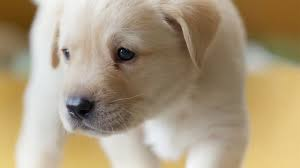

In [53]:
param = "dog"
google_url = "https://www.google.com/imghp"
ChromeOptions = webdriver.ChromeOptions()
ChromeOptions.set_headless()
driver = webdriver.Chrome(chrome_options=ChromeOptions)
actionChains = ActionChains(driver)
try:
    driver.get(google_url)
    #browser.visit(google_url)
    que=driver.find_element_by_xpath("//input[@name='q']")
    que.send_keys(param)
    que.send_keys(Keys.RETURN)       
    element = driver.find_element_by_tag_name("body")
    # Scroll down
#     for i in range(5):
#         element.send_keys(Keys.PAGE_DOWN)
#         time.sleep(0.3)
#     try:
#         driver.find_element_by_xpath('//*[@id="islmp"]/div/div/div/div/div[5]/input').click()
#         for i in range(5):
#             element.send_keys(Keys.PAGE_DOWN)
#             time.sleep(0.3)  # bot id protection
#     except:
#         for i in range(5):
#             element.send_keys(Keys.PAGE_DOWN)
#             time.sleep(0.3)  # bot id protection
    driver.find_element_by_xpath('/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[1]/div[1]/a[1]/div[1]/img').click()
    #img = driver.find_element_by_xpath('/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/div/div[1]/div[1]/div/div[2]/a/img')
    
    img = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/div/div[1]/div[1]/div/div[2]/a/img')))
    src = img.get_attribute('src')
    print(src)
    print("Reached end of Page.")
    time.sleep(0.5)

    source = driver.page_source #page source
    soup = bs(source, "html.parser")
    #close the browser
    #driver.close()
except Error as e:
    print(e)

https://www.google.com/logos/doodles/2020/stay-and-play-at-home-with-popular-past-google-doodles-loteria-2019-6753651837108772-s.png












https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT-2B4Bfl83bRoupGzYfe-5nUZe3zEv5in-FvuSTvjKTCiJ9uakVdEu97fFje4nyC4&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTIVPSgwQvpwgEIPS0nIuE5E9qxj0nSDwktc0i026uDkz7aWpqpe7hISJ2A0CGGA8s&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT0xk01sWEgeZq6hVmnQPeXgVqnmNzcBf986z1v2AHavfQpugAgR0Qd8krR1q1xSpY&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSze6cn0U1r0r0as2YdxLb1hnFioZrwYQK21jyCGdxF1KUQT46b5-CjBuMnaqISxwQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSHezRcfu_vn0rMH0MpnFJS-ZBn0kYm6UoQetyH6YRVyDeXAReFGIJKvpu0hgegJLk&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQOzdVXYjpHDjergERmVi5YdjELXKKZnvN2f1ipr3LK1Sfwkl1PDsnjcflJUTeNyt0&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSCDcocpw1T3Qw
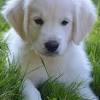
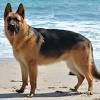
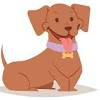
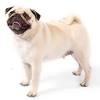
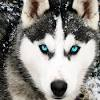
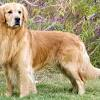
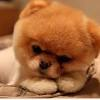
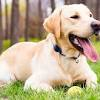
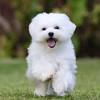
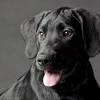
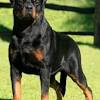
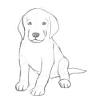
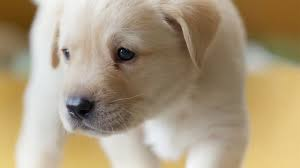
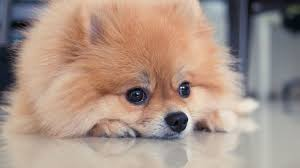
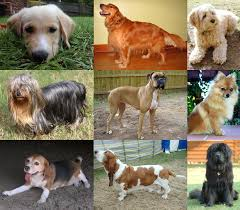
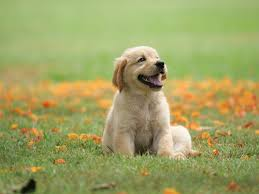
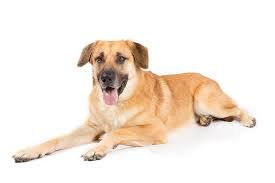
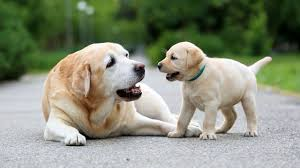
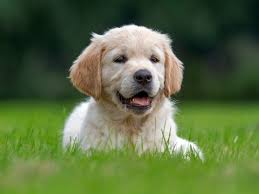
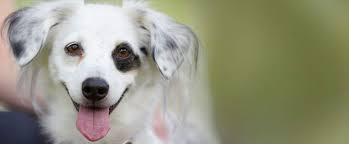
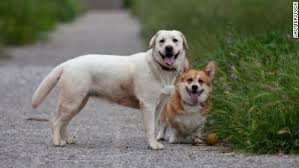
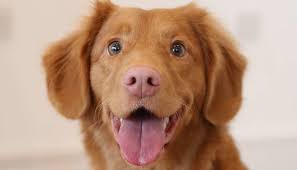
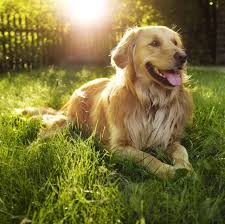
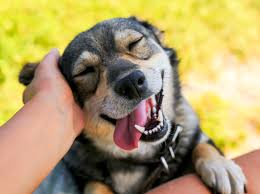
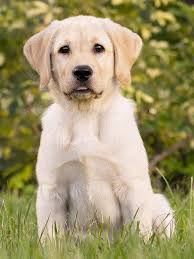
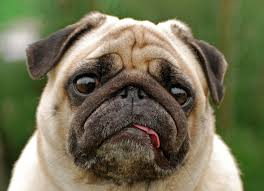
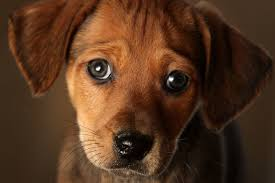
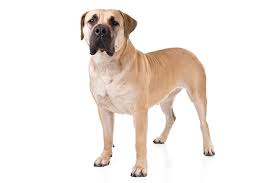














































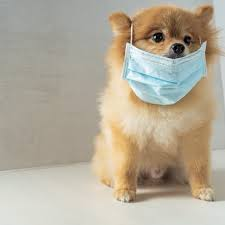
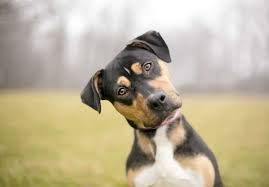
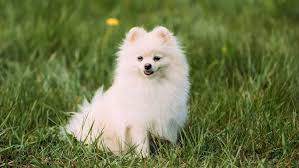
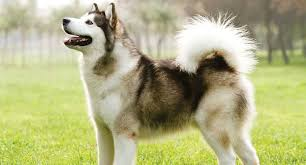





















































https://i.ytimg.com/vi/MPV2METPeJU/maxresdefault.jpg
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRV7QFB_vgKHKTmHV3R1jdJG8ZAyq81fn9ztZQFsUEywgKfQjHk&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTjw3YARrvdslkko4rRZlZZje9Gu_ifHd4cUqkMFP5lCXxNkQ9X&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS0ETpnavf7Umimc5scQFoEvHHCO6fdAf1VX2Ix_7Rmv2h3idtd&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR1BvEmiwiqBfPREDHpU40Si5mHdA7nlnk23CEbBRXM8vMMh8Jn&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRGpmz1eHMVORz-ix3khcp-JsBqKFzt9oJydt_DrpL790faIEjm&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTM8DP2kYL003OmB4KDEIjnJnEjJv1T14haUJvGvD6XxW9EWBEY&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRmuzovhWNW7rZ4nRV8lGjT5pIy5Iw-IU-gD9vbpnjwETD4ZTUd&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRnfmPdjngQrae1rzWwxo4_XOkYX
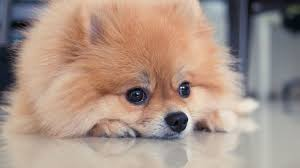

In [57]:
all_images = driver.execute_script("return document.getElementsByTagName('img')")
for image in range(0, len(all_images)):
    print(driver.execute_script("return document.getElementsByTagName('img')[{}].src".format(image)))

In [8]:
import xerox
xerox.paste()

'.send_keys(Keys.ARROW_DOWN)'

In [23]:
z = re.findall(f'.+base64,(.+)',src)[0]
#p = os.path.join("image", param, "{}.jpg".format(str(total).zfill(8)))
im = Image.open(io.BytesIO(base64.b64decode(z)))
im.size

(300, 168)

In [24]:
Image.open("doggy.jpg").size

(300, 168)

In [62]:
Image.open("55043370.jpg").size

(257, 257)

In [ ]:
url_list = []
soup = bs(source, "html.parser")
img = soup.find_all("img", class_='rg_i Q4LuWd tx8vtf')
for i in img:
    try:
        url_list.append(i['src'])
    except:
        pass
with open(f'urls_for_training/{param}.txt', 'w') as filehandle:
    for listitem in url_list:
        filehandle.write('%s\n' % listitem)

In [ ]:
no_pages = 5
query = 'pots'

In [174]:
# featured = '//*[@id="s-result-sort-select_0"]'
# low_to_high = '//*[@id="s-result-sort-select_1"]'
# high_to_low =  '//*[@id="s-result-sort-select_2"]'
# average_customer_review = '//*[@id="s-result-sort-select_3"]'
# newest_arrival = '//*[@id="s-result-sort-select_4"]'

# filter_paths = [
#      featured,
#      low_to_high,
#      high_to_low,
#      average_customer_review,
#      newest_arrival
# ]

# filters = [
#     'featured',
#     'low_to_high',
#     'high_to_low',
#     'average_customer_review',
#     'newest_arrival'
# ]
# amazon_dict = {
#                 f"{filters[0]}": {
#                     "products_name":[],
#                     "prices": [],
#                     "ratings":[],
#                     "products_img":[],
#                     "products_url":[],
#                     "prime_delivery":[]
#                 }
#               }

# executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
# browser = Browser("chrome", **executable_path, headless=False)
# for i in list(range(2)):
#     news_url = f"https://www.amazon.com/s?k={query}&page={i}"
#     try:
#         browser.visit(news_url)
#         browser.find_by_xpath('//*[@id="a-autoid-0"]').click()
#         browser.find_by_xpath('//*[@id="s-result-sort-select_0"]').click()
#         html = browser.html
#         soup = bs(html, "html.parser")

#         for d in soup.findAll('div', attrs={'class':'sg-col-4-of-24 sg-col-4-of-12 sg-col-4-of-36 s-result-item s-asin sg-col-4-of-28 sg-col-4-of-16 sg-col sg-col-4-of-20 sg-col-4-of-32'}):
#             name = d.find('span', attrs={'class':'a-size-base-plus a-color-base a-text-normal'})
#             price = d.find('span', attrs={'class':'a-offscreen'})
#             rating = d.find('span', attrs={'class':'a-icon-alt'})
#             prime = d.find('i', attrs={'class':'a-icon a-icon-prime a-icon-medium'})
#             img = d.find('img', attrs={'class':'s-image'})#//*[@id="search"]/div[1]/div[2]/div/span[4]/div[1]/div[5]/div/span/div/div/span/a/div/img
#             url = d.find('a', attrs={'class':'a-link-normal a-text-normal'})

#             if name is not None and price is not None:
#                 amazon_dict[filters[0]]["products_name"].append(name.text)
#                 amazon_dict[filters[0]]["prices"].append(price.text)

#                 if rating is not None:
#                     amazon_dict[filters[0]]["ratings"].append(rating.text)
#                 else:
#                     amazon_dict[filters[0]]["ratings"].append("-1")

#                 if img is not None:
#                     amazon_dict[filters[0]]["products_img"].append(img["src"])
#                 else:
#                     amazon_dict[filters[0]]["products_img"].append(" ")

#                 if url is not None:
#                     amazon_dict[filters[0]]["products_url"].append("https://amazon.com"+url["href"])
#                 else:
#                     amazon_dict[filters[0]]["products_url"].append(" ")

#                 if prime is not None:
#                     amazon_dict[filters[0]]["prime_delivery"].append("Prime Delivery")
#                 else:
#                     amazon_dict[filters[0]]["prime_delivery"].append("Not Prime Delivery")

#         browser.quit()

#     except Error as e:
#         browser.quit()
#         print(e)

NameError: name 'Error' is not defined

In [182]:
def get_amazon_data(query,no_of_pages):
    amazon_dict = {
                    "featured": {
                        "products_name":[],
                        "prices": [],
                        "ratings":[],
                        "products_img":[],
                        "products_url":[],
                        "prime_delivery":[]
                    }, 
                    "low_to_high": {
                        "products_name":[],
                        "prices": [],
                        "ratings":[],
                        "products_img":[],
                        "products_url":[],
                        "prime_delivery":[]
                    },
                    "high_to_low": {
                        "products_name":[],
                        "prices": [],
                        "ratings":[],
                        "products_img":[],
                        "products_url":[],
                        "prime_delivery":[]
                    }, 
                    "average_customer_review": {
                        "products_name":[],
                        "prices": [],
                        "ratings":[],
                        "products_img":[],
                        "products_url":[],
                        "prime_delivery":[]
                    },
                    "newest_arrival": {
                        "products_name":[],
                        "prices": [],
                        "ratings":[],
                        "products_img":[],
                        "products_url":[],
                        "prime_delivery":[]
                    }
                  }

    executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
    browser = Browser("chrome", **executable_path, headless=True)
    for j in list(range(5)):
        for i in list(range(no_of_pages)):
            news_url = f"https://www.amazon.com/s?k={query}&page={i}"
            try:
                browser.visit(news_url)
                browser.find_by_xpath('//*[@id="a-autoid-0"]').click()
                browser.find_by_xpath(f'//*[@id="s-result-sort-select_{str(j)}"]').click()
                html = browser.html
                soup = bs(html, "html.parser")

                for d in soup.findAll('div', attrs={'class':'sg-col-4-of-24 sg-col-4-of-12 sg-col-4-of-36 s-result-item s-asin sg-col-4-of-28 sg-col-4-of-16 sg-col sg-col-4-of-20 sg-col-4-of-32'}):
                    name = d.find('span', attrs={'class':'a-size-base-plus a-color-base a-text-normal'})
                    price = d.find('span', attrs={'class':'a-offscreen'})
                    rating = d.find('span', attrs={'class':'a-icon-alt'})
                    prime = d.find('i', attrs={'class':'a-icon a-icon-prime a-icon-medium'})
                    img = d.find('img', attrs={'class':'s-image'})
                    url = d.find('a', attrs={'class':'a-link-normal a-text-normal'})

                    if name is not None and price is not None:
                        amazon_dict[list(amazon_dict.keys())[j]]["products_name"].append(name.text)
                        amazon_dict[list(amazon_dict.keys())[j]]["prices"].append(price.text)

                        if rating is not None:
                            amazon_dict[list(amazon_dict.keys())[j]]["ratings"].append(rating.text)
                        else:
                            amazon_dict[list(amazon_dict.keys())[j]]["ratings"].append("-1")

                        if img is not None:
                            amazon_dict[list(amazon_dict.keys())[j]]["products_img"].append(img["src"])
                        else:
                            amazon_dict[list(amazon_dict.keys())[j]]["products_img"].append(" ")

                        if url is not None:
                            amazon_dict[list(amazon_dict.keys())[j]]["products_url"].append("https://amazon.com"+url["href"])
                        else:
                            amazon_dict[list(amazon_dict.keys())[j]]["products_url"].append(" ")

                        if prime is not None:
                            amazon_dict[list(amazon_dict.keys())[j]]["prime_delivery"].append("Prime Delivery")
                        else:
                            amazon_dict[list(amazon_dict.keys())[j]]["prime_delivery"].append("Not Prime Delivery")
                        
            except Error as e:
                print(e)
    browser.quit()
    return amazon_dict

In [193]:
a = get_amazon_data('pencil',2)

In [194]:
pd.DataFrame(a["low_to_high"])

,products_name,prices,ratings,products_img,products_url,prime_delivery
0,"DIXON No. 2 Yellow Pencils, Wood-Cased, Black ...",$3.48,4.4 out of 5 stars,https://m.media-amazon.com/images/I/71-tCs1ObM...,https://amazon.com/Dixon-Pencils-Wood-Cased-8-...,Prime Delivery
1,Cra-Z-Art No. 2 wood Pencils 8 Count,$3.79,-1,https://m.media-amazon.com/images/I/71VvJWWCtU...,https://amazon.com/Cra-Z-Art-No-wood-Pencils-C...,Prime Delivery
2,General Pencil 557-HB-BP Generals Charcoal Pen...,$6.72,4.4 out of 5 stars,https://m.media-amazon.com/images/I/61vd0PBUOL...,https://amazon.com/General-Pencil-557-HB-BP-Ge...,Prime Delivery
3,"Lead Small, 12 Color Small Pencil Painting Pen...",$0.01,-1,https://m.media-amazon.com/images/I/517PUpn3ms...,https://amazon.com/Pencil-Painting-Stationery-...,Not Prime Delivery
4,Paper Mate 74402 .7mm Write Brothers Mechanica...,$0.87,-1,https://m.media-amazon.com/images/I/2148rHdDpd...,https://amazon.com/Paper-Mate-74402-Brothers-M...,Not Prime Delivery
...,...,...,...,...,...,...
73,Disney Mickey Mouse and Friends 12 Wood Pencil...,$4.04,4.6 out of 5 stars,https://m.media-amazon.com/images/I/71DsI4fSHt...,https://amazon.com/Disney-Mickey-Mouse-Friends...,Prime Delivery
74,6Pcs 2B Exam Mechanical Pencil with Set Office...,$0.16,-1,https://m.media-amazon.com/images/I/51c2+gBeRn...,https://amazon.com/Mechanical-Pencil-Refills-O...,Not Prime Delivery
75,"BIC Velocity Max Mechanical Pencil, Medium Poi...",$5.16,4.6 out of 5 stars,https://m.media-amazon.com/images/I/81y4DlTTt2...,https://amazon.com/BIC-Velocity-Mechanical-Pen...,Prime Delivery
76,"Xisheep 12 Color Pencil,HB12 Diamond Pencil Ro...",$0.21,-1,https://m.media-amazon.com/images/I/71fux7c9uH...,https://amazon.com/Xisheep-Diamond-Childrens-S...,Not Prime Delivery


In [192]:
def get_walmart_data(query,no_of_pages):
    amazon_dict = {
                    "featured": {
                        "products_name":[],
                        "prices": [],
                        "ratings":[],
                        "products_img":[],
                        "products_url":[],
                        "prime_delivery":[]
                    }, 
                    "low_to_high": {
                        "products_name":[],
                        "prices": [],
                        "ratings":[],
                        "products_img":[],
                        "products_url":[],
                        "prime_delivery":[]
                    },
                    "high_to_low": {
                        "products_name":[],
                        "prices": [],
                        "ratings":[],
                        "products_img":[],
                        "products_url":[],
                        "prime_delivery":[]
                    }, 
                    "average_customer_review": {
                        "products_name":[],
                        "prices": [],
                        "ratings":[],
                        "products_img":[],
                        "products_url":[],
                        "prime_delivery":[]
                    },
                    "newest_arrival": {
                        "products_name":[],
                        "prices": [],
                        "ratings":[],
                        "products_img":[],
                        "products_url":[],
                        "prime_delivery":[]
                    }
                  }

    executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
    browser = Browser("chrome", **executable_path, headless=True)
    for j in list(range(5)):
        for i in list(range(no_of_pages)):
            news_url = f"https://www.amazon.com/s?k={query}&page={i}"
            try:
                browser.visit(news_url)
                browser.find_by_xpath('//*[@id="a-autoid-0"]').click()
                browser.find_by_xpath(f'//*[@id="s-result-sort-select_{str(j)}"]').click()
                html = browser.html
                soup = bs(html, "html.parser")

                for d in soup.findAll('div', attrs={'class':'sg-col-4-of-24 sg-col-4-of-12 sg-col-4-of-36 s-result-item s-asin sg-col-4-of-28 sg-col-4-of-16 sg-col sg-col-4-of-20 sg-col-4-of-32'}):
                    name = d.find('span', attrs={'class':'a-size-base-plus a-color-base a-text-normal'})
                    price = d.find('span', attrs={'class':'a-offscreen'})
                    rating = d.find('span', attrs={'class':'a-icon-alt'})
                    prime = d.find('i', attrs={'class':'a-icon a-icon-prime a-icon-medium'})
                    img = d.find('img', attrs={'class':'s-image'})
                    url = d.find('a', attrs={'class':'a-link-normal a-text-normal'})

                    if name is not None and price is not None:
                        amazon_dict[list(amazon_dict.keys())[j]]["products_name"].append(name.text)
                        amazon_dict[list(amazon_dict.keys())[j]]["prices"].append(price.text)

                        if rating is not None:
                            amazon_dict[list(amazon_dict.keys())[j]]["ratings"].append(rating.text)
                        else:
                            amazon_dict[list(amazon_dict.keys())[j]]["ratings"].append("-1")

                        if img is not None:
                            amazon_dict[list(amazon_dict.keys())[j]]["products_img"].append(img["src"])
                        else:
                            amazon_dict[list(amazon_dict.keys())[j]]["products_img"].append(" ")

                        if url is not None:
                            amazon_dict[list(amazon_dict.keys())[j]]["products_url"].append("https://amazon.com"+url["href"])
                        else:
                            amazon_dict[list(amazon_dict.keys())[j]]["products_url"].append(" ")

                        if prime is not None:
                            amazon_dict[list(amazon_dict.keys())[j]]["prime_delivery"].append("Prime Delivery")
                        else:
                            amazon_dict[list(amazon_dict.keys())[j]]["prime_delivery"].append("Not Prime Delivery")
                        
            except Error as e:
                print(e)
    browser.quit()
    return amazon_dict

,products_name,prices,ratings,products_img,products_url,prime_delivery
0,"DIXON No. 2 Yellow Pencils, Wood-Cased, Black ...",$3.48,4.4 out of 5 stars,https://m.media-amazon.com/images/I/71-tCs1ObM...,https://amazon.com/Dixon-Pencils-Wood-Cased-8-...,Prime Delivery
1,Cra-Z-Art No. 2 wood Pencils 8 Count,$3.79,-1,https://m.media-amazon.com/images/I/71VvJWWCtU...,https://amazon.com/Cra-Z-Art-No-wood-Pencils-C...,Prime Delivery
2,General Pencil 557-HB-BP Generals Charcoal Pen...,$6.79,4.4 out of 5 stars,https://m.media-amazon.com/images/I/61vd0PBUOL...,https://amazon.com/General-Pencil-557-HB-BP-Ge...,Prime Delivery
3,"Lead Small, 12 Color Small Pencil Painting Pen...",$0.01,-1,https://m.media-amazon.com/images/I/517PUpn3ms...,https://amazon.com/Pencil-Painting-Stationery-...,Not Prime Delivery
4,Paper Mate 74402 .7mm Write Brothers Mechanica...,$0.87,-1,https://m.media-amazon.com/images/I/2148rHdDpd...,https://amazon.com/Paper-Mate-74402-Brothers-M...,Not Prime Delivery
...,...,...,...,...,...,...
73,Disney Mickey Mouse and Friends 12 Wood Pencil...,$4.04,4.6 out of 5 stars,https://m.media-amazon.com/images/I/71DsI4fSHt...,https://amazon.com/Disney-Mickey-Mouse-Friends...,Prime Delivery
74,6Pcs 2B Exam Mechanical Pencil with Set Office...,$0.16,-1,https://m.media-amazon.com/images/I/51c2+gBeRn...,https://amazon.com/Mechanical-Pencil-Refills-O...,Not Prime Delivery
75,"BIC Velocity Max Mechanical Pencil, Medium Poi...",$5.16,4.6 out of 5 stars,https://m.media-amazon.com/images/I/81y4DlTTt2...,https://amazon.com/BIC-Velocity-Mechanical-Pen...,Prime Delivery
76,"Xisheep 12 Color Pencil,HB12 Diamond Pencil Ro...",$0.21,-1,https://m.media-amazon.com/images/I/71fux7c9uH...,https://amazon.com/Xisheep-Diamond-Childrens-S...,Not Prime Delivery
